- **Autor:** Jeremy Comino Raigón
- **Curso:** Q1 2023-2024
- **Profesor:** Javier Béjar

# Problema 6: Barcelona motor del IBEX

## Información previa:
* Este problema se ha hecho utilizando las últimas versiones de las librerias. Es posible experimentar cambios en los gráficos obtenidos dependiendo de la versión que se este utilizando.

## Configuración del entorno:
Primero de todo haremos la configuración del entorno de Jupyter.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

A continuación importaremos las librerías necesarias.

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)


from scipy.stats import normaltest

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from scipy import stats 
from sklearn.preprocessing import PowerTransformer

Seguidamente importaremos los datos.

In [3]:
from apafib import load_BCN_IBEX
ibex_data = load_BCN_IBEX()
ibex_data.head()

Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges  \
0                                              115.0                              
1                                              115.0                              
2                                              115.0                              
3                                              115.0                              
4                                              115.0                              

   Dades meteorològiques: Precipitació / Barcelona - Zona Universitària  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   Dades meteorològiques: Temperatura / Barcelona - Zona Universitària  \
0                                               8.01                     
1                                               5.96                     
2                                               5.31                     
3                                               5.72                     
4                                               5.23                     

   Dades meteorològiques: Vent / Barcelona - Zona Universitària  \
0                                               5.61              
1                                               6.51              
2                                               5.52              
3                                               5.13              
4                                               4.25              

   Estat del trànsit segons trams horaris / Matí (6-13)  \
0                                              1.331      
1                                              1.519      
2                                              1.398      
3                                              1.866      
4                                              1.880      

   Estat del trànsit segons trams horaris / Nit (0-5)  \
0                                              1.132    
1                                              1.309    
2                                              1.189    
3                                              1.200    
4                                              1.221    

   Estat del trànsit segons trams horaris / Tarda (14-19)  \
0                                              1.357        
1                                              1.581        
2                                              1.474        
3                                              1.960        
4                                              1.923        

   Estat del trànsit segons trams horaris / Vespre (20-24)  \
0                                              1.293         
1                                              1.375         
2                                              1.331         
3                                              1.510         
4                                              1.446         

   IPC interanual / Barcelona  \
0                         0.5   
1                         0.5   
2                         0.5   
3                         0.5   
4                         0.5   

   Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica  \
0                                                3.0                                            
1                                                3.0                                            
2                                                2.0                                            
3                                                3.0                                            
4                                                1.0                               

Primeramente haremos una vista general de los datos.

In [4]:
ibex_data.shape
ibex_data.describe(include="all").T

(365, 15)

count      mean      std  \
Compra-Venda d'habitatges a Barcelona (Nombre d...  365.0   258.921   99.043   
Dades meteorològiques: Precipitació / Barcelona...  365.0     0.928    4.057   
Dades meteorològiques: Temperatura / Barcelona ...  365.0    17.186    6.034   
Dades meteorològiques: Vent / Barcelona - Zona ...  365.0     4.624    1.755   
Estat del trànsit segons trams horaris / Matí (...  365.0     1.865    0.226   
Estat del trànsit segons trams horaris / Nit (0-5)  365.0     1.231    0.061   
Estat del trànsit segons trams horaris / Tarda ...  365.0     1.943    0.253   
Estat del trànsit segons trams horaris / Vespre...  365.0     1.557    0.160   
IPC interanual / Barcelona                          365.0     2.735    1.739   
Operacions d'aeronaus a l'aeroport de Barcelona...  365.0     6.277    4.246   
Operacions d'aeronaus a l'aeroport de Barcelona...  365.0   172.274   75.920   
Operacions d'aeronaus a l'aeroport de Barcelona...  365.0   223.775  135.202   
Preu electricitat (majorista) /                     365.0   111.926   72.460   
Matriculacions de vehicles a Barcelona / Turismes   365.0    59.203   38.921   
Mercat bursàtil: IBEX-35 /                          365.0  8679.076  347.513   

                                                         min       25%  \
Compra-Venda d'habitatges a Barcelona (Nombre d...    27.000   210.000   
Dades meteorològiques: Precipitació / Barcelona...     0.000     0.000   
Dades meteorològiques: Temperatura / Barcelona ...     4.640    12.360   
Dades meteorològiques: Vent / Barcelona - Zona ...     1.630     3.450   
Estat del trànsit segons trams horaris / Matí (...     1.317     1.657   
Estat del trànsit segons trams horaris / Nit (0-5)     1.132     1.191   
Estat del trànsit segons trams horaris / Tarda ...     1.273     1.736   
Estat del trànsit segons trams horaris / Vespre...     1.230     1.475   
IPC interanual / Barcelona                            -0.100     1.800   
Operacions d'aeronaus a l'aeroport de Barcelona...     1.000     2.000   
Operacions d'aeronaus a l'aeroport de Barcelona...    31.000    94.000   
Operacions d'aeronaus a l'aeroport de Barcelona...    28.000    78.000   
Preu electricitat (majorista) /                        1.420    61.392   
Matriculacions de vehicles a Barcelona / Turismes      0.000    35.000   
Mercat bursàtil: IBEX-35 /                          7750.200  8397.700   

                                                         50%       75%  \
Compra-Venda d'habitatges a Barcelona (Nombre d...   266.000   310.000   
Dades meteorològiques: Precipitació / Barcelona...     0.000     0.000   
Dades meteorològiques: Temperatura / Barcelona ...    16.360    23.460   
Dades meteorològiques: Vent / Barcelona - Zona ...     4.330     5.390   
Estat del trànsit segons trams horaris / Matí (...     1.956     2.036   
Estat del trànsit segons trams horaris / Nit (0-5)     1.218     1.251   
Estat del trànsit segons trams horaris / Tarda ...     2.000     2.152   
Estat del trànsit segons trams horaris / Vespre...     1.536     1.612   
IPC interanual / Barcelona                             2.500     4.900   
Operacions d'aeronaus a l'aeroport de Barcelona...     6.000    10.000   
Operacions d'aeronaus a l'aeroport de Barcelona...   192.000   243.000   
Operacions d'aeronaus a l'aeroport de Barcelona...   243.000   350.000   
Preu electricitat (majorista) /                       88.952   159.368   
Matriculacions de vehicles a Barcelona / Turismes     51.000    73.000   
Mercat bursàtil: IBEX-35 /                          8753.300  8957.200   

                                                         max  
Compra-Venda d'habitatges a Barcelona (Nombre d...   491.000  
Dades meteorològiques: Precipitació / Barcelona...    50.800  
Dades meteorològiques: Temperatura / Barcelona ...    28.660  
Dades meteorològiques: Vent / Barcelona - Zona ...    12.730  
Estat del trànsit segons trams horaris / Matí (...     2.290  
Estat del trànsit segon

Podemos observar que tenemos una tabla con 365 ejemplares y consta de 15 atributos. Donde todos sus atributos son de valores no categóricos.

Con el objetivo de una mejor colocación de los datos. Reordenaremos los datos de manera que primero tengamos la variable respuesta.

In [5]:
columnas = list(ibex_data.columns)
variable_resposta = "Mercat bursàtil: IBEX-35 / "
columnas.remove(variable_resposta)
columnas.insert(0, variable_resposta)
ibex_data = ibex_data.reindex(columns = columnas)
ibex_data.head()

Mercat bursàtil: IBEX-35 /   \
0                       8079.0   
1                       8079.0   
2                       8079.0   
3                       8079.0   
4                       8062.9   

   Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges  \
0                                              115.0                              
1                                              115.0                              
2                                              115.0                              
3                                              115.0                              
4                                              115.0                              

   Dades meteorològiques: Precipitació / Barcelona - Zona Universitària  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   Dades meteorològiques: Temperatura / Barcelona - Zona Universitària  \
0                                               8.01                     
1                                               5.96                     
2                                               5.31                     
3                                               5.72                     
4                                               5.23                     

   Dades meteorològiques: Vent / Barcelona - Zona Universitària  \
0                                               5.61              
1                                               6.51              
2                                               5.52              
3                                               5.13              
4                                               4.25              

   Estat del trànsit segons trams horaris / Matí (6-13)  \
0                                              1.331      
1                                              1.519      
2                                              1.398      
3                                              1.866      
4                                              1.880      

   Estat del trànsit segons trams horaris / Nit (0-5)  \
0                                              1.132    
1                                              1.309    
2                                              1.189    
3                                              1.200    
4                                              1.221    

   Estat del trànsit segons trams horaris / Tarda (14-19)  \
0                                              1.357        
1                                              1.581        
2                                              1.474        
3                                              1.960        
4                                              1.923        

   Estat del trànsit segons trams horaris / Vespre (20-24)  \
0                                              1.293         
1                                              1.375         
2                                              1.331         
3                                              1.510         
4                                              1.446         

   IPC interanual / Barcelona  \
0                         0.5   
1                         0.5   
2                         0.5   
3                         0.5   
4                         0.5   

   Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica  \
0                                                3.0                                            
1                                                3.0                                            
2                                                2.0                    

## Visualización
A continuación comprobaremos de manera visual si todos los atributos siguen una distribución normal. En este caso para la valoración inicial haremos uso de histogramas.

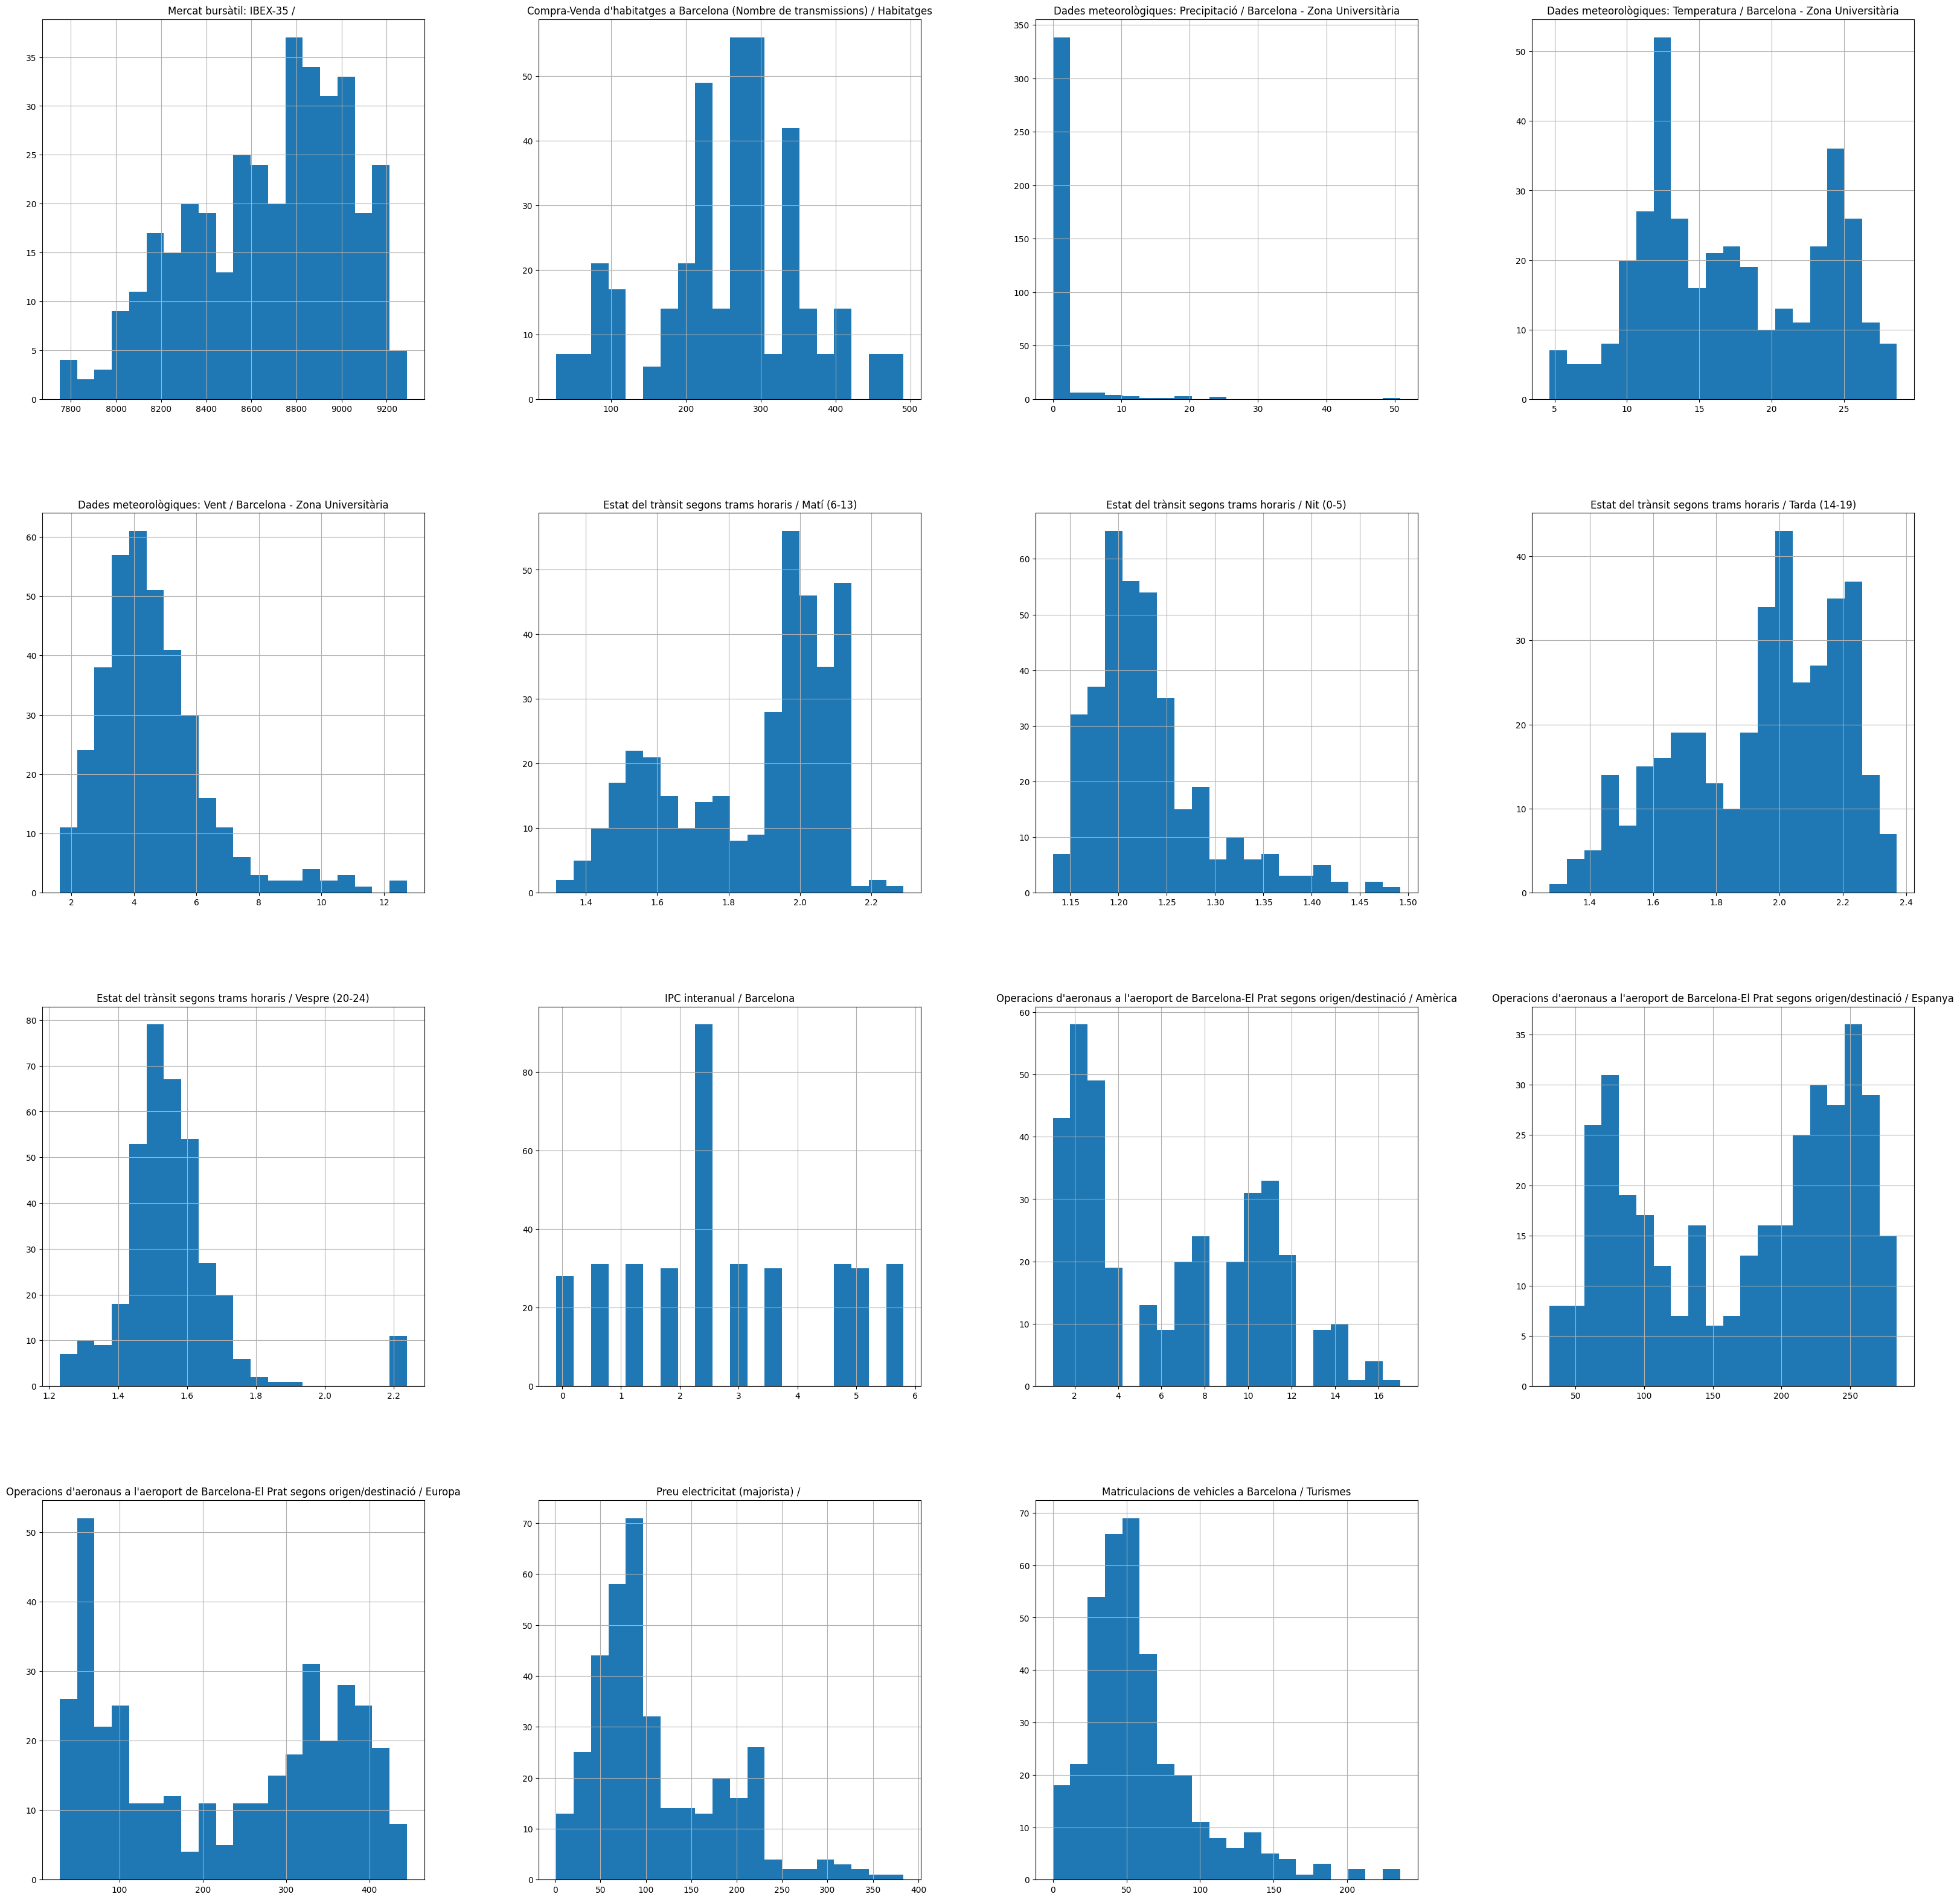

In [6]:
column_data = ibex_data.iloc[:,:]
_=column_data.hist(bins = 20, figsize=(40,40))

Podemos observar que que la gran mayoría de los atributos no siguen una distribución normal como puede ser *Dades meteorològiques: Precipitació / Barcelona - Zona Universitària* o *IPC interanual / Barcelona*. Para estar más seguros haremos un test de normalidad para comprobar que atributos siguen una distribución normal.

In [7]:
# Hacemos test con un 95% confianza
tanto_por_1_confianza = 0.95
p_v = 1-tanto_por_1_confianza
columns = list(ibex_data.columns)
_ = columns.pop(0)
for column in columns:
    res = normaltest(ibex_data[column], nan_policy = "omit")
    # si e p_value es menor al p_v significa que rechazamos la hipotesi nula y por lo tanto no sigue una distribución gaussiana
    if(res.pvalue <= p_v):
        print(column + " no tiene una distribución normal")
    else:
        print(column + " tiene una distribución normal")

Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges tiene una distribución normal
Dades meteorològiques: Precipitació / Barcelona - Zona Universitària no tiene una distribución normal
Dades meteorològiques: Temperatura / Barcelona - Zona Universitària no tiene una distribución normal
Dades meteorològiques: Vent / Barcelona - Zona Universitària no tiene una distribución normal
Estat del trànsit segons trams horaris / Matí (6-13) no tiene una distribución normal
Estat del trànsit segons trams horaris / Nit (0-5) no tiene una distribución normal
Estat del trànsit segons trams horaris / Tarda (14-19) no tiene una distribución normal
Estat del trànsit segons trams horaris / Vespre (20-24) no tiene una distribución normal
IPC interanual / Barcelona no tiene una distribución normal
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica no tiene una distribución normal
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons or



Viendo estos datos podemos asegurar con un 95% de confianza que estos datos todos excepto *Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges* no siguen una distribución normal. 


## Relaciones bivariables
Antes de modificar los datos, haremos una mínima exploración de los datos para ver posibles relaciones que pueden tener las diferentes variables. Este estudio también lo haremos una vez procesado los datos. Por lo tanto, es posibles que las relaciones cambien.

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

<Axes: >

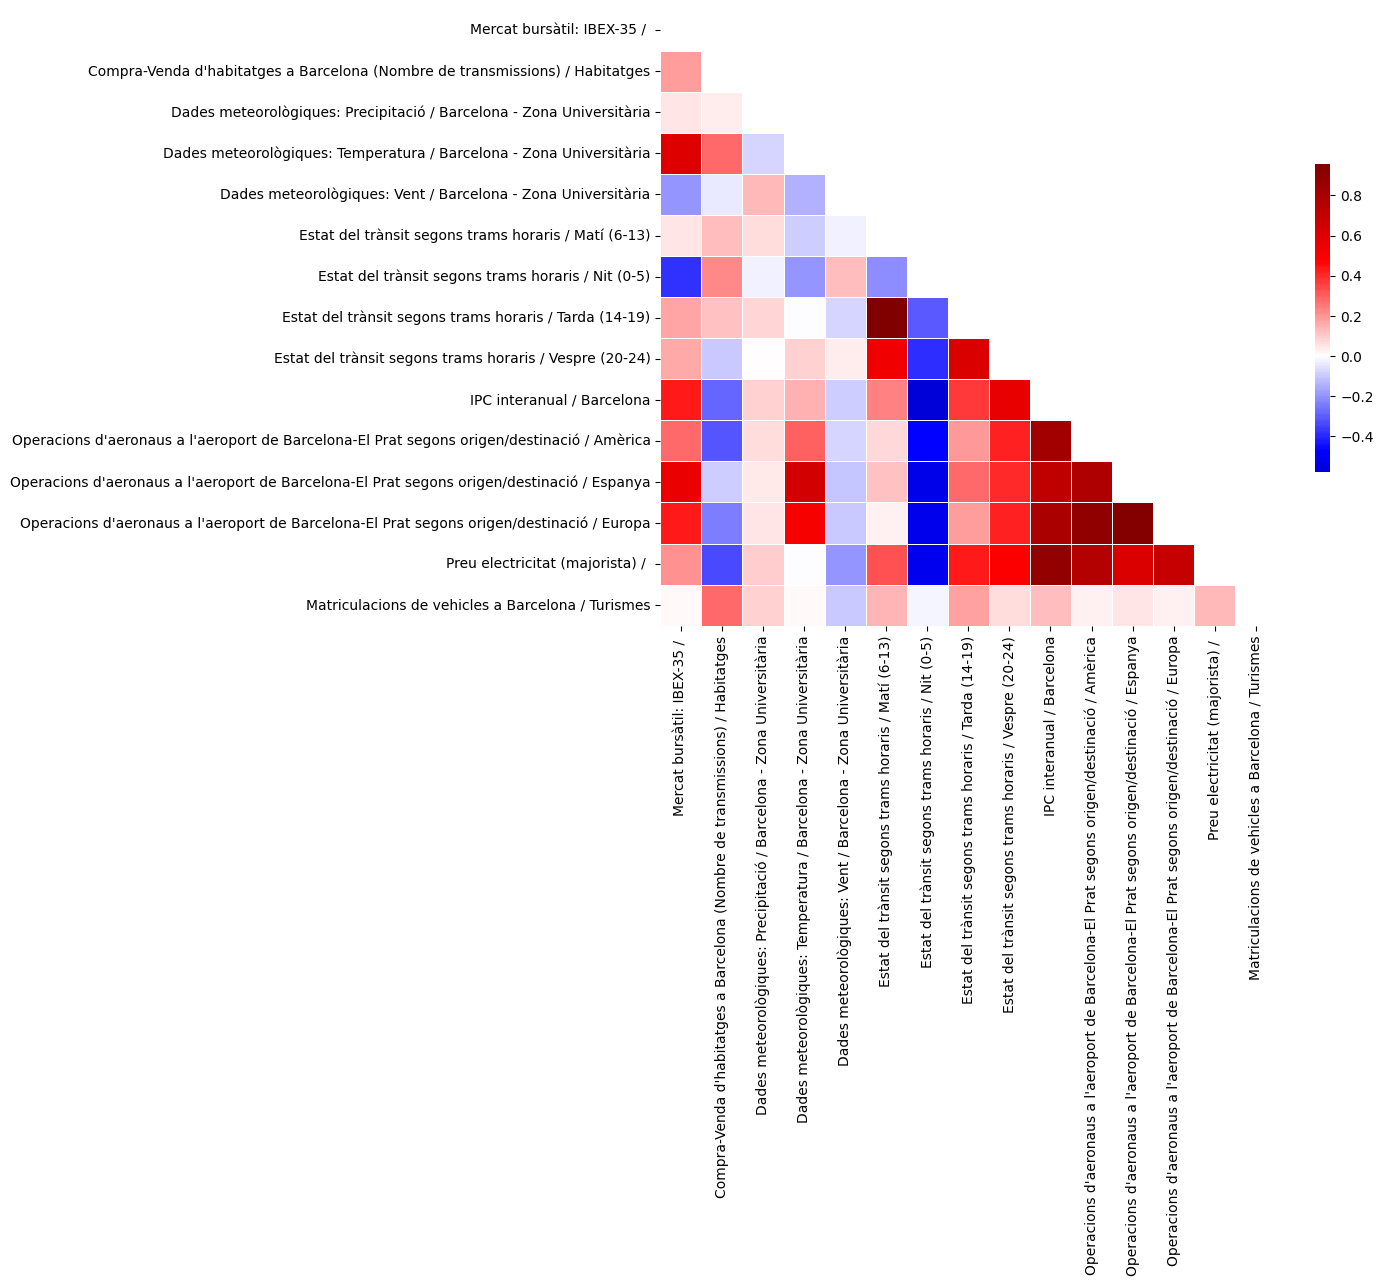

In [8]:
correlaciones = ibex_data.corr()
mask = np.triu(np.ones_like(correlaciones,dtype = bool))
plt.subplots(figsize=(10,8))
sns.heatmap(correlaciones, mask = mask, cmap="seismic",center = 0, square=True,linewidths=.5, cbar_kws={"shrink": .5})

Seguidamente responderemos las preguntas relacionadas con el apartado A

Viendo el grafico heatmap de las correlaciones podemos ver las siguientes correlaciones:

* Podemos ver que la variables respuesta que es el IBEX-35 tiene una relación bastante proporcional (**entorno a un 0.5-0.8**) con las operaciones de aeronaves en el areopuerto del prat concretamente con origen/destino España o europa. Es decir, cuantas más operaciones haya en el aeropuerto, el IBEX-35 tiende a subir también.

* El IBEX-35 está altamente correlacionado (0.6 de correlación) con la temperatura en la Zona Universitaria. Algo que no deja de ser curioso, todo esto debido a que relaciona la temperatura de una zona concreta de España con un indicador para medir el estado de la bolsa de toda España.

* Podemos ver que todas las operaciones en el Aeropuerto están correlacionadas de manera significativa. Dato que podemos extrapolar y decir que forma usual los aumentos y disminuciones de las operaciones del aeropuerto se hacen en todas las etapas del día. 

* Hay una serie de relaciones inversas que al principio pueden tener cierto tipo de lógica pero que no dejan de ser sorprendentes. Estoy hablando que la variable *Estado del transito durante las horas de la noche* está inversamente relacionada (**alrededor del -0.4**) con las tres diferentes grupos de variables:
    - Operaciones en el aeropuerto.
    - IPC y Precio de la electricidad.
    - Estado del transito en el resto de horas del día.

Este último grupo no es sorpresiva su correlación, debido a que de forma general las horas de noche son horas donde la población está durmiendo y por lo tanto no hay tanto tráfico. A diferencia del resto de horas donde la gente está despierta.

Pero el resto de grupos si que son peculiares. Concretamente, hay un caso del segundo grupo que no deja de indicar el estado actual de los precios de la luz. Donde debido a los precios por hora que se establecen. Sigue un patrón donde la luz es más barata a medida que hay más tráfico nocturno. Es decir hay más gente en la calle en horario nocturno.

Estas son algunas de las muchas relaciones que se pueden ver en el heatmap de correlaciones. Este ya nos puede dar un criterio inicial de que variables se pueden descartar. En este caso, podríamos:
- Descartar 2 variables de Operaciones de aeropuerto para representar ya que todas están bastante relacionadas entre sí.
- Descartar el estado del transito por la mañana o el de tarde ya que también están directamente correlacionadas.

En este caso, debido a que la variable del estado del transito no tiene relación al problema a primera vista, la eliminaremos. En cambio las operaciones, las dejaremos y decidiremos si eliminarlas al hacer regresión.

In [9]:
ibex_data.drop(ibex_data.columns[[7]],axis=1, inplace=True)

## Partición de los datos

Debido al enunciado, haremos una partición de 80% de los datos serán para entrenamiento y un 20% de test.

In [10]:
ibex_training, ibex_test = train_test_split(ibex_data, test_size = 0.2, random_state=21)
ibex_training.shape, ibex_test.shape

((292, 14), (73, 14))

## Procesado de los datos
Primero de todo debemos hacer es la codificación de las variables categoricas. En este caso no existe ninguna, lo que significa que podemos hacer el siguiente paso.

Ahora haremos el procesado de valores nulos si hay.

In [11]:
ibex_training.isna().sum()

Mercat bursàtil: IBEX-35 /                                                                    0
Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges                  0
Dades meteorològiques: Precipitació / Barcelona - Zona Universitària                          0
Dades meteorològiques: Temperatura / Barcelona - Zona Universitària                           0
Dades meteorològiques: Vent / Barcelona - Zona Universitària                                  0
Estat del trànsit segons trams horaris / Matí (6-13)                                          0
Estat del trànsit segons trams horaris / Nit (0-5)                                            0
Estat del trànsit segons trams horaris / Vespre (20-24)                                       0
IPC interanual / Barcelona                                                                    0
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica    0
Operacions d'aeronaus a l'aeroport de Ba

Podemos ver que en ningun atributo existen valores nulos. Por lo tanto no tendremos que hacer ningún tratamiento.

## Corrección de valores extremos
Para poder ver de una manera gráfica la cantidad de valores extremos que pueden tener las variables. Para esto, utilizaremos boxplots individuales para poder ver cada variable de forma más precisa.

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

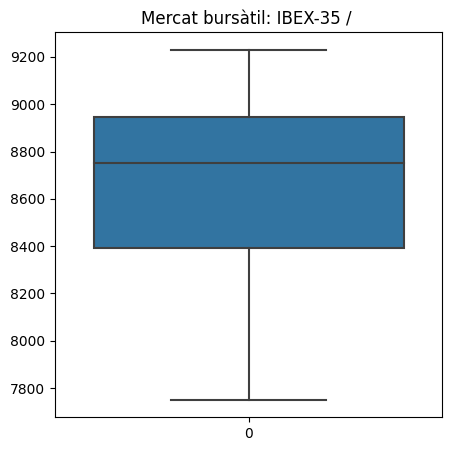

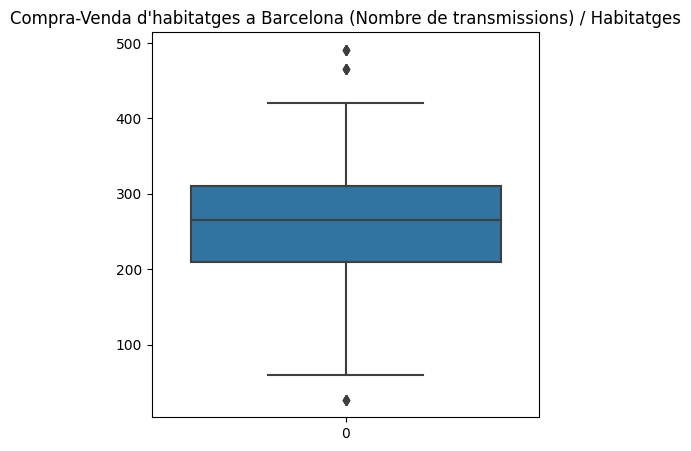

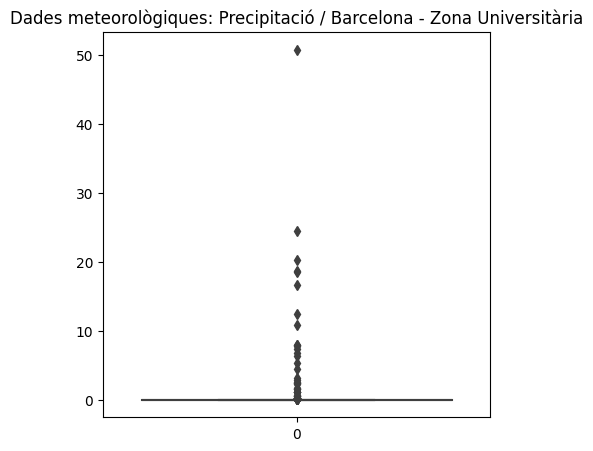

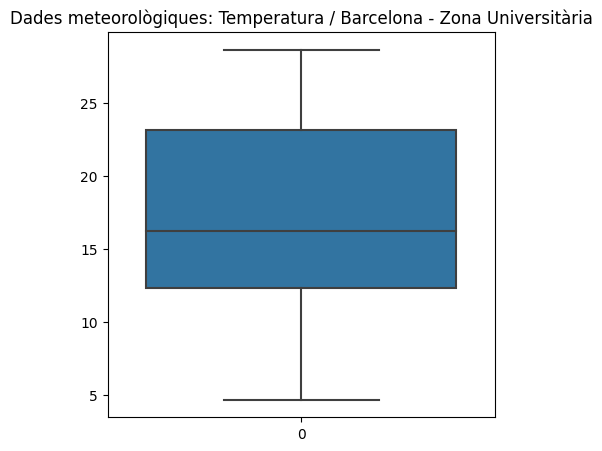

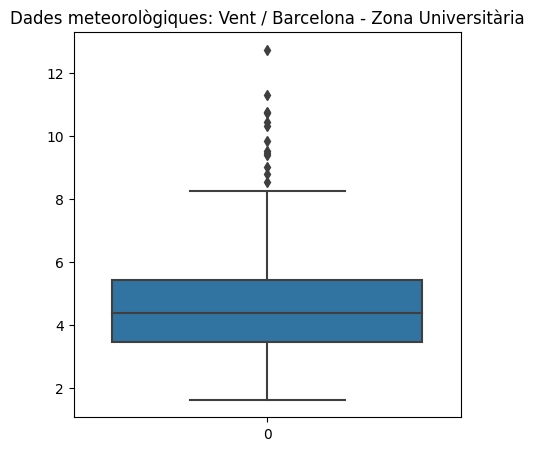

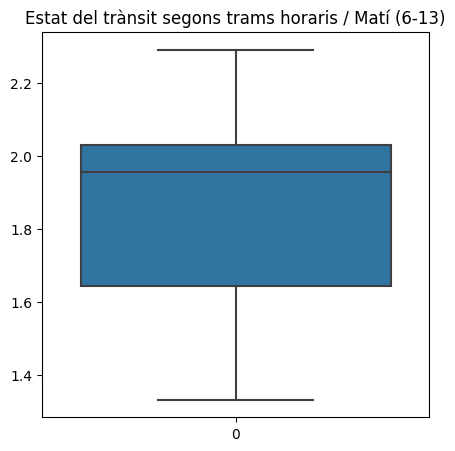

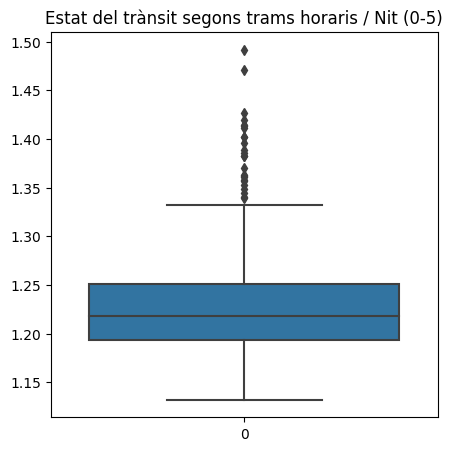

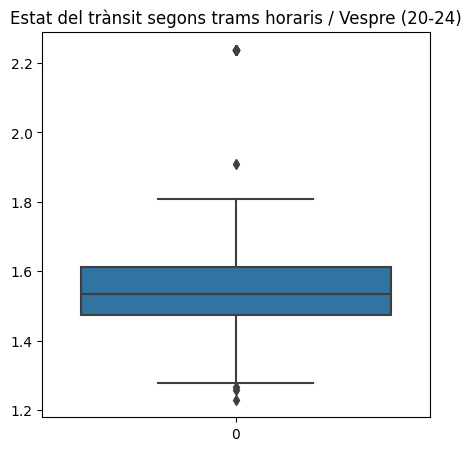

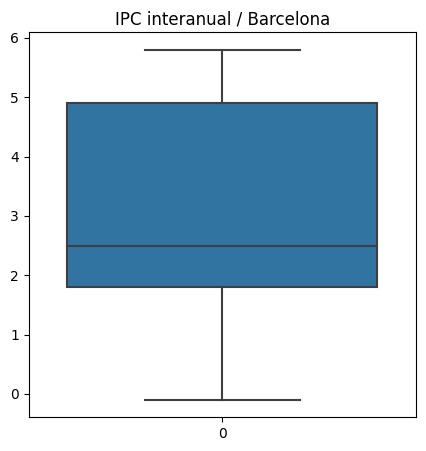

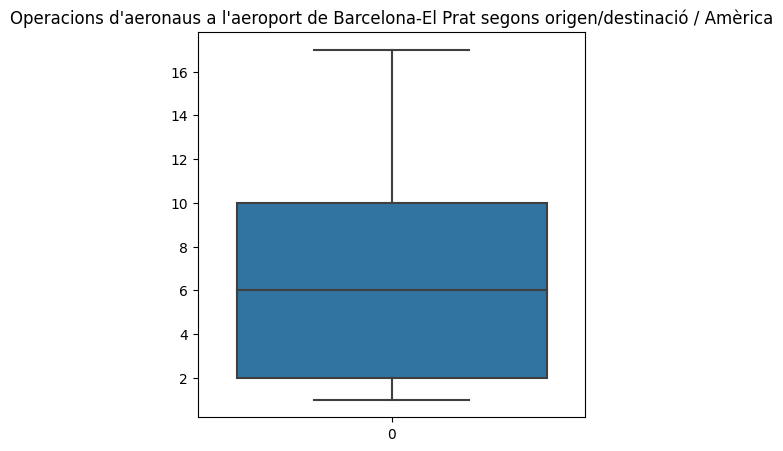

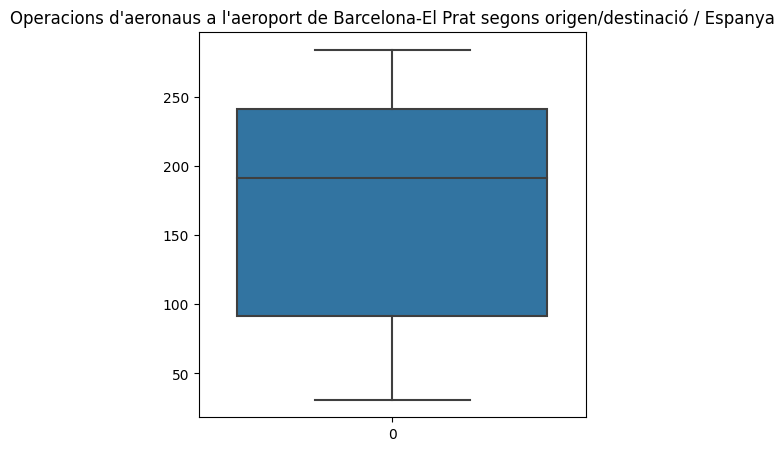

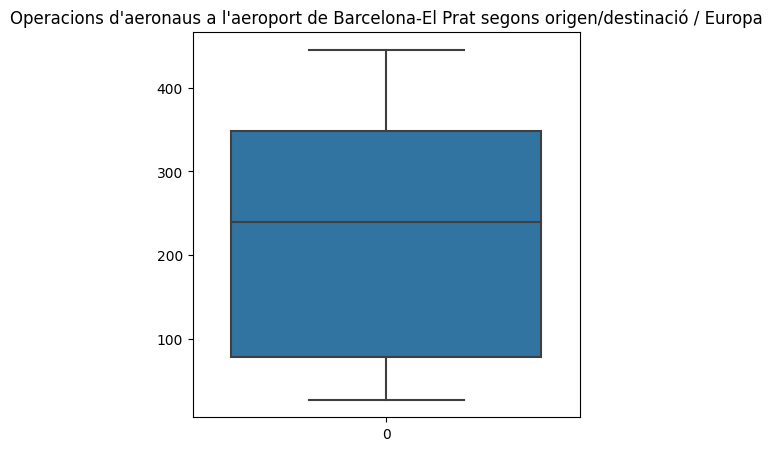

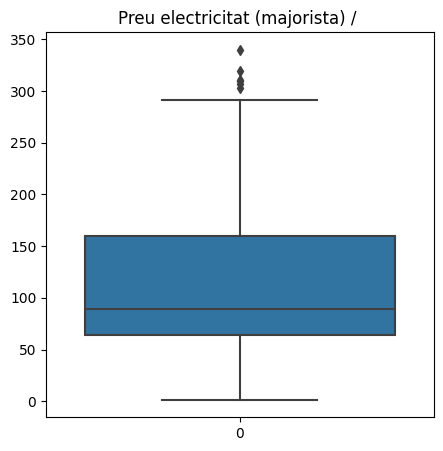

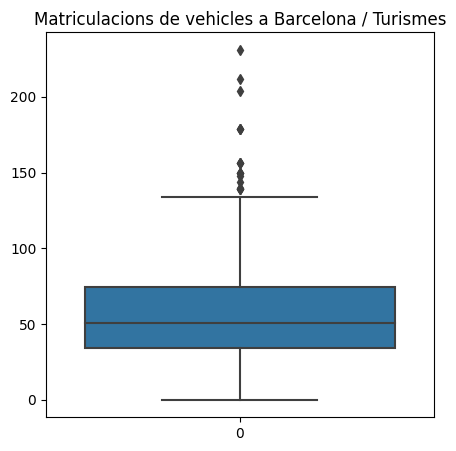

In [12]:
for column in list(ibex_training.columns):
    plt.figure(figsize=(5,5))
    _= sns.boxplot(data=ibex_training[column]).set_title(column)

Podemos observar que no todas las variables llegan a presentar valores extremos. Como puede las operaciones en el aeropuerto, el IPC o el estado del transito según ciertas  horas.
Pero por desgracia, si que vemos una gran cantidad de valores extremos en ciertas variables. Como puede ser, los datos meteorologicos de precipitación y viento, el estado del transito en la noche o el numero de matriculaciones del vehiculos en barcelona.
Esto nos puede dar sospechas de que los valores extremos pueden ser importantes para el modelo y por lo tanto no deberíamos de eliminar.

Ahora para hacer el proceso de eliminación de valores extremos. Para esto utilizaremos LocalOutlierFactoR. debido a que la gran mayoría de las variables no son siguen una distribución gaussiana.

In [13]:
LOF = LocalOutlierFactor(n_neighbors=20)
first_prediction = LOF.fit_predict(ibex_training.values)
outliers = first_prediction == -1
no_outliers = first_prediction == 1
print(f"{outliers.sum()} filas outliers")
print(f"{no_outliers.sum()} filas no outliers")

6 filas outliers
286 filas no outliers


(286, 14)

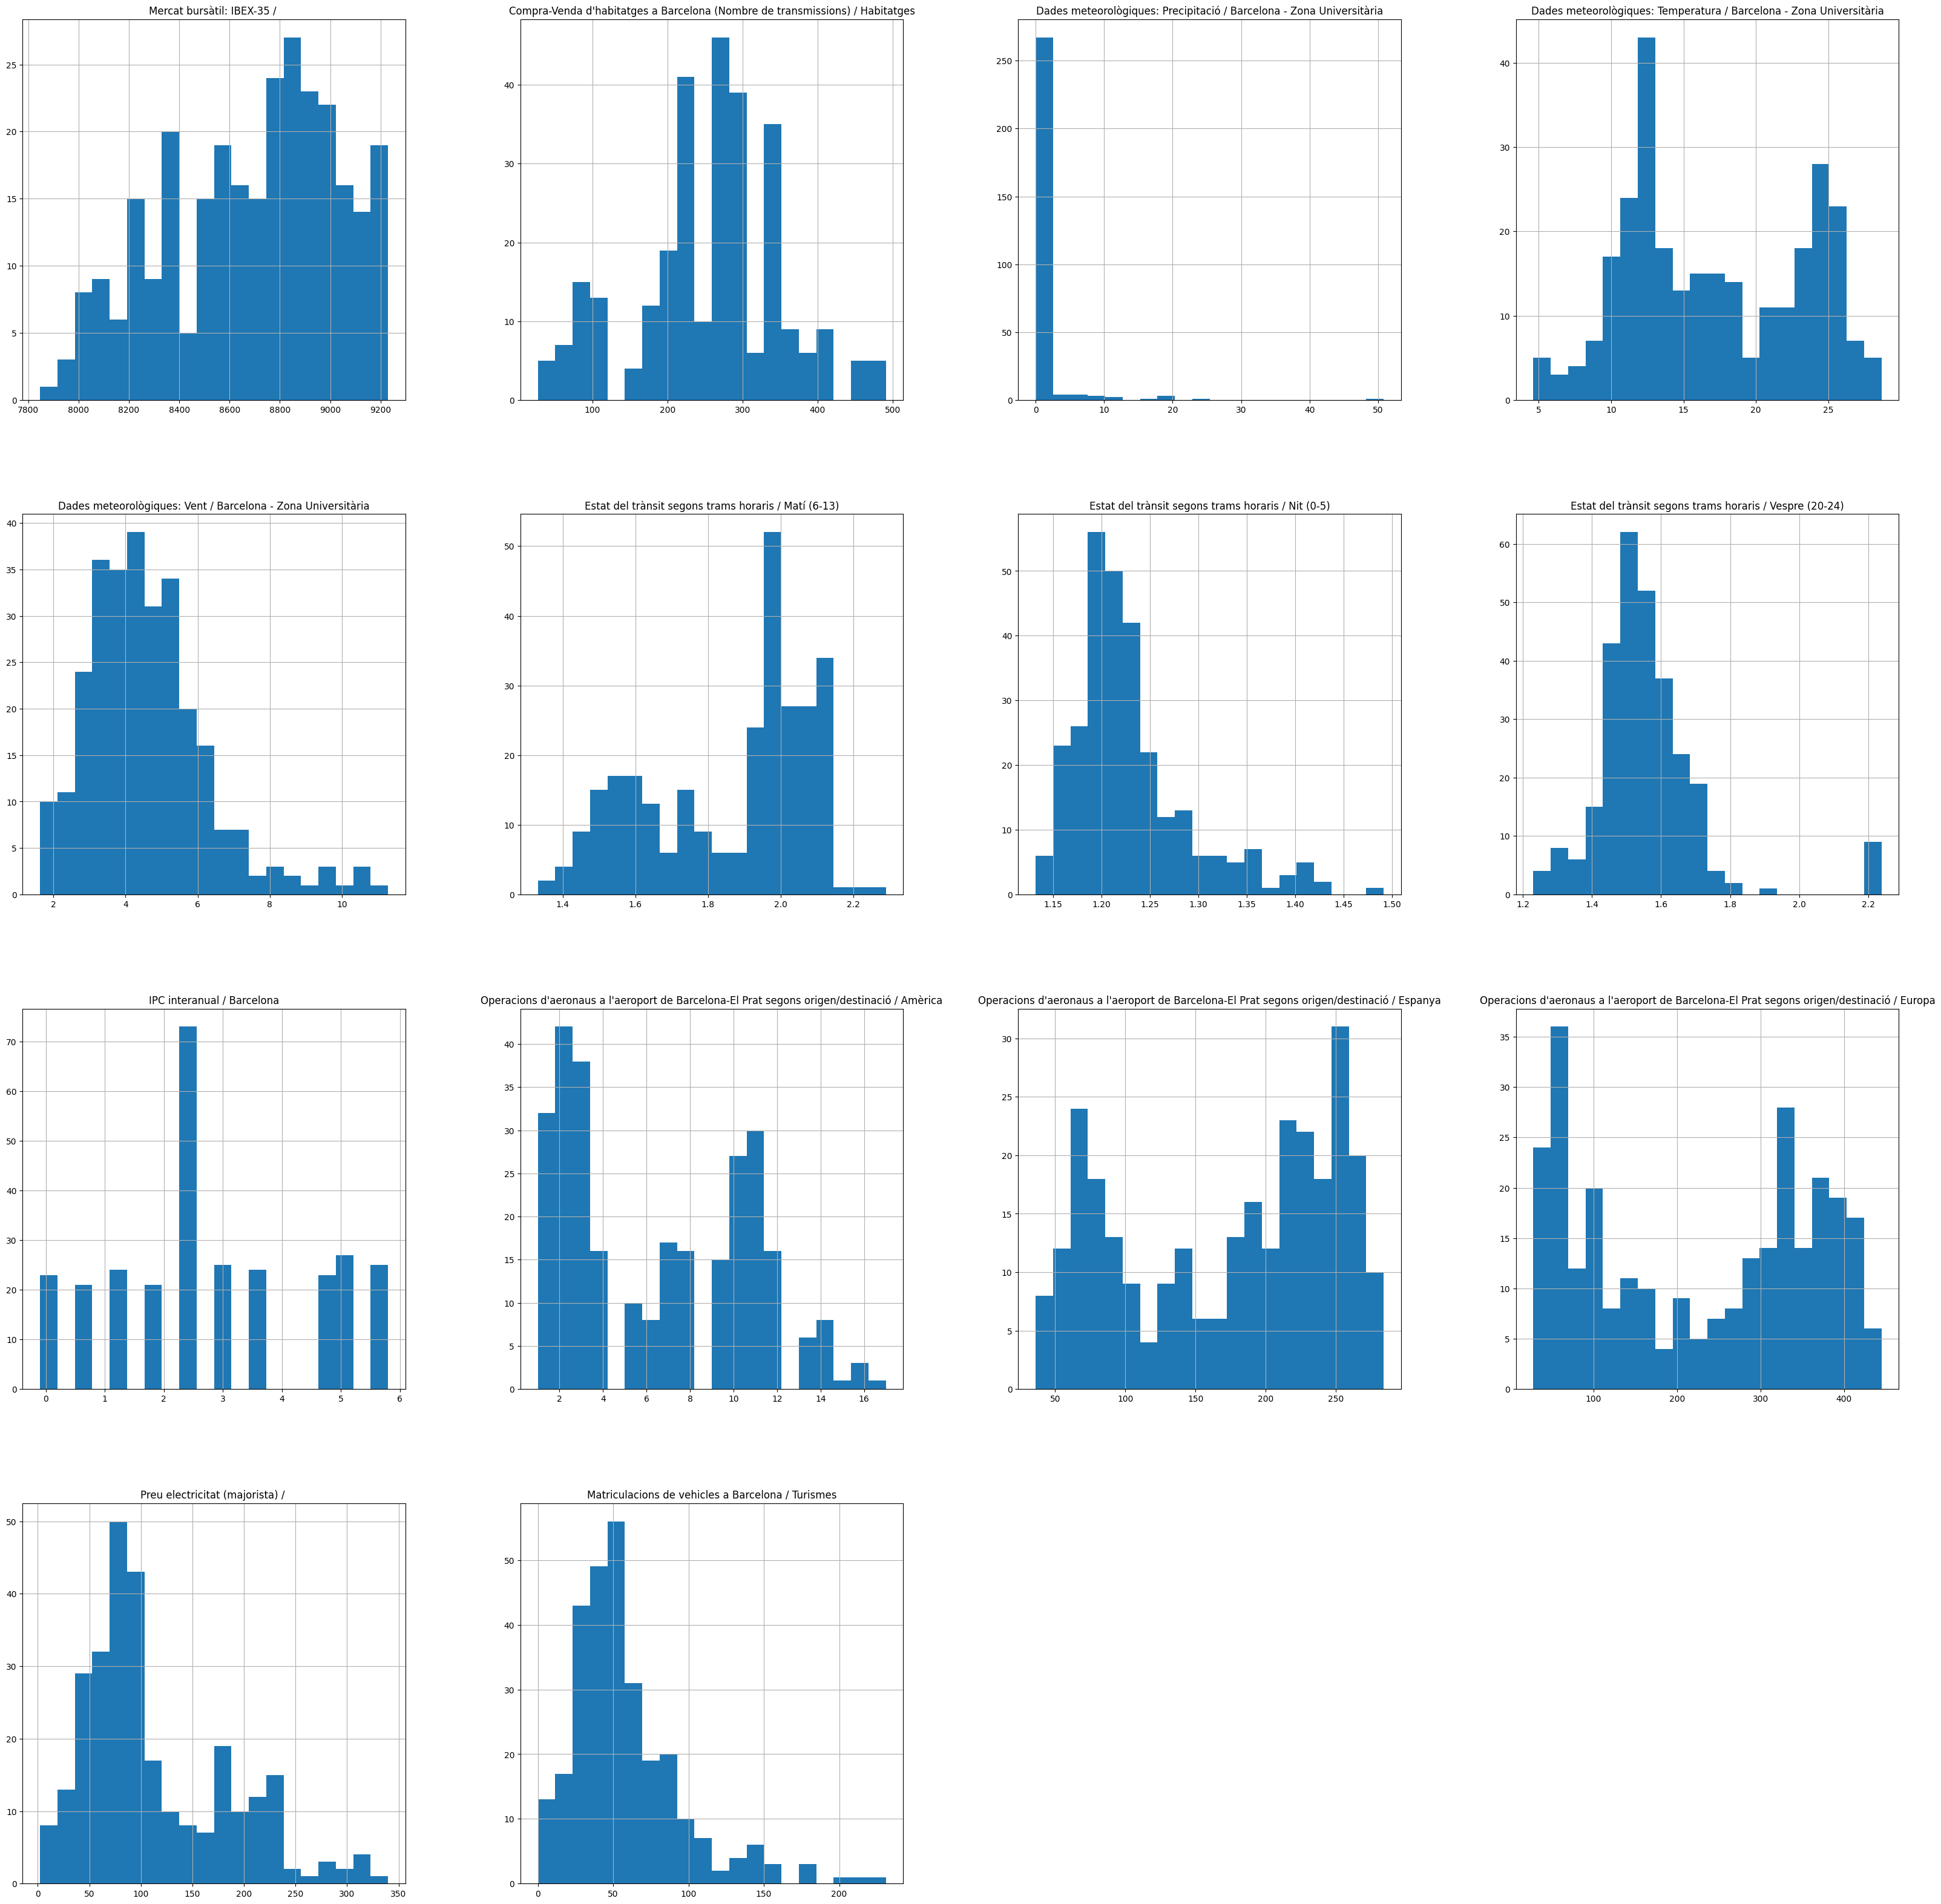

In [14]:
ibex_reduced_1 = ibex_training[no_outliers].copy()
ibex_reduced_1.shape
column_data = ibex_reduced_1.iloc[:,:]
_=column_data.hist(bins = 20, figsize=(40,40))


Podemos ver que no solo ha dicho que con el mostreo de 20 vecinos no se han podido descartar una gran cantidad de datos. Por lo tanto, los histogramas siguen siendo practicamente iguales que antes. Probaremos a subir el numero de vecinos. 

In [15]:
LOF = LocalOutlierFactor(n_neighbors=40)
second_prediction = LOF.fit_predict(ibex_training.values)
outliers_2 = second_prediction == -1
no_outliers_2 = second_prediction == 1
print(f"{outliers_2.sum()} filas outliers")
print(f"{no_outliers_2.sum()} filas no outliers")

3 filas outliers
289 filas no outliers


Viendo que subiendo el numero de vecino, descarta aún menos vecinos nos da una referencia de que tener todas las filas tienen relevancia. Esto se puede ver debido a que la mayoría de los histogramas de las variables llegan a tener colas largas. Además que los métodos de eliminación de extremos sobre variables no gaussianas pueden llegar a ser menos fiables.

A consecuencia, hacemos la elección de no eliminar ningún valor extremo.

In [16]:
ibex_training_semiprocessed = ibex_training.copy()

ibex_training_semiprocessed.describe(include="all").T

count      mean      std  \
Mercat bursàtil: IBEX-35 /                          292.0  8675.037  352.636   
Compra-Venda d'habitatges a Barcelona (Nombre d...  292.0   257.226   97.482   
Dades meteorològiques: Precipitació / Barcelona...  292.0     0.886    4.160   
Dades meteorològiques: Temperatura / Barcelona ...  292.0    17.096    5.974   
Dades meteorològiques: Vent / Barcelona - Zona ...  292.0     4.647    1.774   
Estat del trànsit segons trams horaris / Matí (...  292.0     1.860    0.225   
Estat del trànsit segons trams horaris / Nit (0-5)  292.0     1.232    0.063   
Estat del trànsit segons trams horaris / Vespre...  292.0     1.558    0.161   
IPC interanual / Barcelona                          292.0     2.746    1.754   
Operacions d'aeronaus a l'aeroport de Barcelona...  292.0     6.336    4.237   
Operacions d'aeronaus a l'aeroport de Barcelona...  292.0   170.791   75.381   
Operacions d'aeronaus a l'aeroport de Barcelona...  292.0   223.551  135.203   
Preu electricitat (majorista) /                     292.0   111.326   70.299   
Matriculacions de vehicles a Barcelona / Turismes   292.0    59.363   38.338   

                                                         min       25%  \
Mercat bursàtil: IBEX-35 /                          7750.200  8392.700   
Compra-Venda d'habitatges a Barcelona (Nombre d...    27.000   210.000   
Dades meteorològiques: Precipitació / Barcelona...     0.000     0.000   
Dades meteorològiques: Temperatura / Barcelona ...     4.640    12.297   
Dades meteorològiques: Vent / Barcelona - Zona ...     1.630     3.458   
Estat del trànsit segons trams horaris / Matí (...     1.331     1.644   
Estat del trànsit segons trams horaris / Nit (0-5)     1.132     1.194   
Estat del trànsit segons trams horaris / Vespre...     1.230     1.475   
IPC interanual / Barcelona                            -0.100     1.800   
Operacions d'aeronaus a l'aeroport de Barcelona...     1.000     2.000   
Operacions d'aeronaus a l'aeroport de Barcelona...    31.000    91.750   
Operacions d'aeronaus a l'aeroport de Barcelona...    28.000    79.500   
Preu electricitat (majorista) /                        1.420    64.401   
Matriculacions de vehicles a Barcelona / Turismes      0.000    34.000   

                                                         50%       75%  \
Mercat bursàtil: IBEX-35 /                          8753.300  8944.925   
Compra-Venda d'habitatges a Barcelona (Nombre d...   265.000   310.000   
Dades meteorològiques: Precipitació / Barcelona...     0.000     0.000   
Dades meteorològiques: Temperatura / Barcelona ...    16.195    23.142   
Dades meteorològiques: Vent / Barcelona - Zona ...     4.395     5.443   
Estat del trànsit segons trams horaris / Matí (...     1.955     2.028   
Estat del trànsit segons trams horaris / Nit (0-5)     1.218     1.251   
Estat del trànsit segons trams horaris / Vespre...     1.535     1.612   
IPC interanual / Barcelona                             2.500     4.900   
Operacions d'aeronaus a l'aeroport de Barcelona...     6.000    10.000   
Operacions d'aeronaus a l'aeroport de Barcelona...   191.000   241.250   
Operacions d'aeronaus a l'aeroport de Barcelona...   240.000   348.500   
Preu electricitat (majorista) /                       89.226   159.630   
Matriculacions de vehicles a Barcelona / Turismes     51.000    74.500   

                                                         max  
Mercat bursàtil: IBEX-35 /                          9230.300  
Compra-Venda d'habitatges a Barcelona (Nombre d...   491.000  
Dades meteorològiques: Precipitació / Barcelona...    50.800  
Dades meteorològiques: Temperatura / Barcelona ...    28.660  
Dades meteorològiques: Vent / Barcelona - Zona ...    12.730  
Estat del trànsit segons trams horaris / Matí (...     2.290  
Estat del trànsit segons trams horaris / Nit (0-5)     1.492  
Estat del trànsit segons trams horaris / Vespre...     2.238  
IPC interanual / Barcelona                             5.800  

## Normalización de variables

En este caso debido a que 1 de la variables (*Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges*) sigue una distribución normal. Haremos un proceso de estandarización.



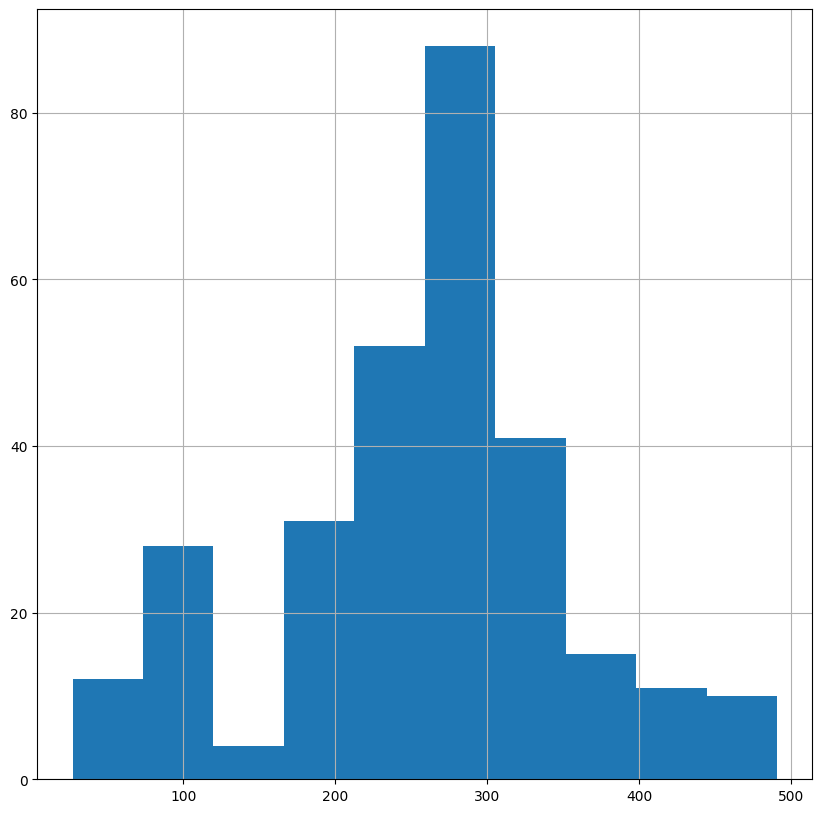

In [17]:
columna = ibex_training_semiprocessed.iloc[:,1].copy()
_=columna.hist(figsize=(10,10))

count    2.920e+02
mean    -9.125e-17
std      1.002e+00
min     -2.366e+00
25%     -4.853e-01
50%      7.988e-02
75%      5.423e-01
max      2.402e+00
Name: Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges, dtype: float64

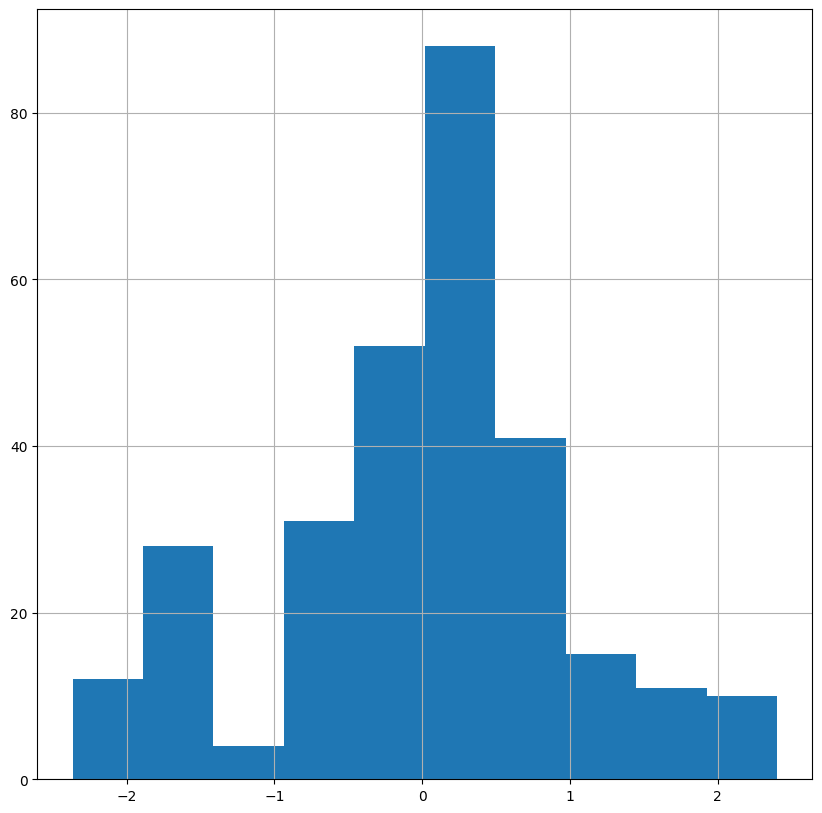

In [18]:

columna = stats.zscore(columna)
ibex_training_semiprocessed.iloc[:,1]= columna
ibex_training_semiprocessed.iloc[:,1].describe(include="all").T
_=ibex_training_semiprocessed.iloc[:,1].hist(figsize=(10,10))

Primero de todo, vemos que tanto la media como la desviación típica no es exactamente 0, esto es debido a la precisión de la coma flotante, así para nuestro caso este error es aceptable. 
A continuación, comparando las 2 imagenes anteriores podemos observar que los 2 histogramas son iguales con la única diferencia de que ahora el centro de la campana de gauss está en x = 0. 

Por último, haremos una transformación de las variables no gaussianas.
Para esto comparamos 3 métodos:
* Estandarización
* Yeo-Johnson
* Box-Cox
A continuación podemos observar las diferentes variables con sus respectivas distribuciones.
Esto nos servirá para poder hacer comparaciones a posteriori.

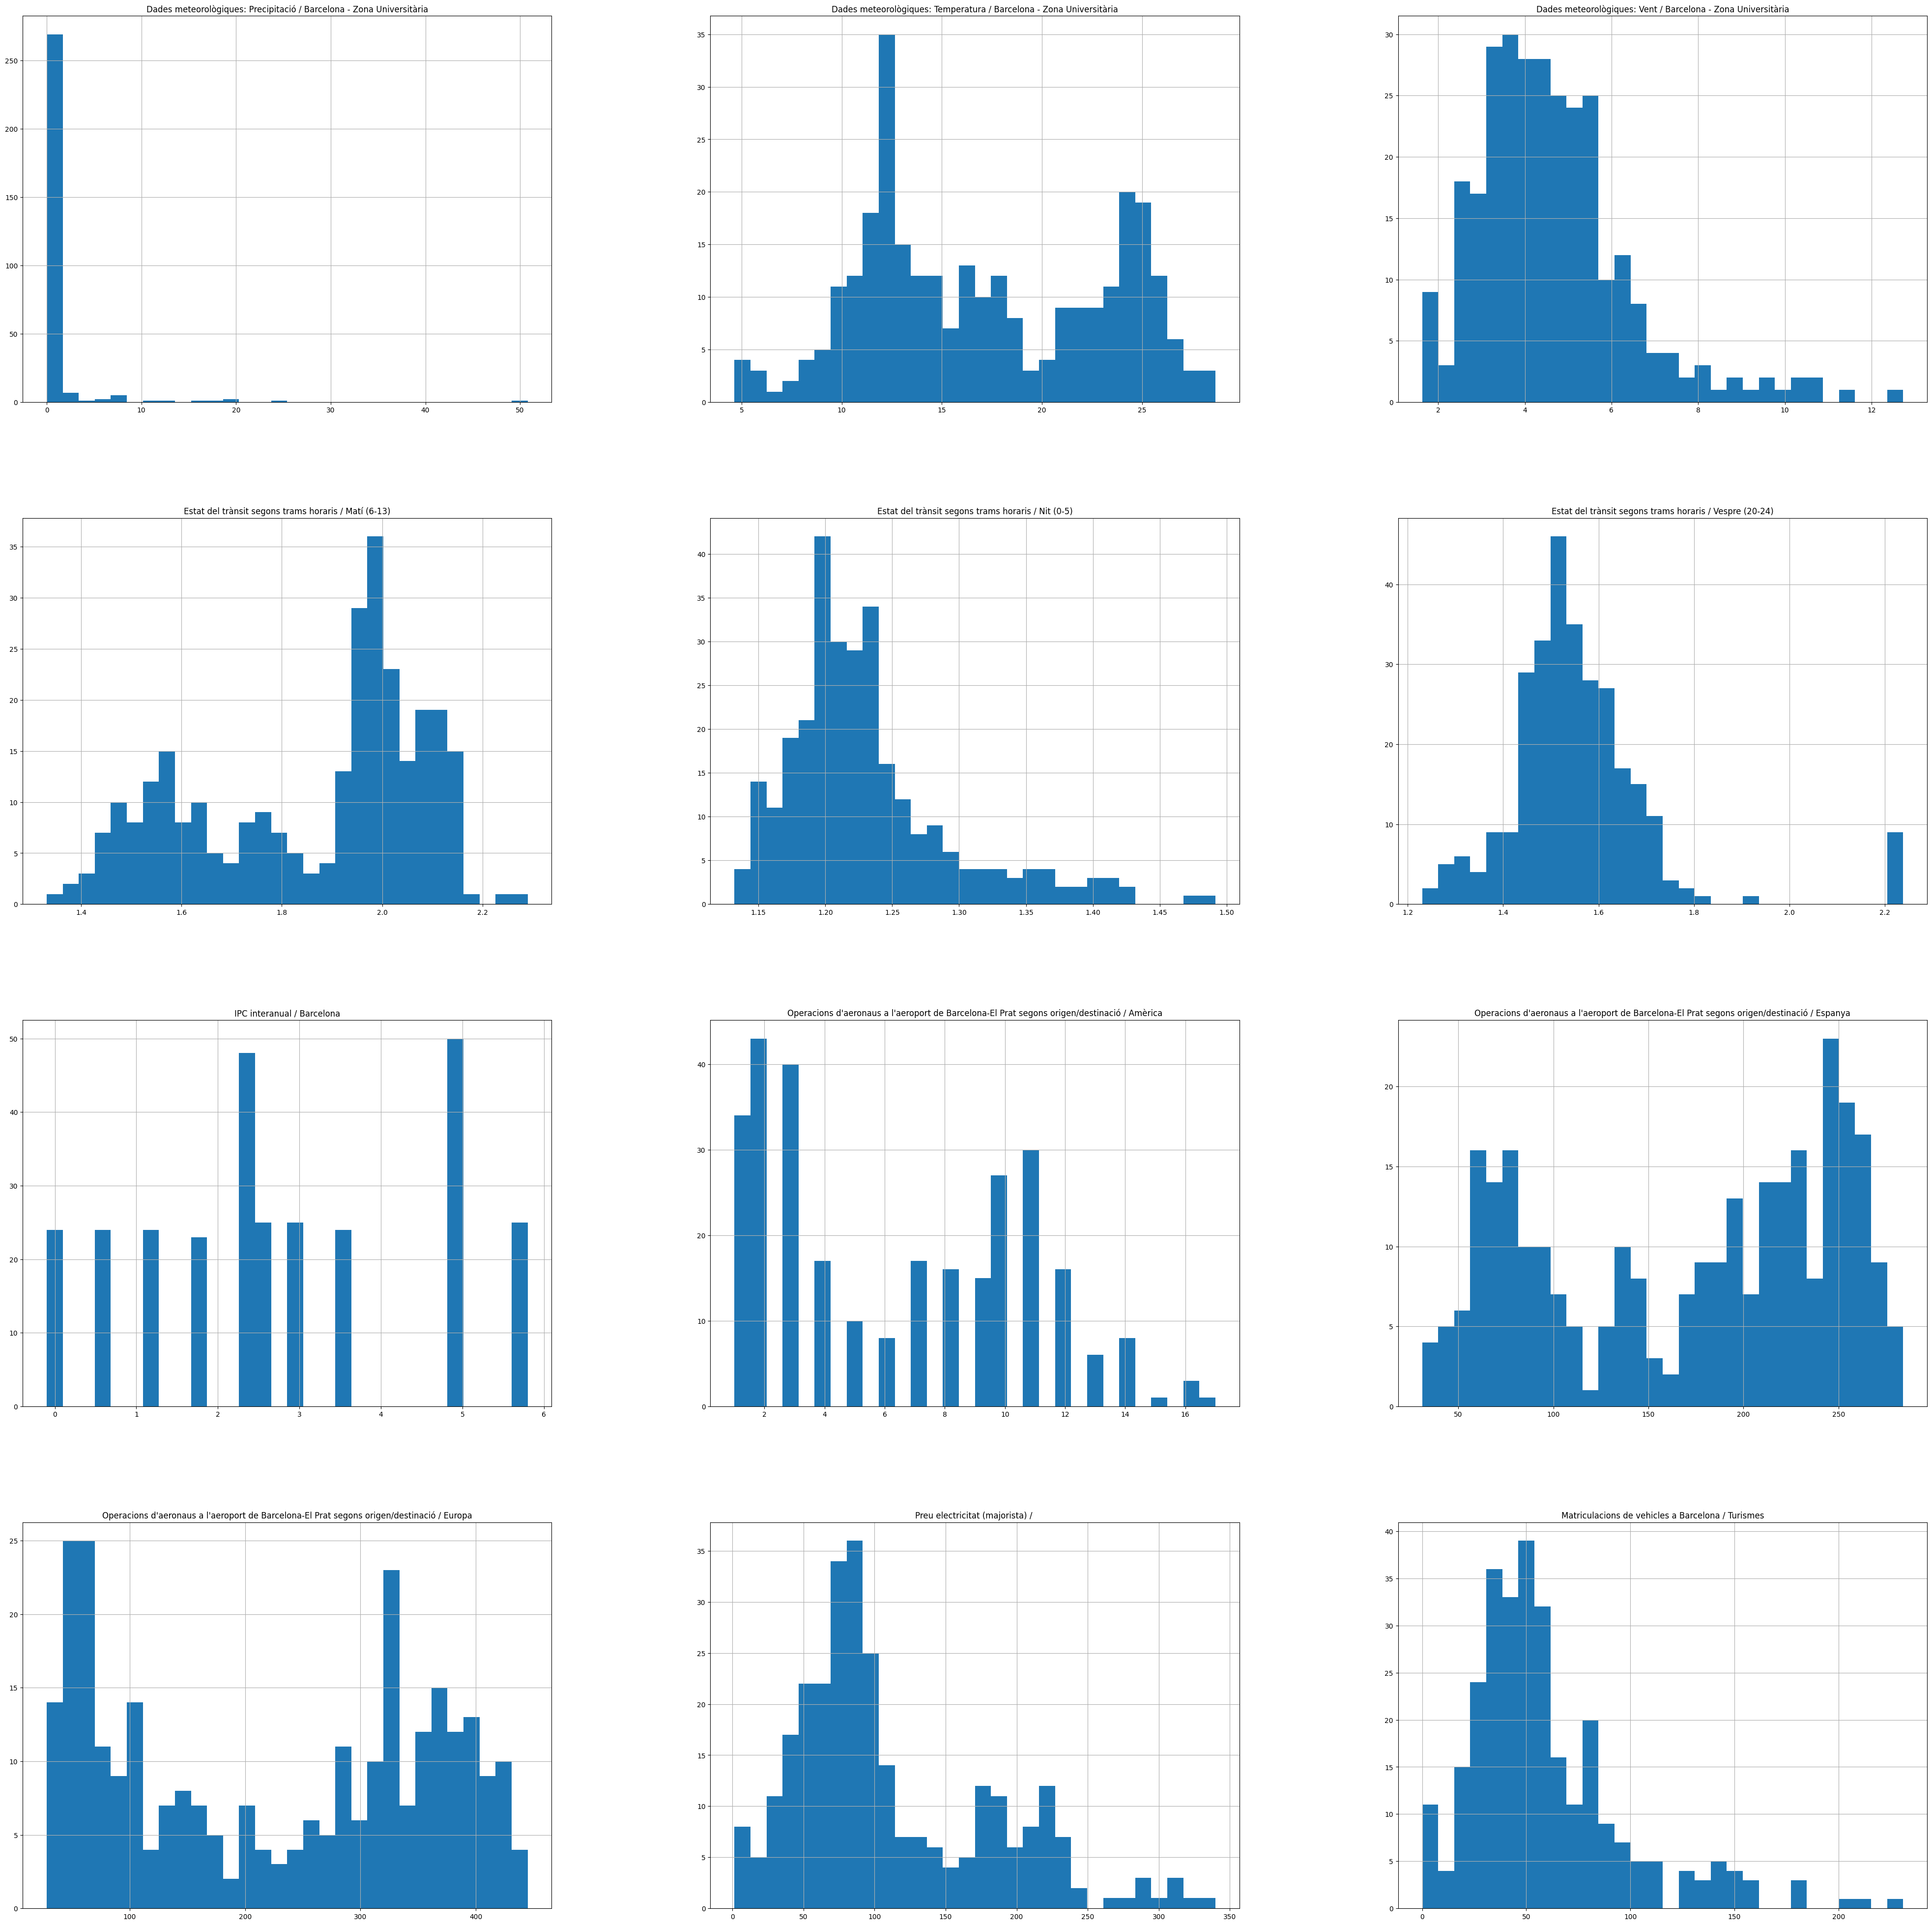

In [19]:
column_data = ibex_training_semiprocessed.iloc[:,2:]
_=column_data.hist(figsize=(50,50), bins=30)

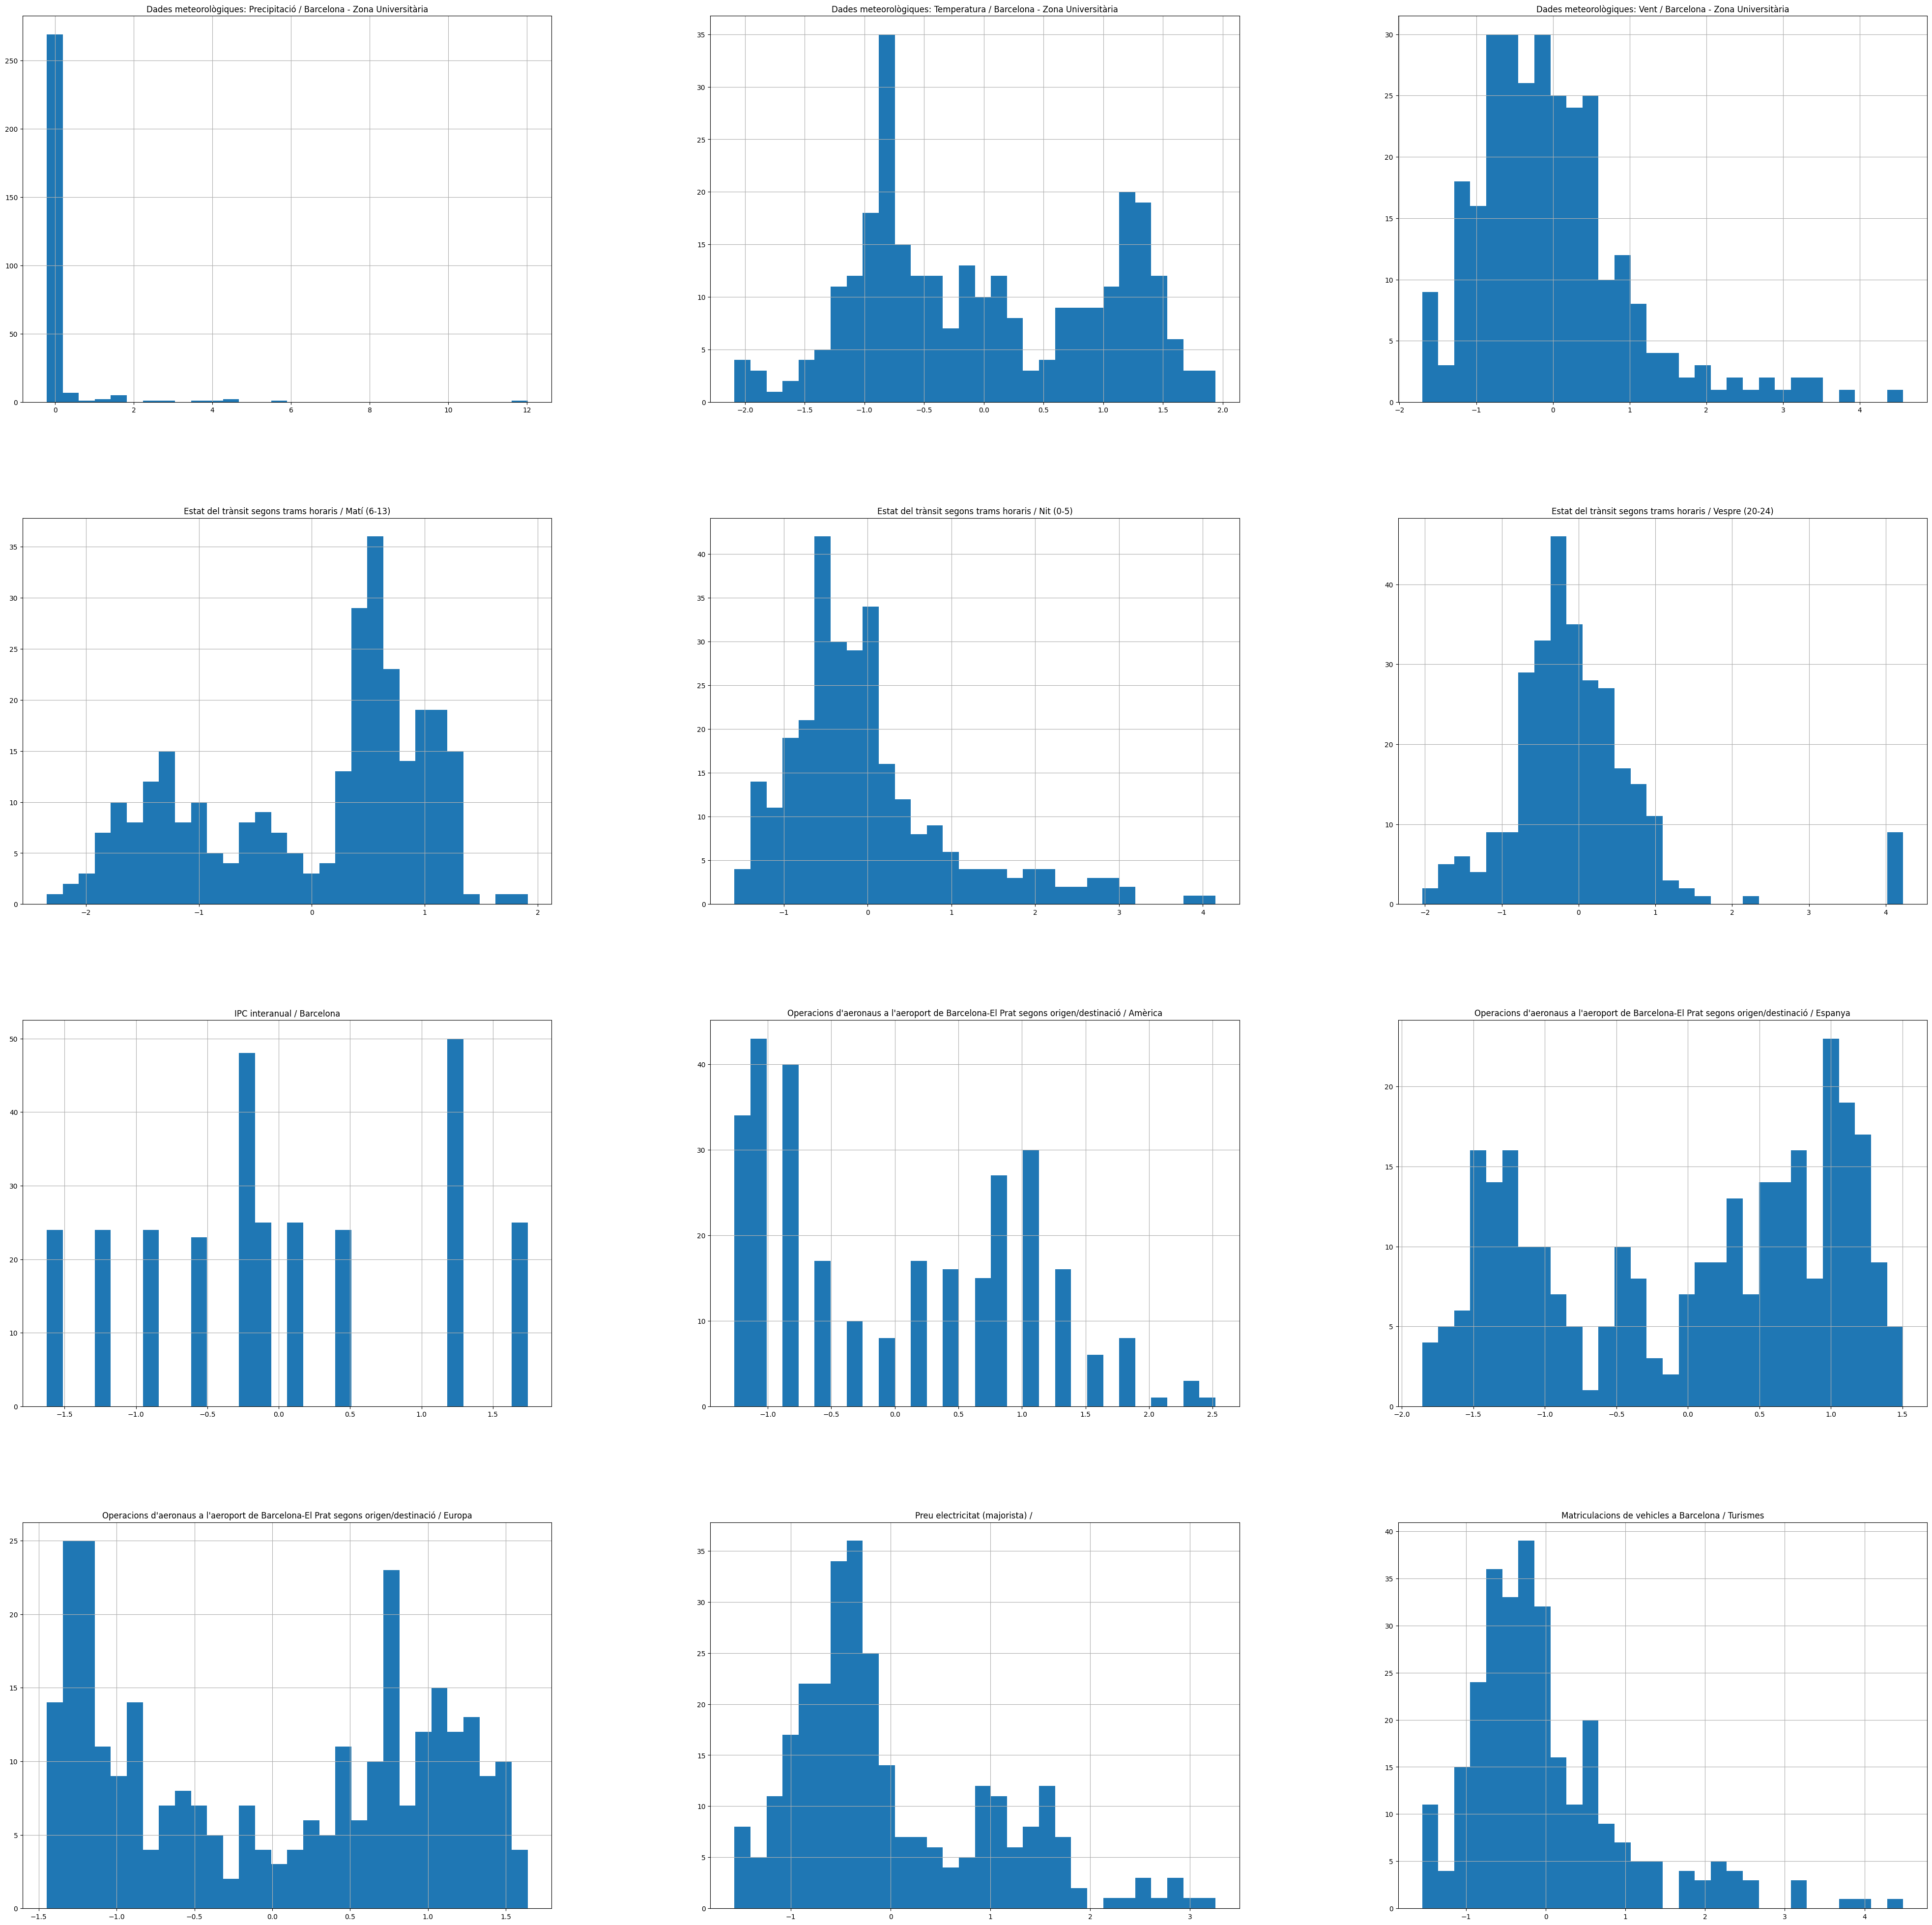

In [20]:
tabla_normalizada = column_data.copy()
tabla_normalizada = stats.zscore(tabla_normalizada)
_=tabla_normalizada.hist(figsize=(50,50), bins=30)

Podemos ver en la figura de encima, que la estandarización no ha podido transformar las variables para que sean más parecidas a una distribución gaussiana. Por lo tanto, este método lo descartaremos.

A continuación haremos la prueba con el método Yeo-Johnson.

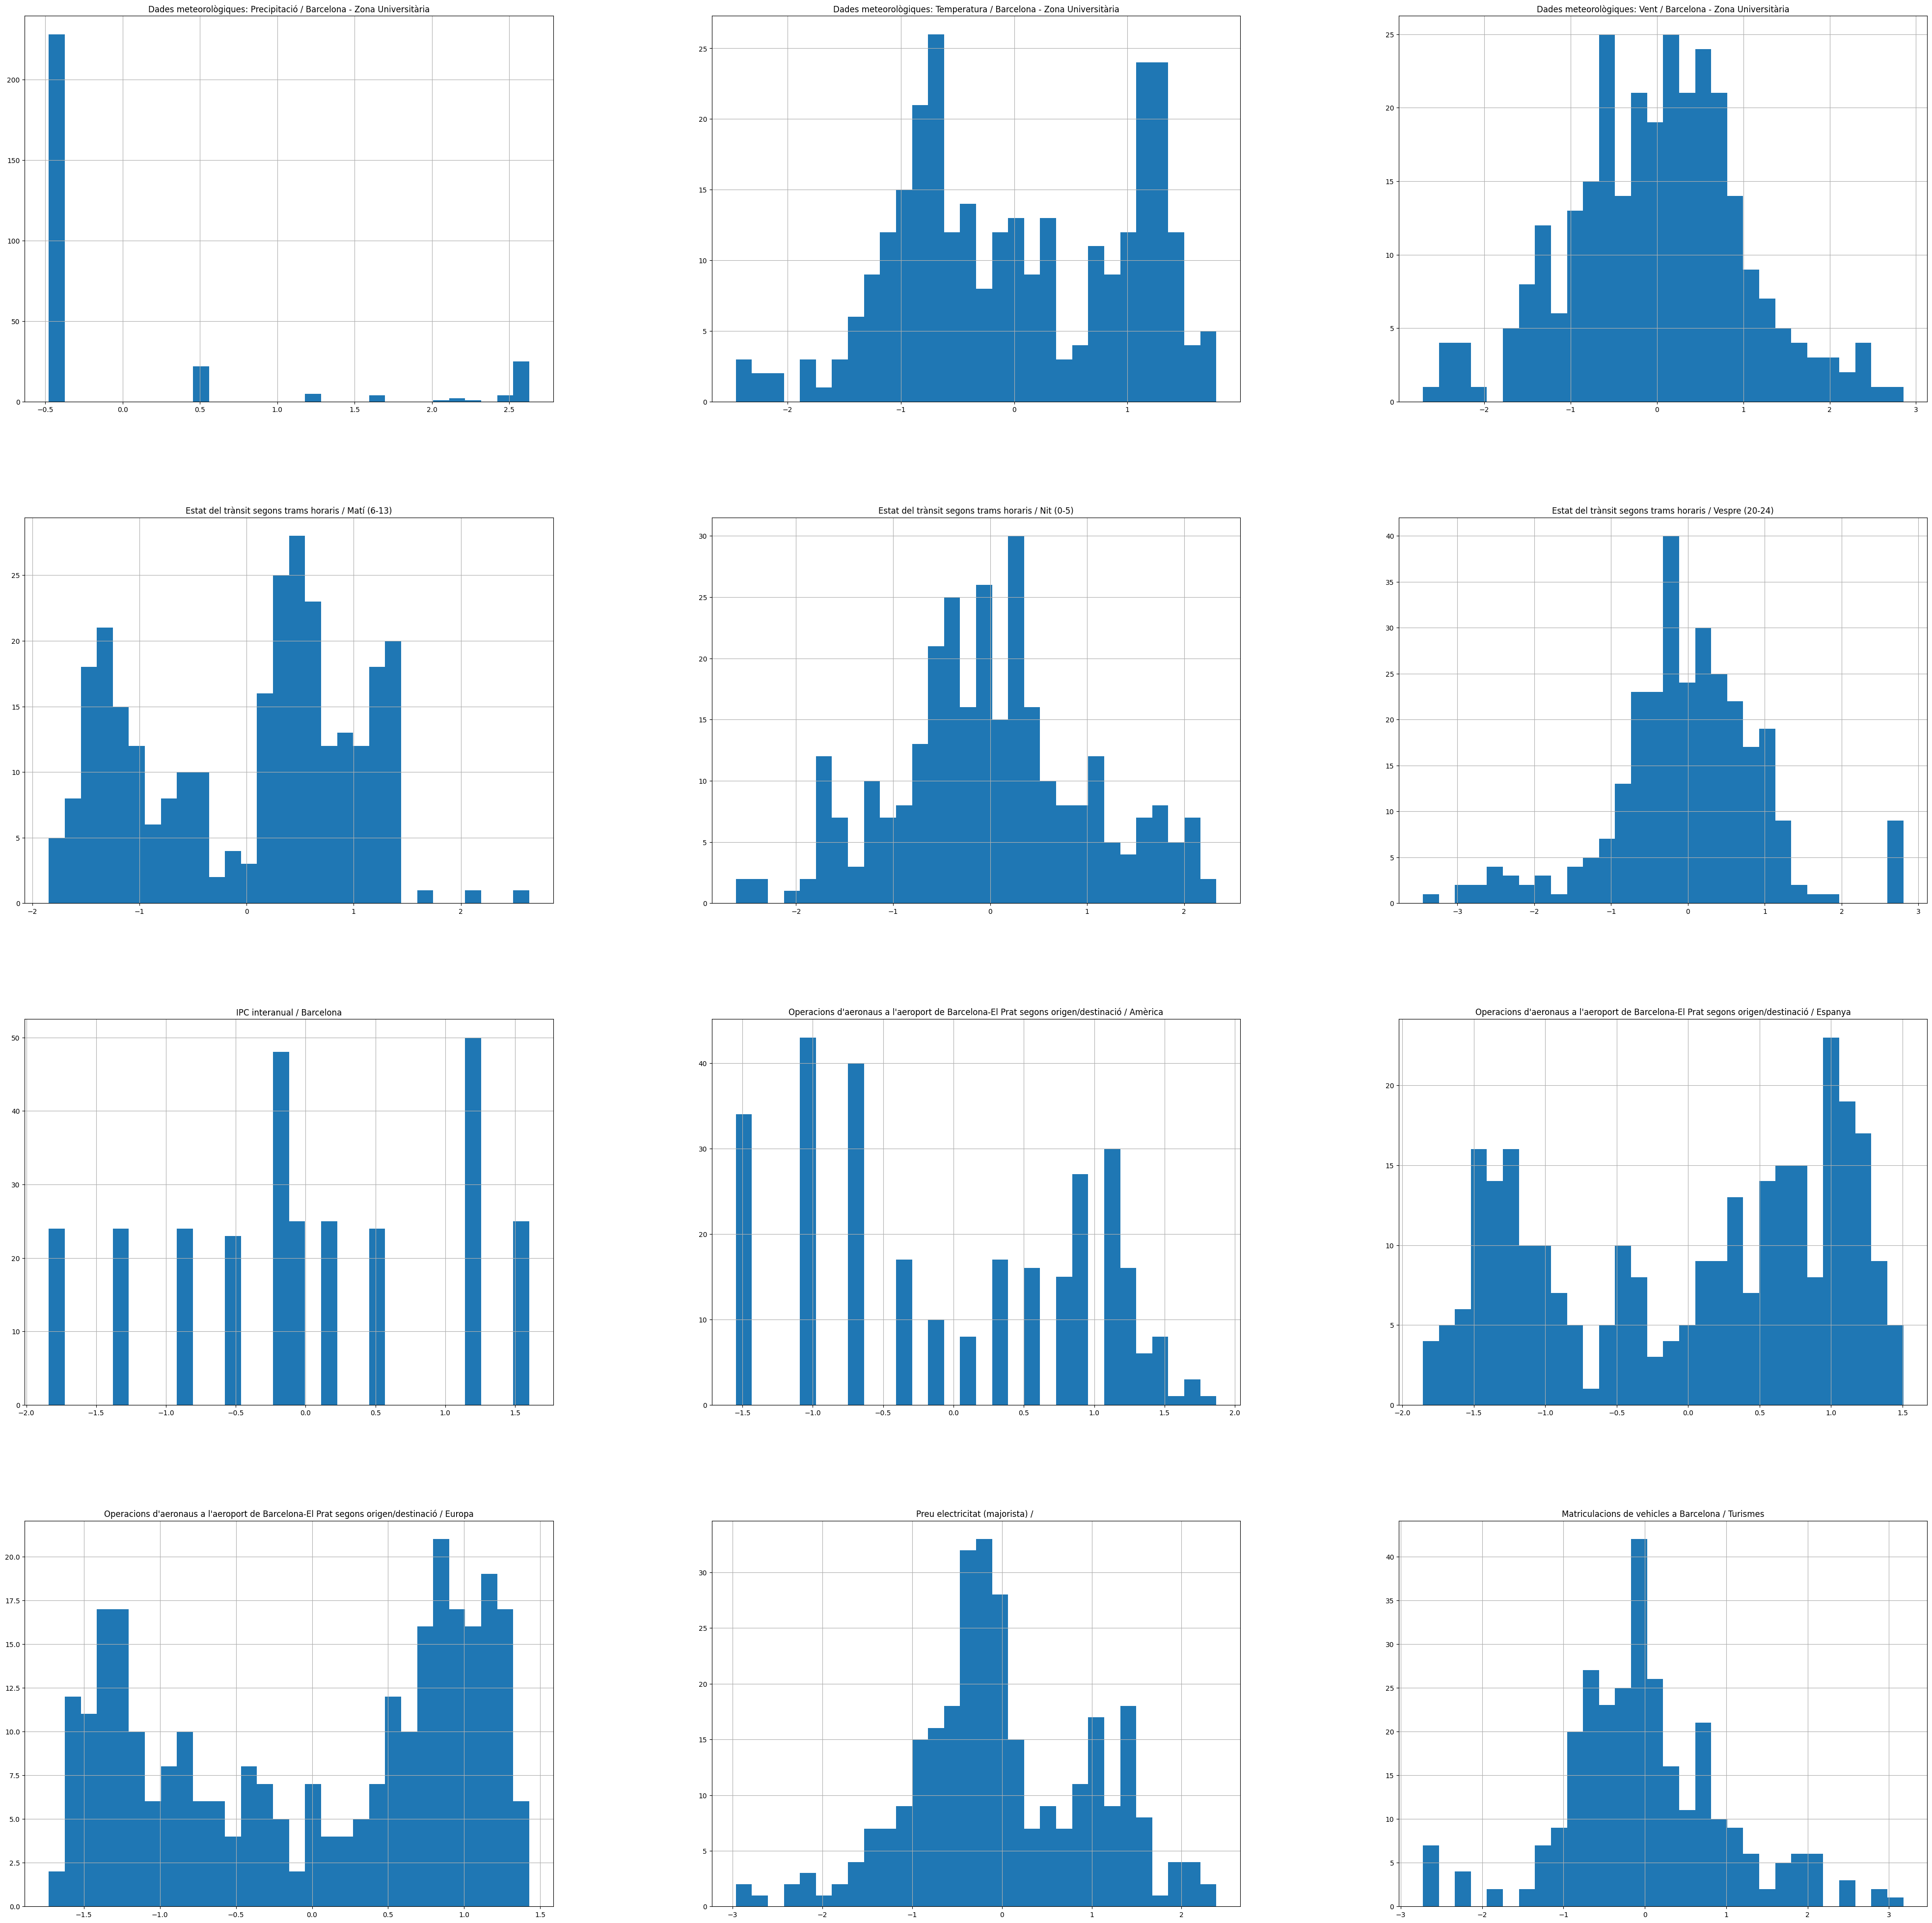

In [21]:
yj_power = PowerTransformer(method='yeo-johnson')

ibex_training_semiprocessed_2 = column_data.copy()
ibex_training_semiprocessed_2.iloc[:,:] = yj_power.fit_transform(ibex_training_semiprocessed_2.iloc[:,:])
_=ibex_training_semiprocessed_2.hist(figsize=(50,50), bins=30)

A primera vista podemos observar que las variables que seguían una distribuccion parecida a possion, se han centrado, haciendo que ahora parezcan más a una distribución gaussiana. Pero desgraciadamente, en las demás variables al ser muy diferentes a una distribución normal. Esta transformación en estos casos ha reducido el rango de las variables y ha hecho que en los histogramas aparezcan valores "extremos". Esto se puede ver en el caso de la primera variable donde antes de hacer la transformación donde gran parte de los datos estaban agrupados en la zona de la izquierda de la gráfica. Pero ahora con la transformación han aparecido más valores en el centro y derecha de esta.

A continuación probaremos con la transformación Box-Cox, pero antes miraremos si hay algun valor en las columnas donde sea 0 o inferior debido a las restricciones de esta transformación.


In [22]:
column_data.eq(0).sum()
column_data.le(0).sum()

Dades meteorològiques: Precipitació / Barcelona - Zona Universitària                          228
Dades meteorològiques: Temperatura / Barcelona - Zona Universitària                             0
Dades meteorològiques: Vent / Barcelona - Zona Universitària                                    0
Estat del trànsit segons trams horaris / Matí (6-13)                                            0
Estat del trànsit segons trams horaris / Nit (0-5)                                              0
Estat del trànsit segons trams horaris / Vespre (20-24)                                         0
IPC interanual / Barcelona                                                                      0
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica      0
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya      0
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa       0
Preu electricitat (m

Dades meteorològiques: Precipitació / Barcelona - Zona Universitària                          228
Dades meteorològiques: Temperatura / Barcelona - Zona Universitària                             0
Dades meteorològiques: Vent / Barcelona - Zona Universitària                                    0
Estat del trànsit segons trams horaris / Matí (6-13)                                            0
Estat del trànsit segons trams horaris / Nit (0-5)                                              0
Estat del trànsit segons trams horaris / Vespre (20-24)                                         0
IPC interanual / Barcelona                                                                     24
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica      0
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya      0
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa       0
Preu electricitat (m

Podemos ver que hay 2 variables que solo tienen valores 0 y el IPC tiene valores negativos. 
En este caso, el desplazamiento de los valores negativos del IPC puede ser variable segun el dataSet que nos entre(Por cada data set, lo que haríamos es coger el valor mínimo del IPC o simplemente tener el valor mínimo que hemos utilizado en el conjunto de entrenamiento y lo sumariamos a todos los valores para desplazarlos. Esto no nos garantiza que todos los valores que nos lleguen en un futuro sean mayores. Por lo tanto, Box-Cox fallaría), no le aplicaremos la transformación. Al resto de columnas si que lo que haremos es añadir un desplazamiento para que no exitan estos 0.

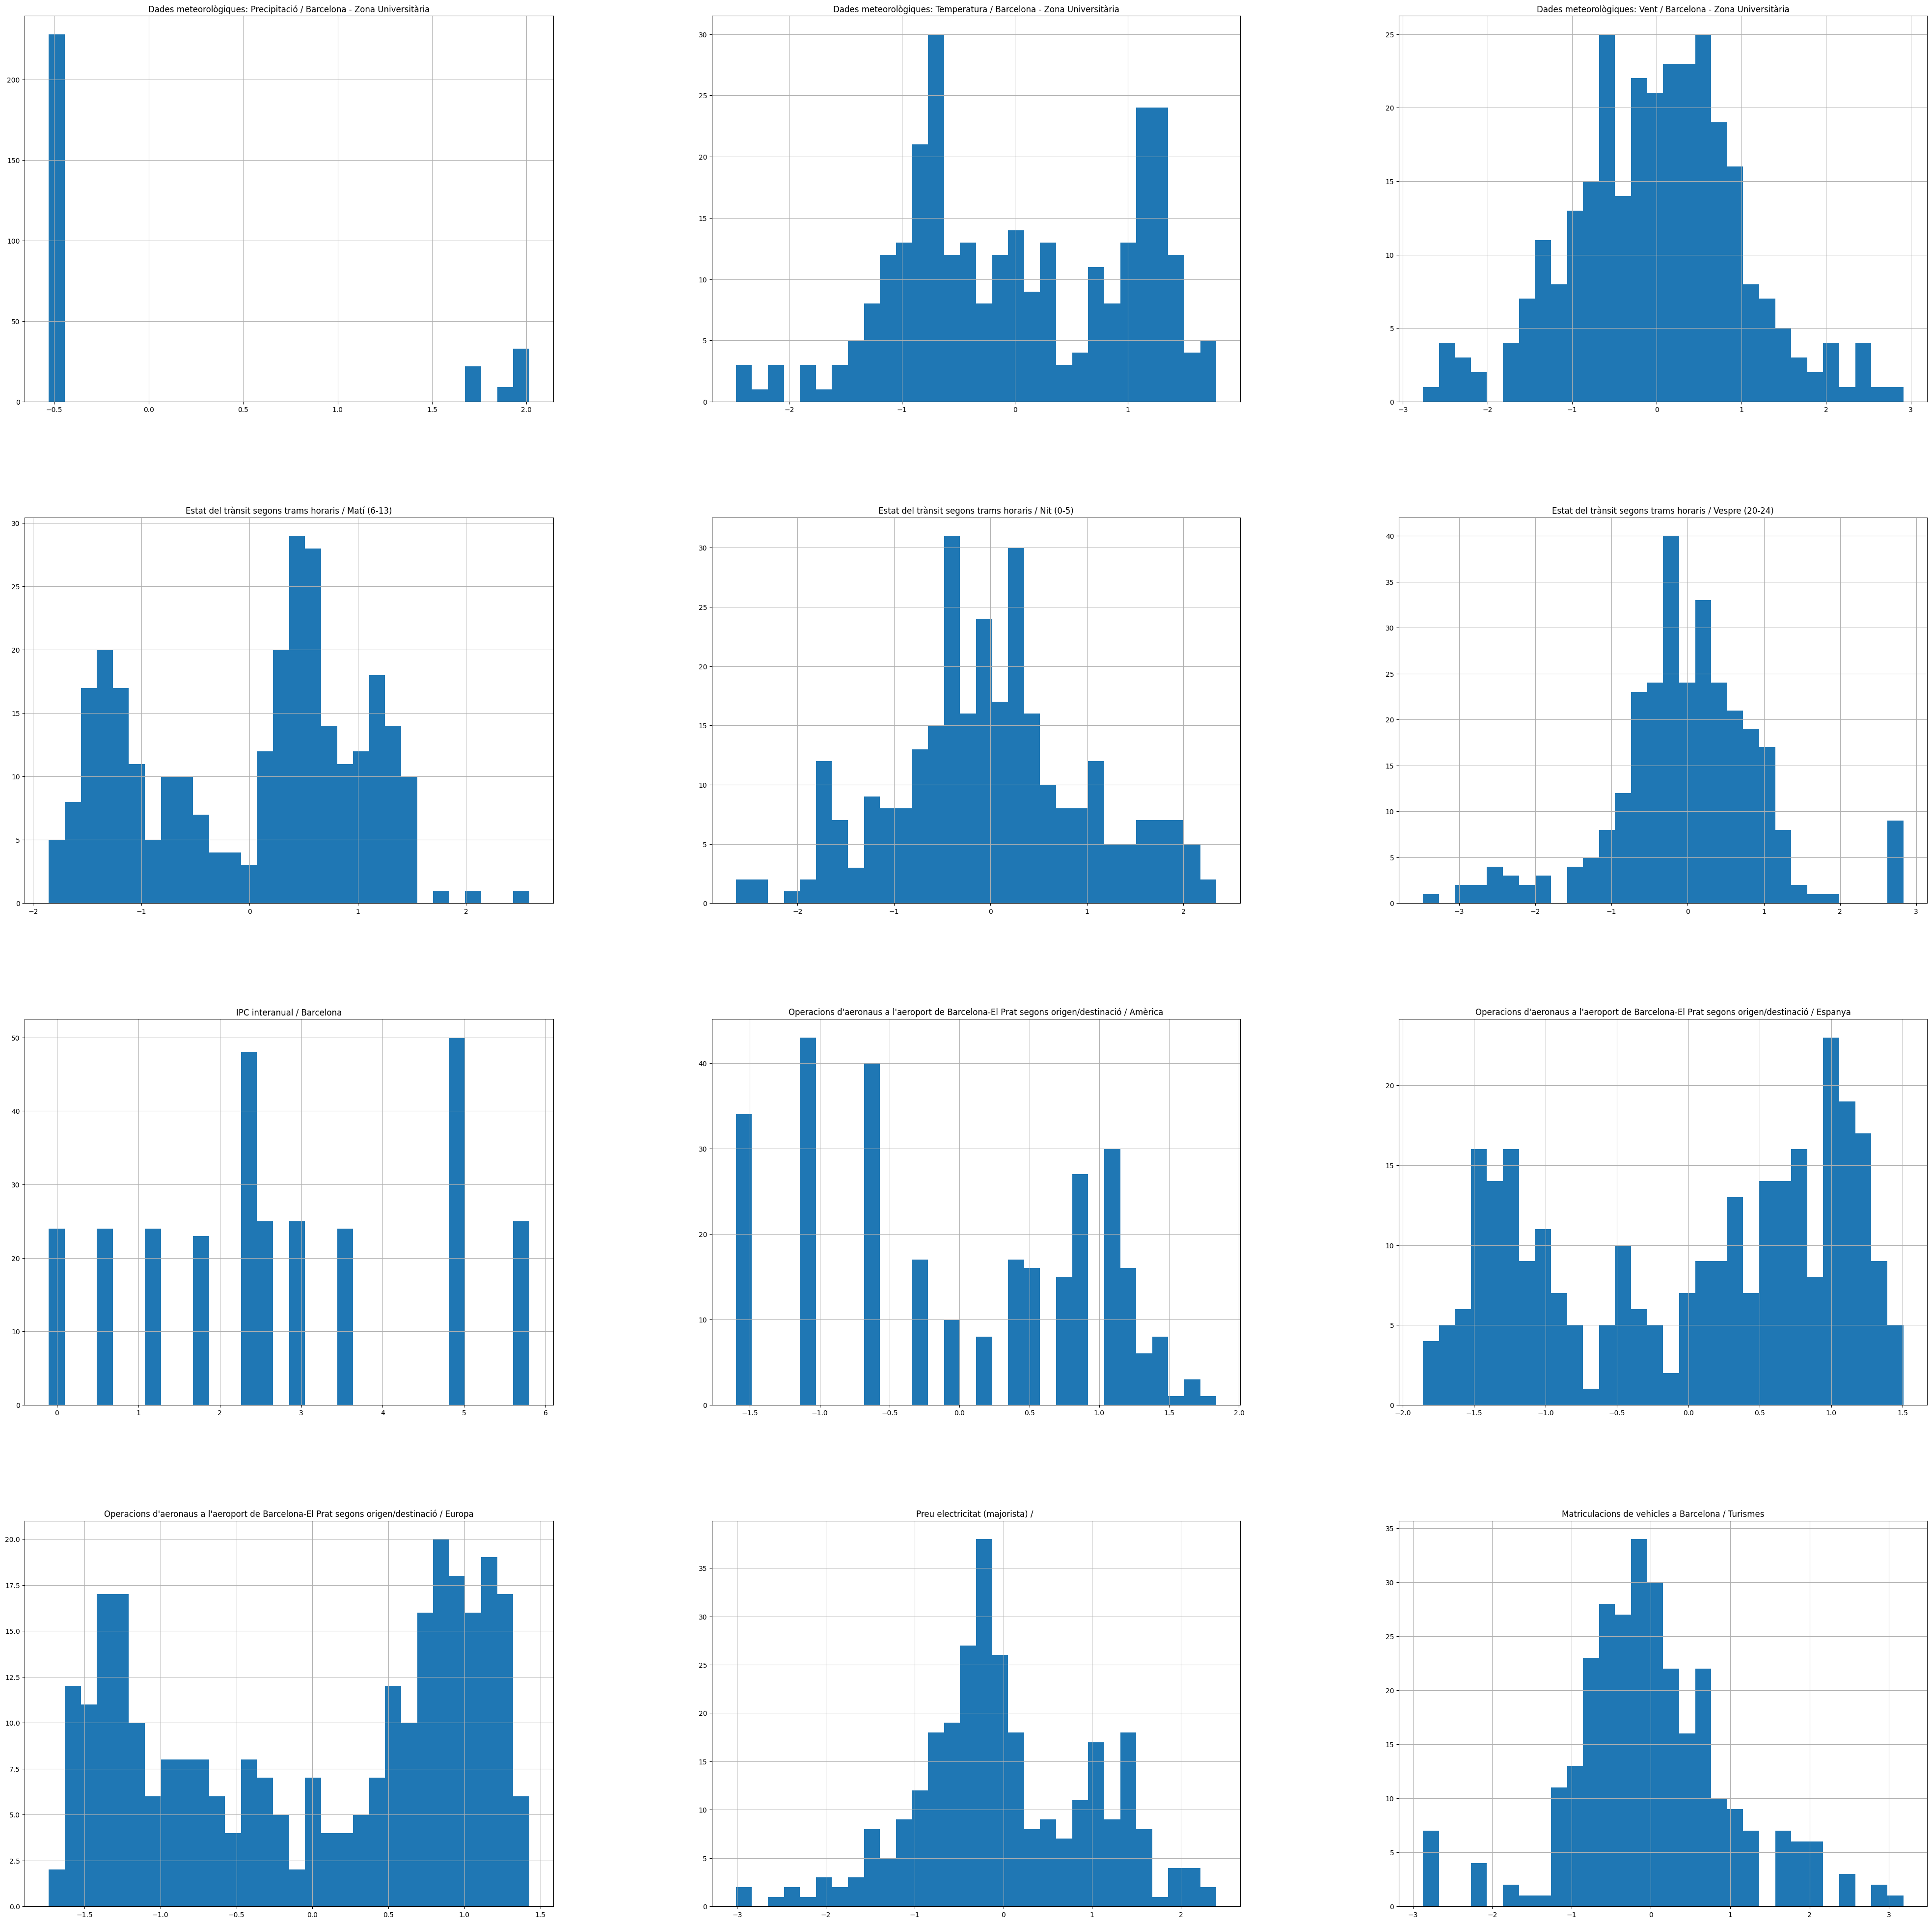

In [23]:

BoxCox = PowerTransformer(method='box-cox')
ibex_training_semiprocessed_3 = column_data.copy()
ibex_training_semiprocessed_3[ibex_training_semiprocessed_3.eq(0)] += 0.01
ibex_training_semiprocessed_3.loc[:,ibex_training_semiprocessed_3.columns != "IPC interanual / Barcelona"] = BoxCox.fit_transform(ibex_training_semiprocessed_3.loc[:,ibex_training_semiprocessed_3.columns != "IPC interanual / Barcelona"])
_=ibex_training_semiprocessed_3.hist(figsize=(50,50), bins=30)

A primeras podemos ver que ha hecho en variables con distribución de poisson lo mismo que el metodo Yeo-Jhonson. Lo que si que se diferencia es como haces la distribución. Un claro ejemplo es la primera variable donde a diferencia de Yeo-Jhonson que distribuye unos casos extemos por el centro-derecha de la gráfica, Box-Cox los concentra en la zona derecha. Es decir todos los que están alrededor del x = 2 los ha puesto en esta zona. Es decir perdemos cierta variabilidad de los datos, cosa que no nos interesa.

Por estás razones nos quedamos con la transformación Yeo-Jhonson.

In [24]:
ibex_training_processed = ibex_training_semiprocessed.copy()
ibex_training_processed.iloc[:,2:] = ibex_training_semiprocessed_2

## Procesado del conjunto de test
Ahora aplicaremos todas los pasos anteriores al conjunto de test


(73, 14)

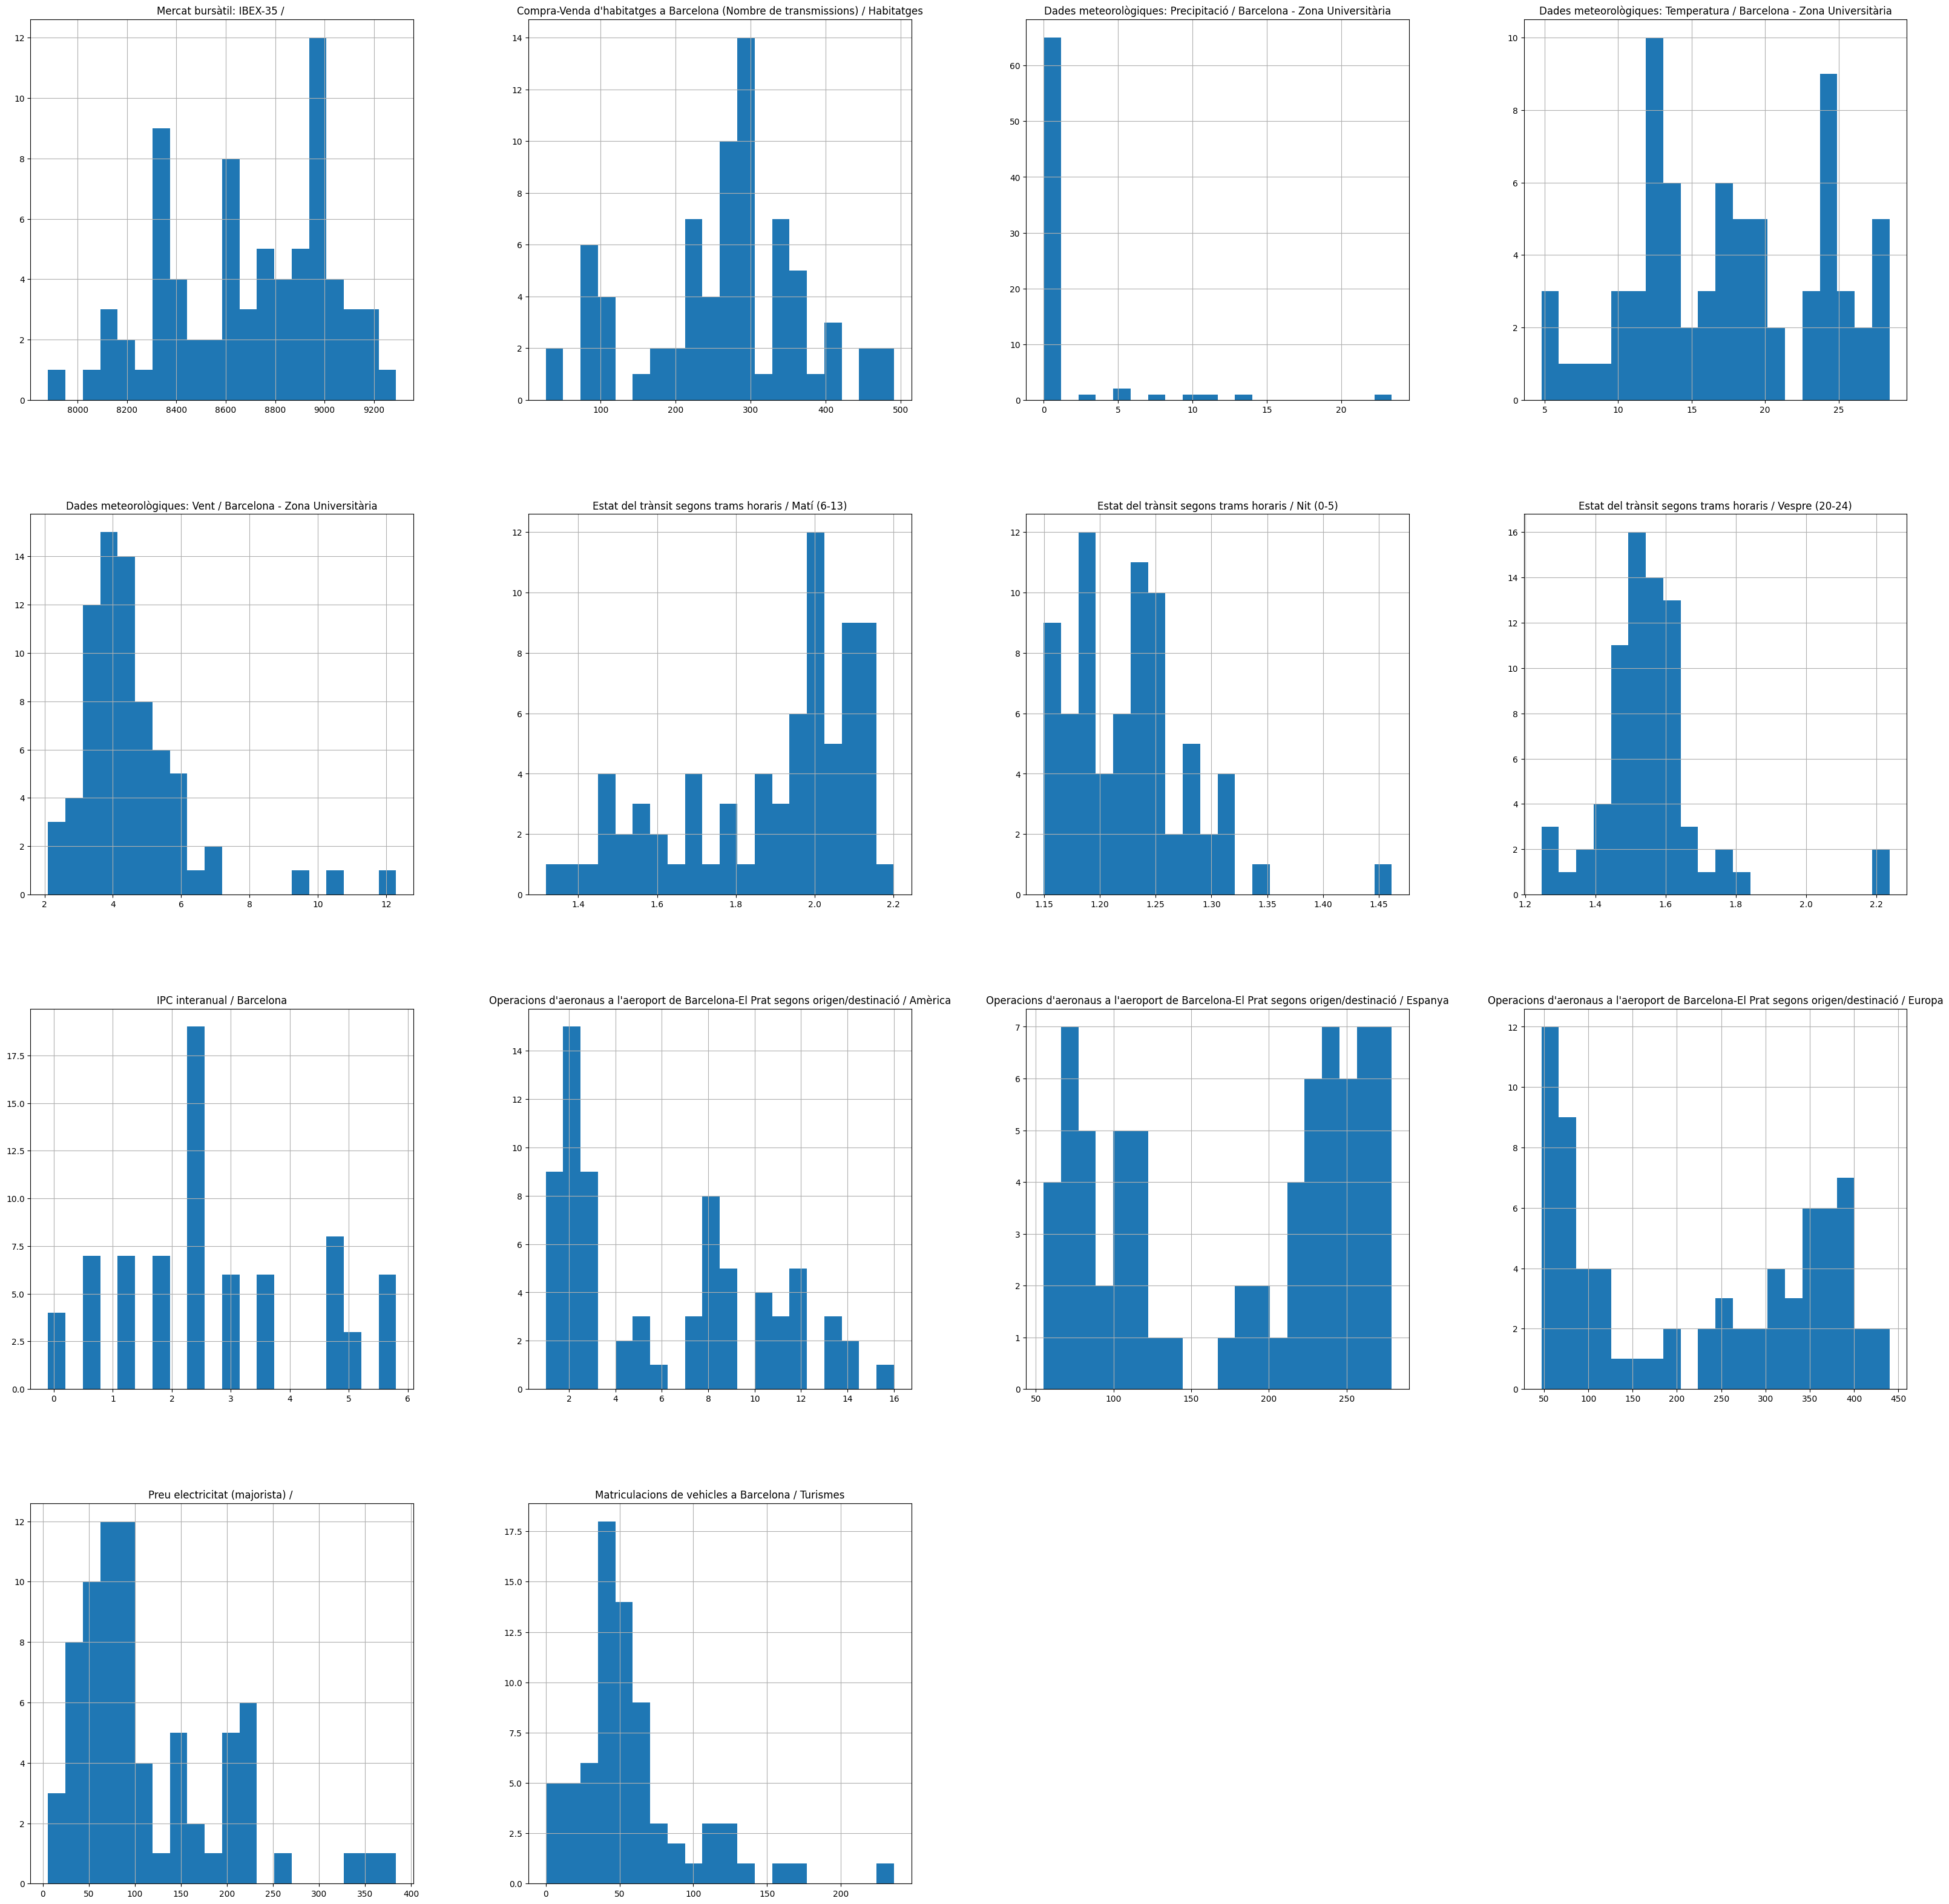

In [25]:
ibex_reduced_1 = ibex_test.copy()
ibex_reduced_1.shape
_=ibex_reduced_1.hist(bins = 20, figsize=(40,40))


In [26]:
ibex_test_semiprocessed = ibex_reduced_1

ibex_test_semiprocessed.describe(include="all").T

count      mean      std  \
Mercat bursàtil: IBEX-35 /                           73.0  8695.233  328.043   
Compra-Venda d'habitatges a Barcelona (Nombre d...   73.0   265.699  105.487   
Dades meteorològiques: Precipitació / Barcelona...   73.0     1.099    3.636   
Dades meteorològiques: Temperatura / Barcelona ...   73.0    17.550    6.299   
Dades meteorològiques: Vent / Barcelona - Zona ...   73.0     4.531    1.687   
Estat del trànsit segons trams horaris / Matí (...   73.0     1.886    0.228   
Estat del trànsit segons trams horaris / Nit (0-5)   73.0     1.226    0.055   
Estat del trànsit segons trams horaris / Vespre...   73.0     1.555    0.157   
IPC interanual / Barcelona                           73.0     2.690    1.689   
Operacions d'aeronaus a l'aeroport de Barcelona...   73.0     6.041    4.299   
Operacions d'aeronaus a l'aeroport de Barcelona...   73.0   178.205   78.287   
Operacions d'aeronaus a l'aeroport de Barcelona...   73.0   224.671  136.131   
Preu electricitat (majorista) /                      73.0   114.325   81.015   
Matriculacions de vehicles a Barcelona / Turismes    73.0    58.562   41.442   

                                                         min       25%  \
Mercat bursàtil: IBEX-35 /                          7879.600  8429.100   
Compra-Venda d'habitatges a Barcelona (Nombre d...    27.000   226.000   
Dades meteorològiques: Precipitació / Barcelona...     0.000     0.000   
Dades meteorològiques: Temperatura / Barcelona ...     4.770    12.710   
Dades meteorològiques: Vent / Barcelona - Zona ...     2.100     3.410   
Estat del trànsit segons trams horaris / Matí (...     1.317     1.712   
Estat del trànsit segons trams horaris / Nit (0-5)     1.150     1.185   
Estat del trànsit segons trams horaris / Vespre...     1.246     1.486   
IPC interanual / Barcelona                            -0.100     1.800   
Operacions d'aeronaus a l'aeroport de Barcelona...     1.000     2.000   
Operacions d'aeronaus a l'aeroport de Barcelona...    55.000   100.000   
Operacions d'aeronaus a l'aeroport de Barcelona...    47.000    78.000   
Preu electricitat (majorista) /                        5.675    55.970   
Matriculacions de vehicles a Barcelona / Turismes      0.000    37.000   

                                                         50%       75%  \
Mercat bursàtil: IBEX-35 /                          8735.100  8991.300   
Compra-Venda d'habitatges a Barcelona (Nombre d...   276.000   337.000   
Dades meteorològiques: Precipitació / Barcelona...     0.000     0.100   
Dades meteorològiques: Temperatura / Barcelona ...    17.280    23.780   
Dades meteorològiques: Vent / Barcelona - Zona ...     4.270     4.950   
Estat del trànsit segons trams horaris / Matí (...     1.974     2.070   
Estat del trànsit segons trams horaris / Nit (0-5)     1.225     1.252   
Estat del trànsit segons trams horaris / Vespre...     1.543     1.608   
IPC interanual / Barcelona                             2.300     3.500   
Operacions d'aeronaus a l'aeroport de Barcelona...     5.000     9.000   
Operacions d'aeronaus a l'aeroport de Barcelona...   216.000   247.000   
Operacions d'aeronaus a l'aeroport de Barcelona...   251.000   352.000   
Preu electricitat (majorista) /                       88.926   156.748   
Matriculacions de vehicles a Barcelona / Turismes     50.000    68.000   

                                                         max  
Mercat bursàtil: IBEX-35 /                          9289.900  
Compra-Venda d'habitatges a Barcelona (Nombre d...   491.000  
Dades meteorològiques: Precipitació / Barcelona...    23.400  
Dades meteorològiques: Temperatura / Barcelona ...    28.470  
Dades meteorològiques: Vent / Barcelona - Zona ...    12.290  
Estat del trànsit segons trams horaris / Matí (...     2.201  
Estat del trànsit segons trams horaris / Nit (0-5)     1.461  
Estat del trànsit segons trams horaris / Vespre...     2.238  
IPC interanual / Barcelona                             5.800  

In [27]:
columna = ibex_test_semiprocessed.iloc[:,1].copy()
columna = stats.zscore(columna)
ibex_test_semiprocessed.iloc[:,1]= columna
ibex_test_semiprocessed.iloc[:,1].describe(include="all").T

count    7.300e+01
mean    -6.388e-17
std      1.007e+00
min     -2.278e+00
25%     -3.789e-01
50%      9.833e-02
75%      6.806e-01
max      2.151e+00
Name: Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges, dtype: float64

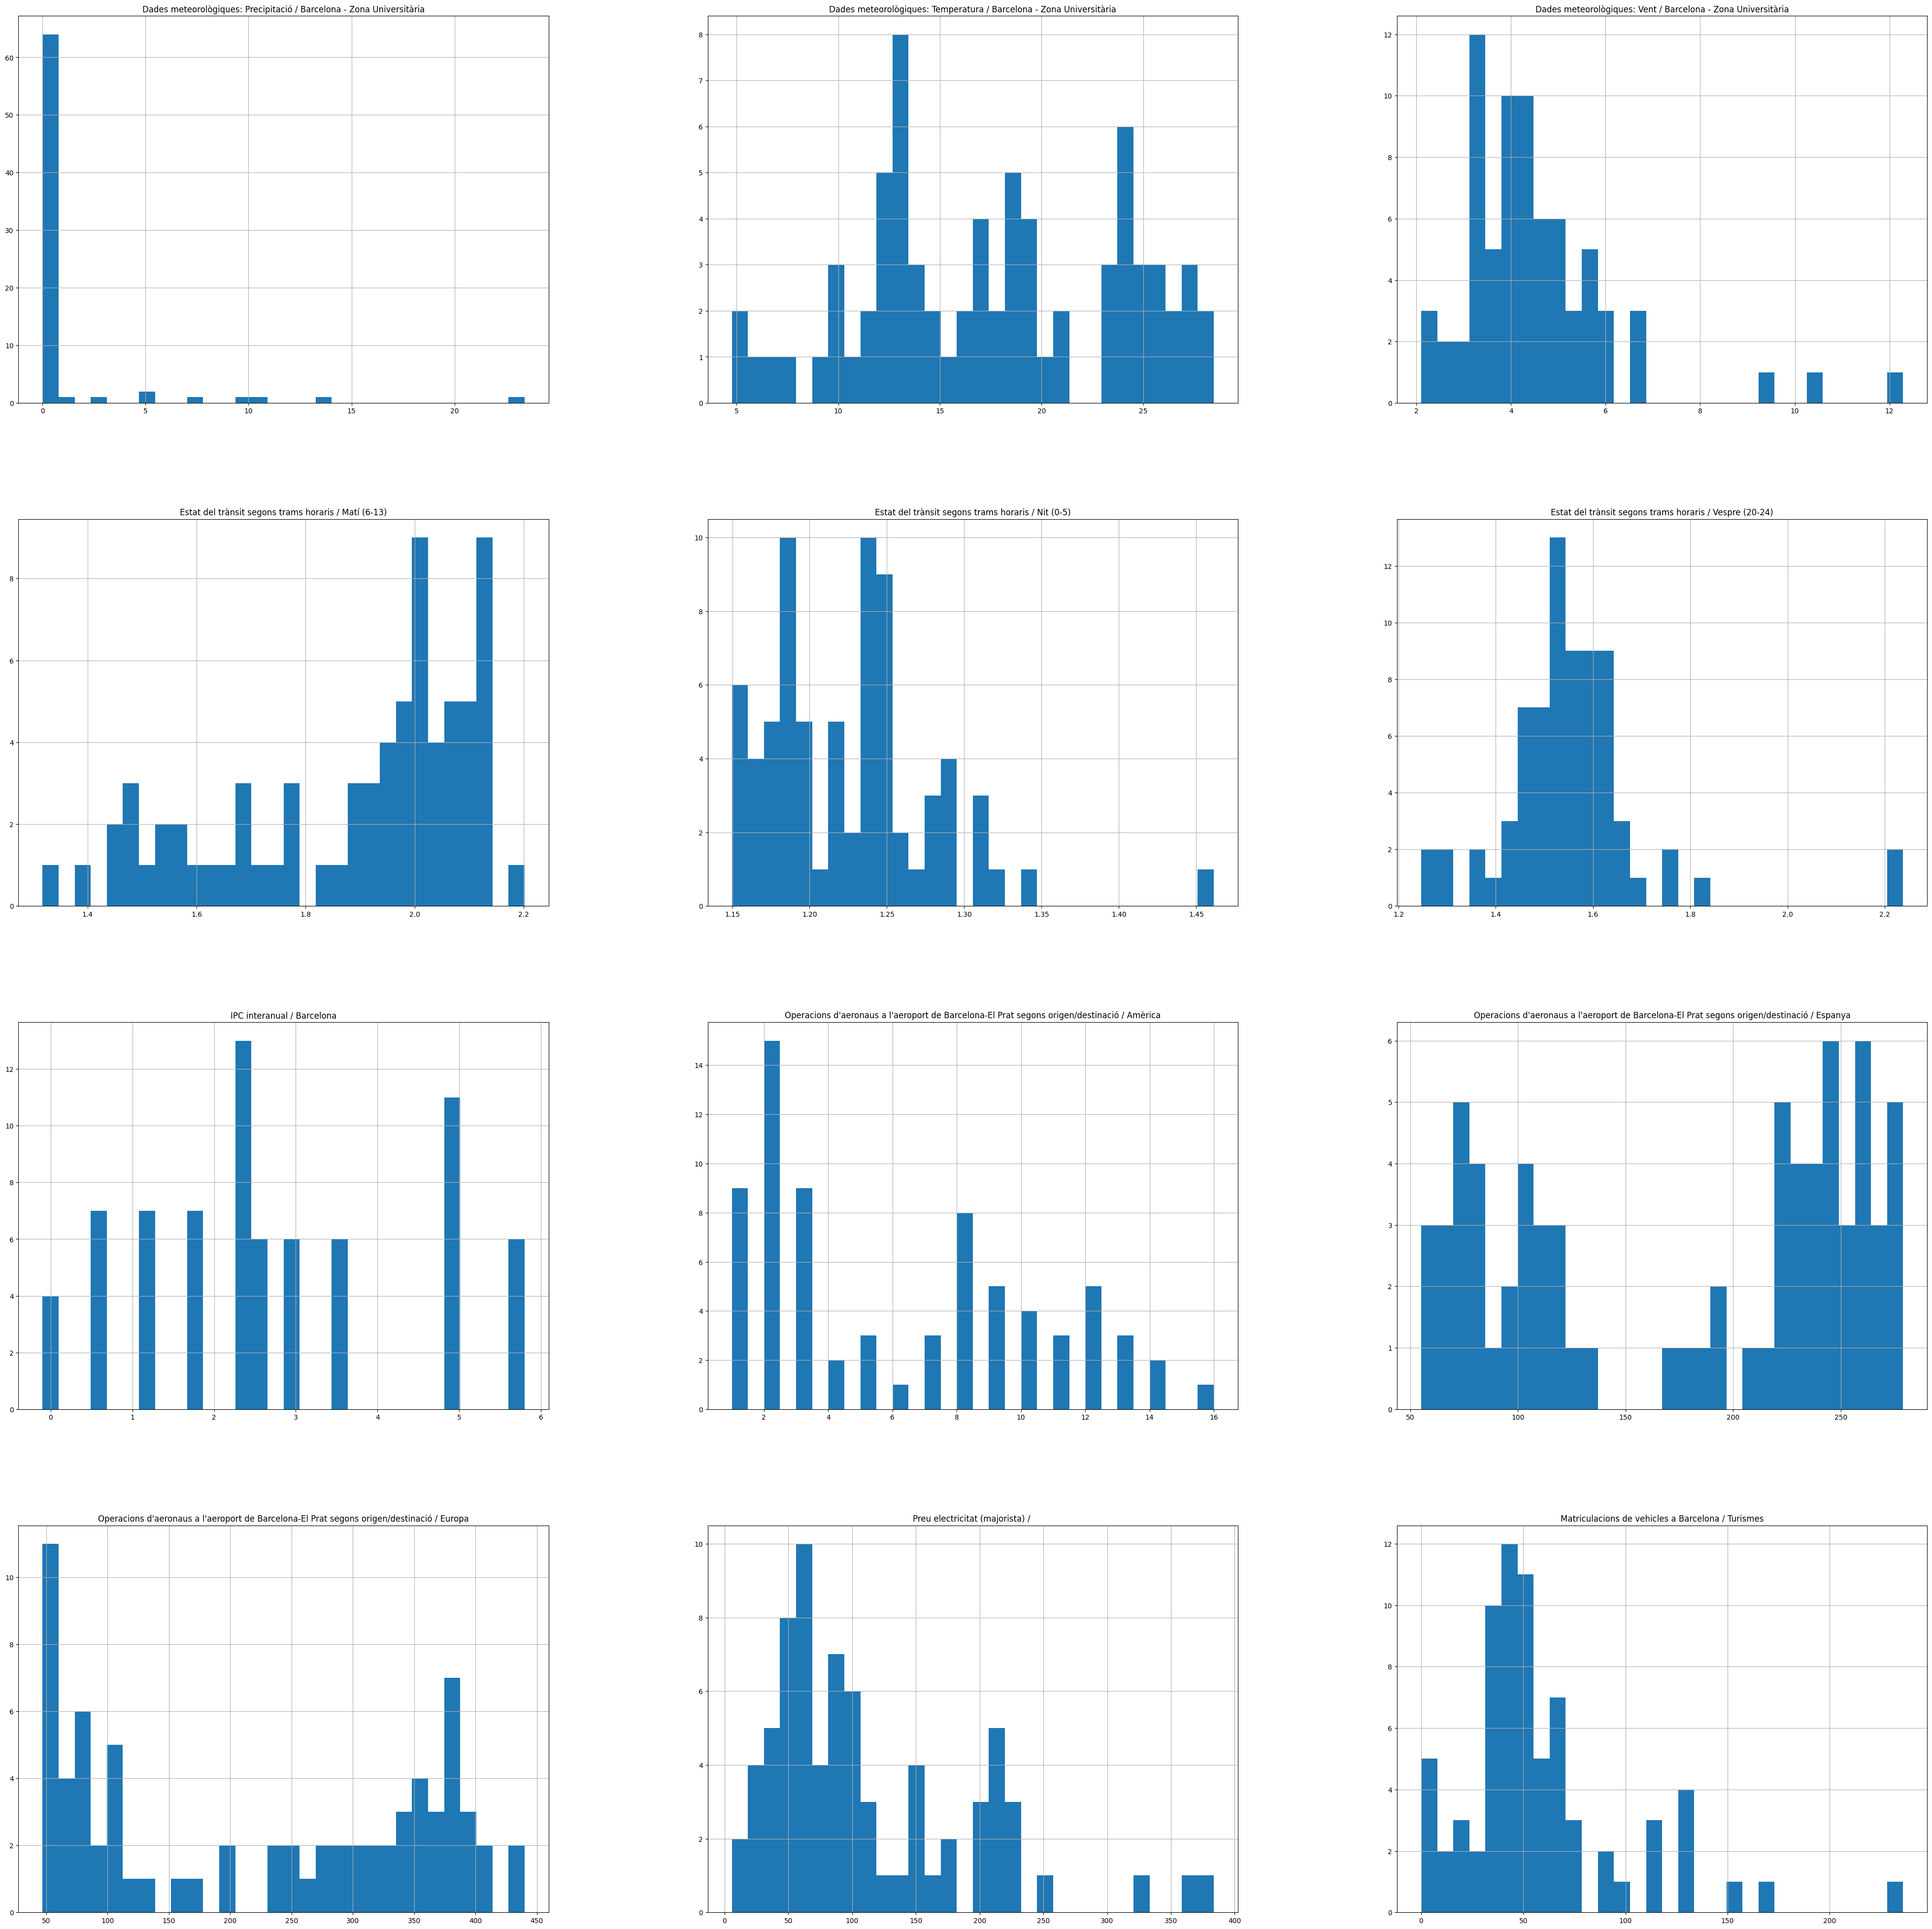

In [28]:
column_data = ibex_test_semiprocessed.iloc[:,2:]
_=column_data.hist(figsize=(50,50), bins=30)

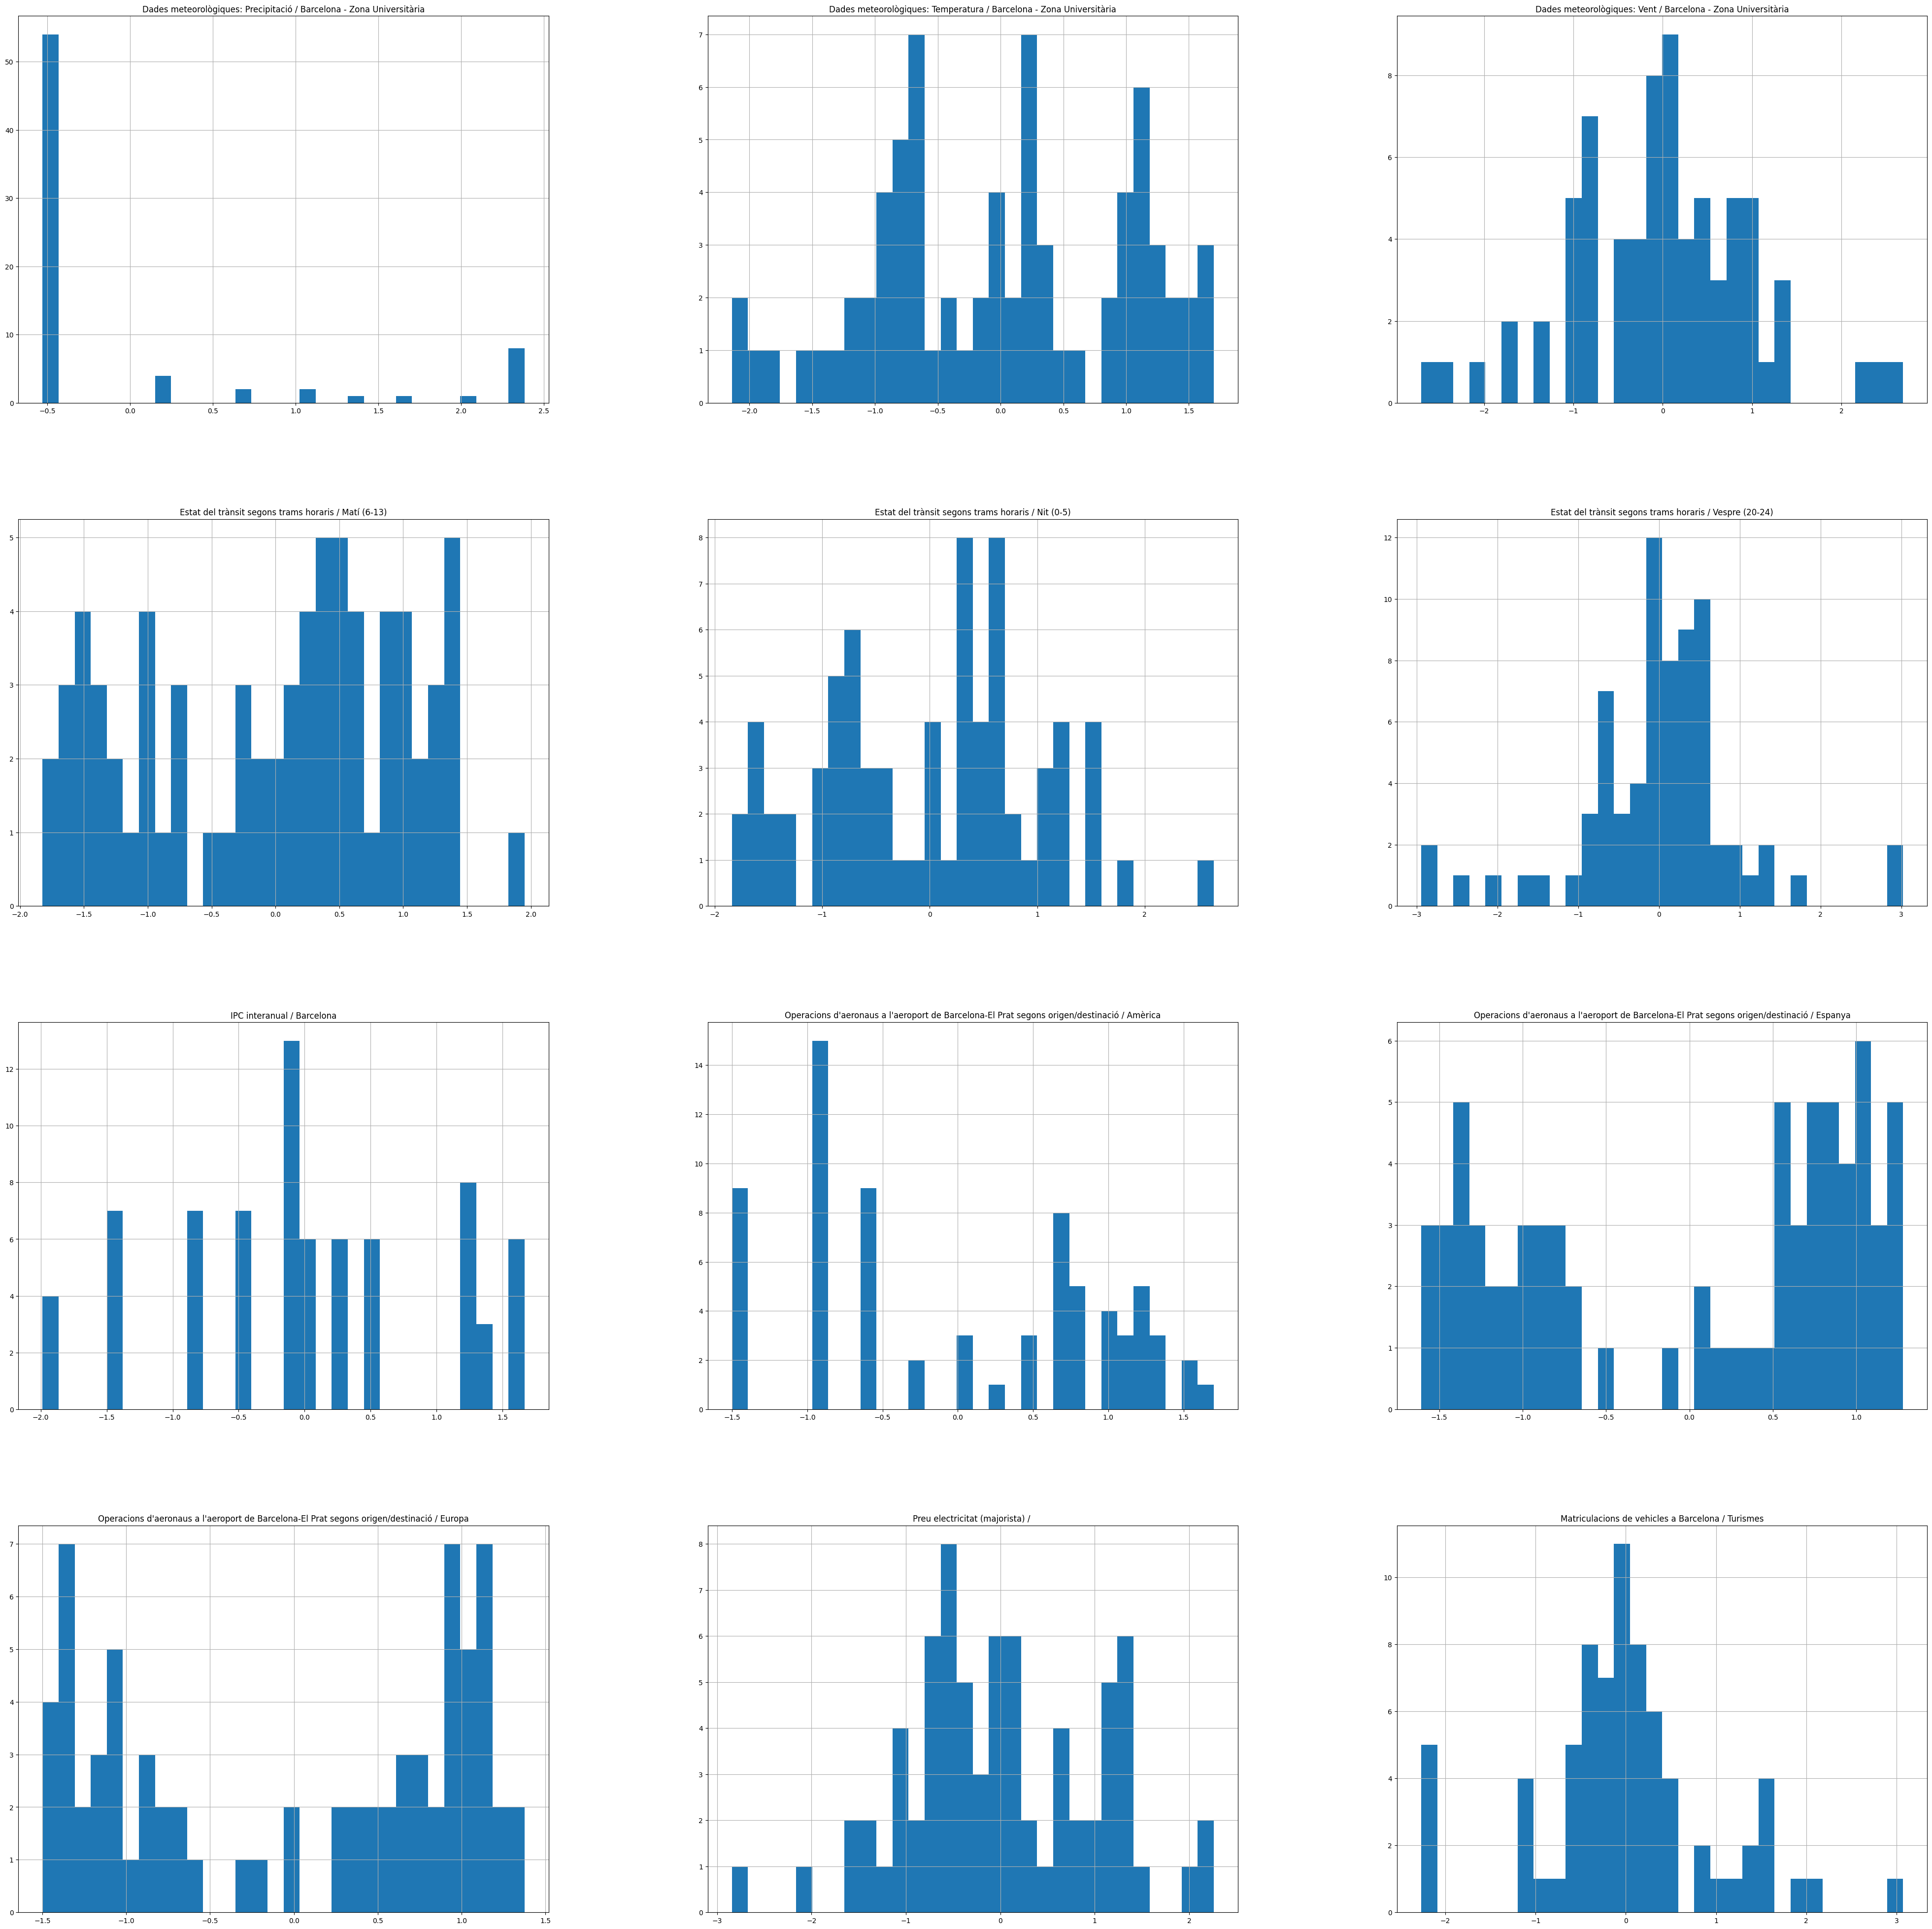

In [29]:
yj_power = PowerTransformer(method='yeo-johnson')

ibex_test_semiprocessed_2 = column_data.copy()
ibex_test_semiprocessed_2.iloc[:,:] = yj_power.fit_transform(ibex_test_semiprocessed_2.iloc[:,:])
_=ibex_test_semiprocessed_2.hist(figsize=(50,50), bins=30)

In [30]:
ibex_test_processed = ibex_test_semiprocessed.copy()
ibex_test_processed.iloc[:,2:] = ibex_test_semiprocessed_2

In [31]:
# si quieres guardar los datos en un csv desmarca
# ibex_training_processed.to_csv("ibex_training_processed.csv")
# ibex_test_processed.to_csv("ibex_test_processed.csv")

# Reducción de dimensionalidad

A continuación haremos todo el proceso de eliminación de dimensionalidad. A su vez iremos observando como se relacionan las variables y posibles redundancias.

A continuación importaremos todos los modulos necesarios y configuraremos el entorno para esta parte.

In [32]:
from sklearn import set_config
import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Seguidamente para saber como se relacionan las diferentes variables con la variable respuesta.

'Mercat bursàtil: IBEX-35 / '

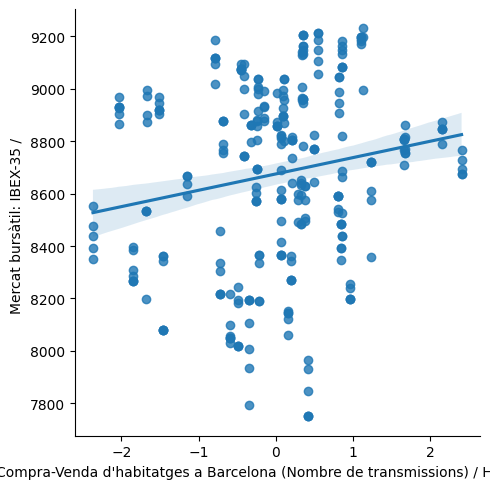

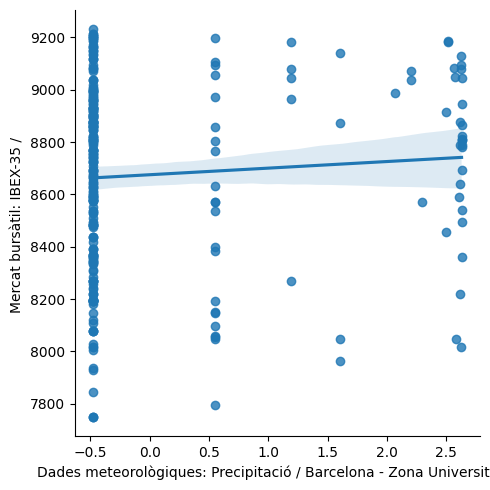

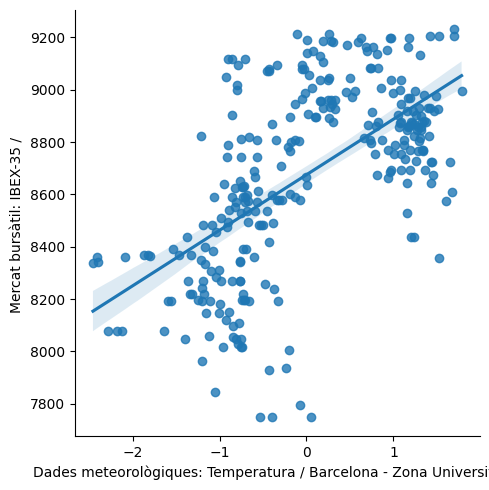

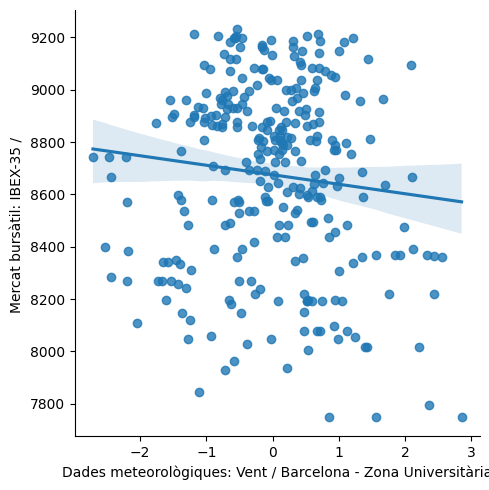

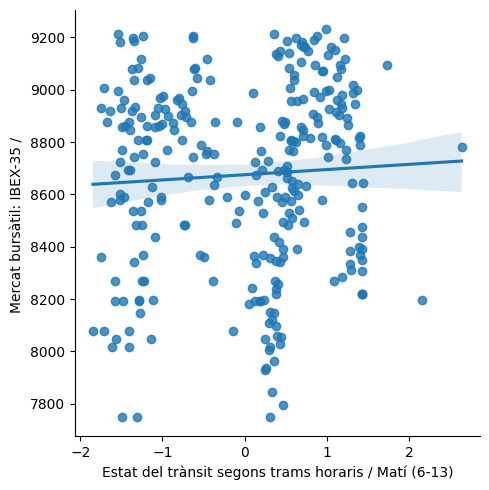

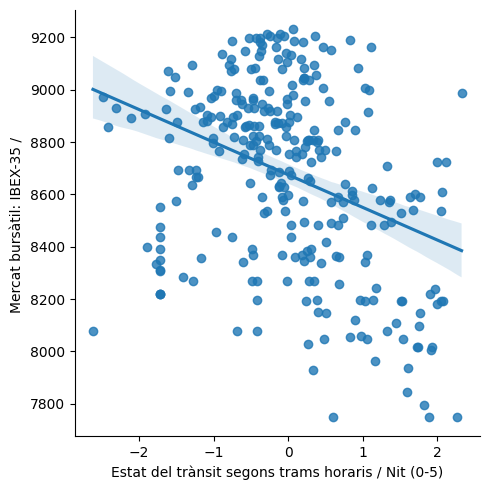

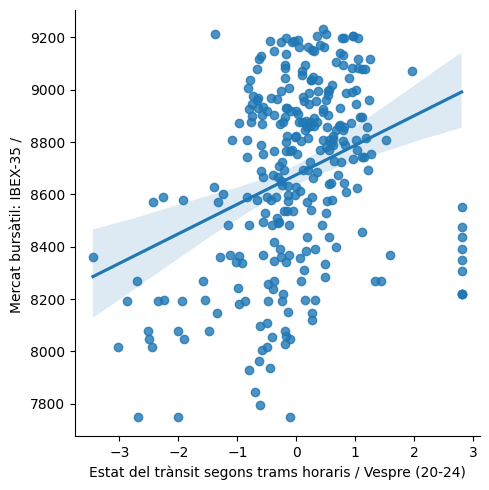

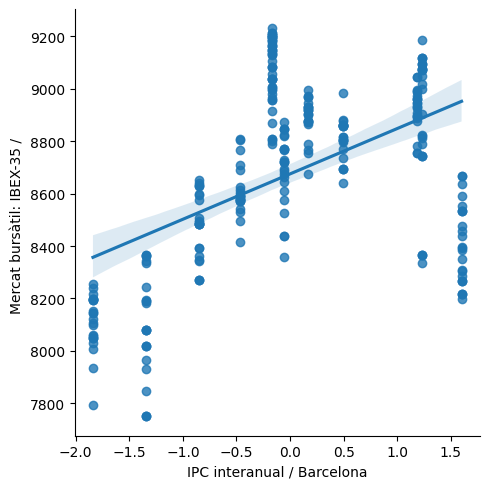

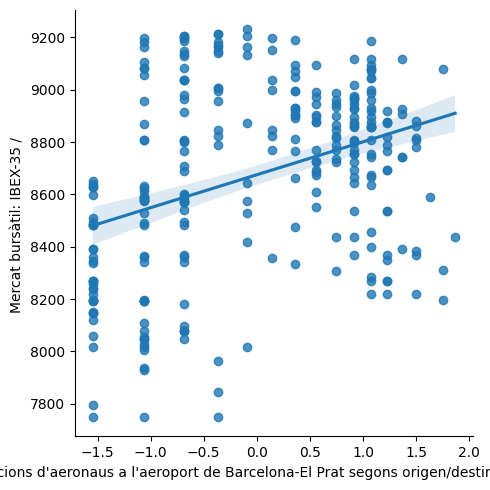

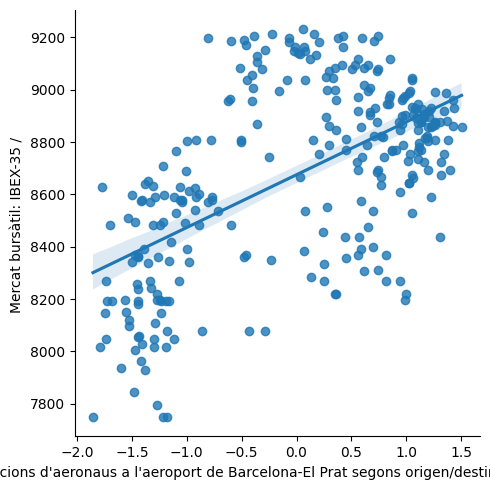

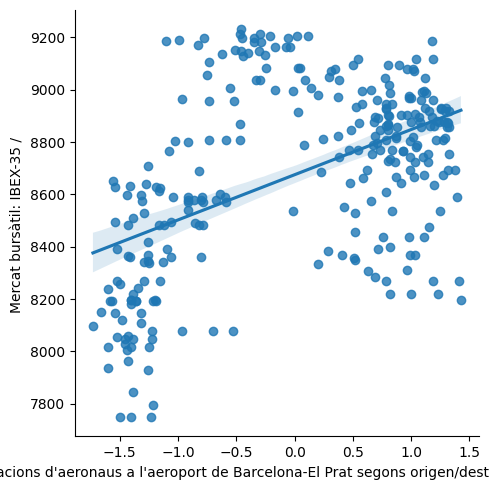

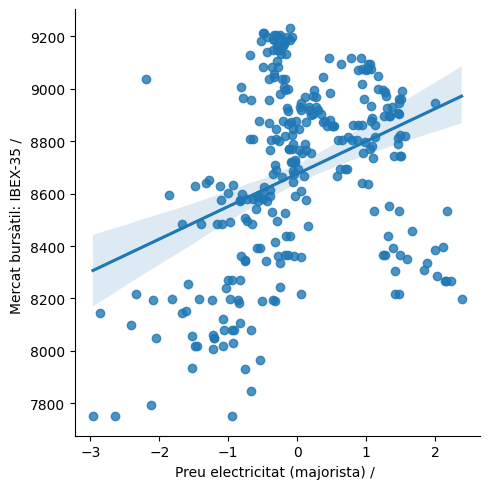

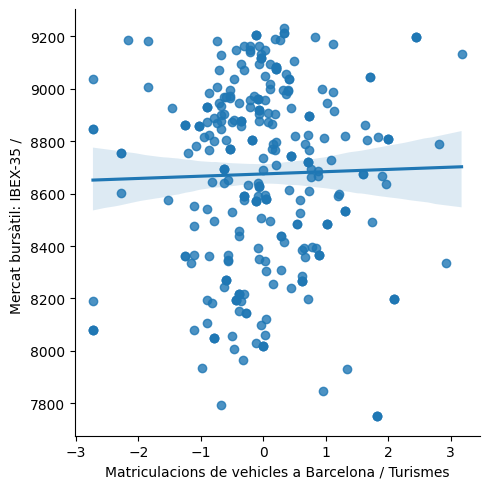

In [33]:
variable_respuesta = list(ibex_training_processed.columns)[0]
variable_respuesta
lista = list(ibex_training_processed.loc[:, ibex_training_processed.columns != variable_respuesta].columns)
for r in lista:
    _=sns.lmplot(
        data=ibex_training_processed,  x=r, y=variable_respuesta
    );

A primera vemos, que la gran mayoría de variables al estar distribuidas de forma "aleatoria" y no tener un patrón respecto a la variable respuesta. Esto nos da a entender que las variables son independientes con esta. 
Aun así, si que en ciertas variables(por ejemplo *IPC interanual*) que llegamos ciertas tendencias de los datos, sobretodo de manera lineal. Aunque hay una gráfica (relacionada con las operaciones en el aeropuerto) donde la distribución de puntos es de manera parabólica.




A continuación haremos uso del PCA para comprender las posibles relaciones entre las variables y la variable respuesta. Para esto primero estandarizaremos los datos.

In [34]:
ibex_training_standarized = ibex_training_processed.copy()
data_columns = list(ibex_training_processed.columns)
_  = data_columns.pop(0)
ibex_training_standarized[data_columns] = StandardScaler().fit_transform(ibex_training_standarized[data_columns])
ibex_training_standarized.describe().T

count       mean      std  \
Mercat bursàtil: IBEX-35 /                          292.0  8.675e+03  352.636   
Compra-Venda d'habitatges a Barcelona (Nombre d...  292.0  0.000e+00    1.002   
Dades meteorològiques: Precipitació / Barcelona...  292.0  2.433e-17    1.002   
Dades meteorològiques: Temperatura / Barcelona ...  292.0  0.000e+00    1.002   
Dades meteorològiques: Vent / Barcelona - Zona ...  292.0  6.083e-18    1.002   
Estat del trànsit segons trams horaris / Matí (...  292.0  6.083e-18    1.002   
Estat del trànsit segons trams horaris / Nit (0-5)  292.0  1.217e-17    1.002   
Estat del trànsit segons trams horaris / Vespre...  292.0  1.331e-18    1.002   
IPC interanual / Barcelona                          292.0  3.650e-17    1.002   
Operacions d'aeronaus a l'aeroport de Barcelona...  292.0 -2.433e-17    1.002   
Operacions d'aeronaus a l'aeroport de Barcelona...  292.0  4.867e-17    1.002   
Operacions d'aeronaus a l'aeroport de Barcelona...  292.0  3.650e-17    1.002   
Preu electricitat (majorista) /                     292.0 -6.083e-18    1.002   
Matriculacions de vehicles a Barcelona / Turismes   292.0 -4.867e-17    1.002   

                                                         min       25%  \
Mercat bursàtil: IBEX-35 /                          7750.200  8392.700   
Compra-Venda d'habitatges a Barcelona (Nombre d...    -2.366    -0.485   
Dades meteorològiques: Precipitació / Barcelona...    -0.477    -0.477   
Dades meteorològiques: Temperatura / Barcelona ...    -2.456    -0.773   
Dades meteorològiques: Vent / Barcelona - Zona ...    -2.711    -0.639   
Estat del trànsit segons trams horaris / Matí (...    -1.846    -1.037   
Estat del trànsit segons trams horaris / Nit (0-5)    -2.621    -0.583   
Estat del trànsit segons trams horaris / Vespre...    -3.450    -0.493   
IPC interanual / Barcelona                            -1.839    -0.464   
Operacions d'aeronaus a l'aeroport de Barcelona...    -1.547    -1.062   
Operacions d'aeronaus a l'aeroport de Barcelona...    -1.856    -1.051   
Operacions d'aeronaus a l'aeroport de Barcelona...    -1.731    -1.047   
Preu electricitat (majorista) /                       -2.964    -0.577   
Matriculacions de vehicles a Barcelona / Turismes     -2.727    -0.600   

                                                         50%       75%  \
Mercat bursàtil: IBEX-35 /                          8753.300  8944.925   
Compra-Venda d'habitatges a Barcelona (Nombre d...     0.080     0.542   
Dades meteorològiques: Precipitació / Barcelona...    -0.477    -0.477   
Dades meteorològiques: Temperatura / Barcelona ...    -0.080     1.009   
Dades meteorològiques: Vent / Barcelona - Zona ...     0.037     0.632   
Estat del trànsit segons trams horaris / Matí (...     0.311     0.725   
Estat del trànsit segons trams horaris / Nit (0-5)    -0.024     0.578   
Estat del trànsit segons trams horaris / Vespre...     0.006     0.550   
IPC interanual / Barcelona                            -0.051     1.185   
Operacions d'aeronaus a l'aeroport de Barcelona...     0.145     0.914   
Operacions d'aeronaus a l'aeroport de Barcelona...     0.268     0.936   
Operacions d'aeronaus a l'aeroport de Barcelona...     0.265     0.920   
Preu electricitat (majorista) /                       -0.137     0.801   
Matriculacions de vehicles a Barcelona / Turismes     -0.062     0.546   

                                                         max  
Mercat bursàtil: IBEX-35 /                          9230.300  
Compra-Venda d'habitatges a Barcelona (Nombre d...     2.402  
Dades meteorològiques: Precipitació / Barcelona...     2.630  
Dades meteorològiques: Temperatura / Barcelona ...     1.784  
Dades meteorològiques: Vent / Barcelona - Zona ...     2.853  
Estat del trànsit segons trams horaris / Matí (...     2.639  
Estat del trànsit segons trams horaris / Nit (0-5)     2.331  
Estat del trànsit segons trams horaris / Vespre...     2.803  
IPC interanual / Barcelona                     

Vemos que todas las variables han sido estandarizadas (no son exactamente con media 0 y std 1 debido a los errores de precisión de la coma flotante, pero el error es muy pequeño que puede ser negligible).


In [35]:
myPCA = PCA().fit(ibex_training_standarized[data_columns])


Para poder ver la importancia de cada variable para poder explicar la variancia. Haremos un grafica donde se vean los Eigenvalues.


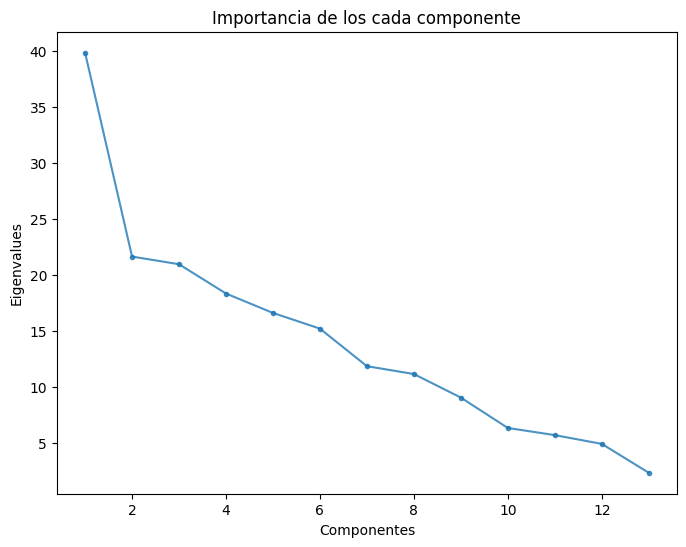

In [36]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Importancia de los cada componente');

Podemos ver que el PCA ha dado como importancia de forma hiperbolica (tiene menos importancia las a medida que vas hacia las últimas columnas).

Vemos que la variable que le ha dado más importancia es la *compra/venta de viviendas en barcelona*, cosa que podemos ver cierta relación. El ibex intenta explicar el estado de la bolsa española y el estado del país. Si cada vez hay más gente que puede comprar viviendas significa que la gente puede llegar a tener cierto poder adquisitivo que es beneficioso para economia española.

De forma contraria, la variable que menos ayuda a la variabilidad de los datos, es el *numero de matriculaciones en barcelona*. A continuación veremos cual es la importancia de cada componente para explicar las varianza. 

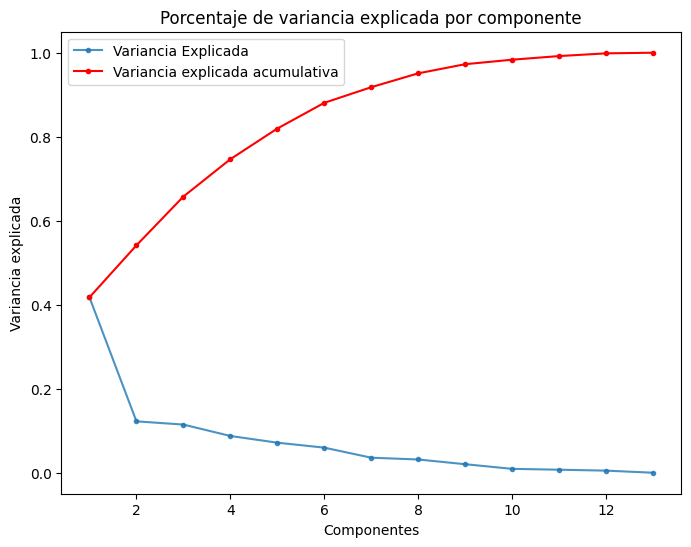

In [37]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

Podemos ver que cerca del 40% de la varianza está explicada por la primera componente. Y lo más importante, el 90% de la varianza se puede explicar con la mitad de variables que tenemos ahora. Lo que supone una gran mejora para el modelo puede ser explicado de forma notoria con la mitad de variables

A continuación podemos ver los pesos que le ha dado cada componente a cada variable.

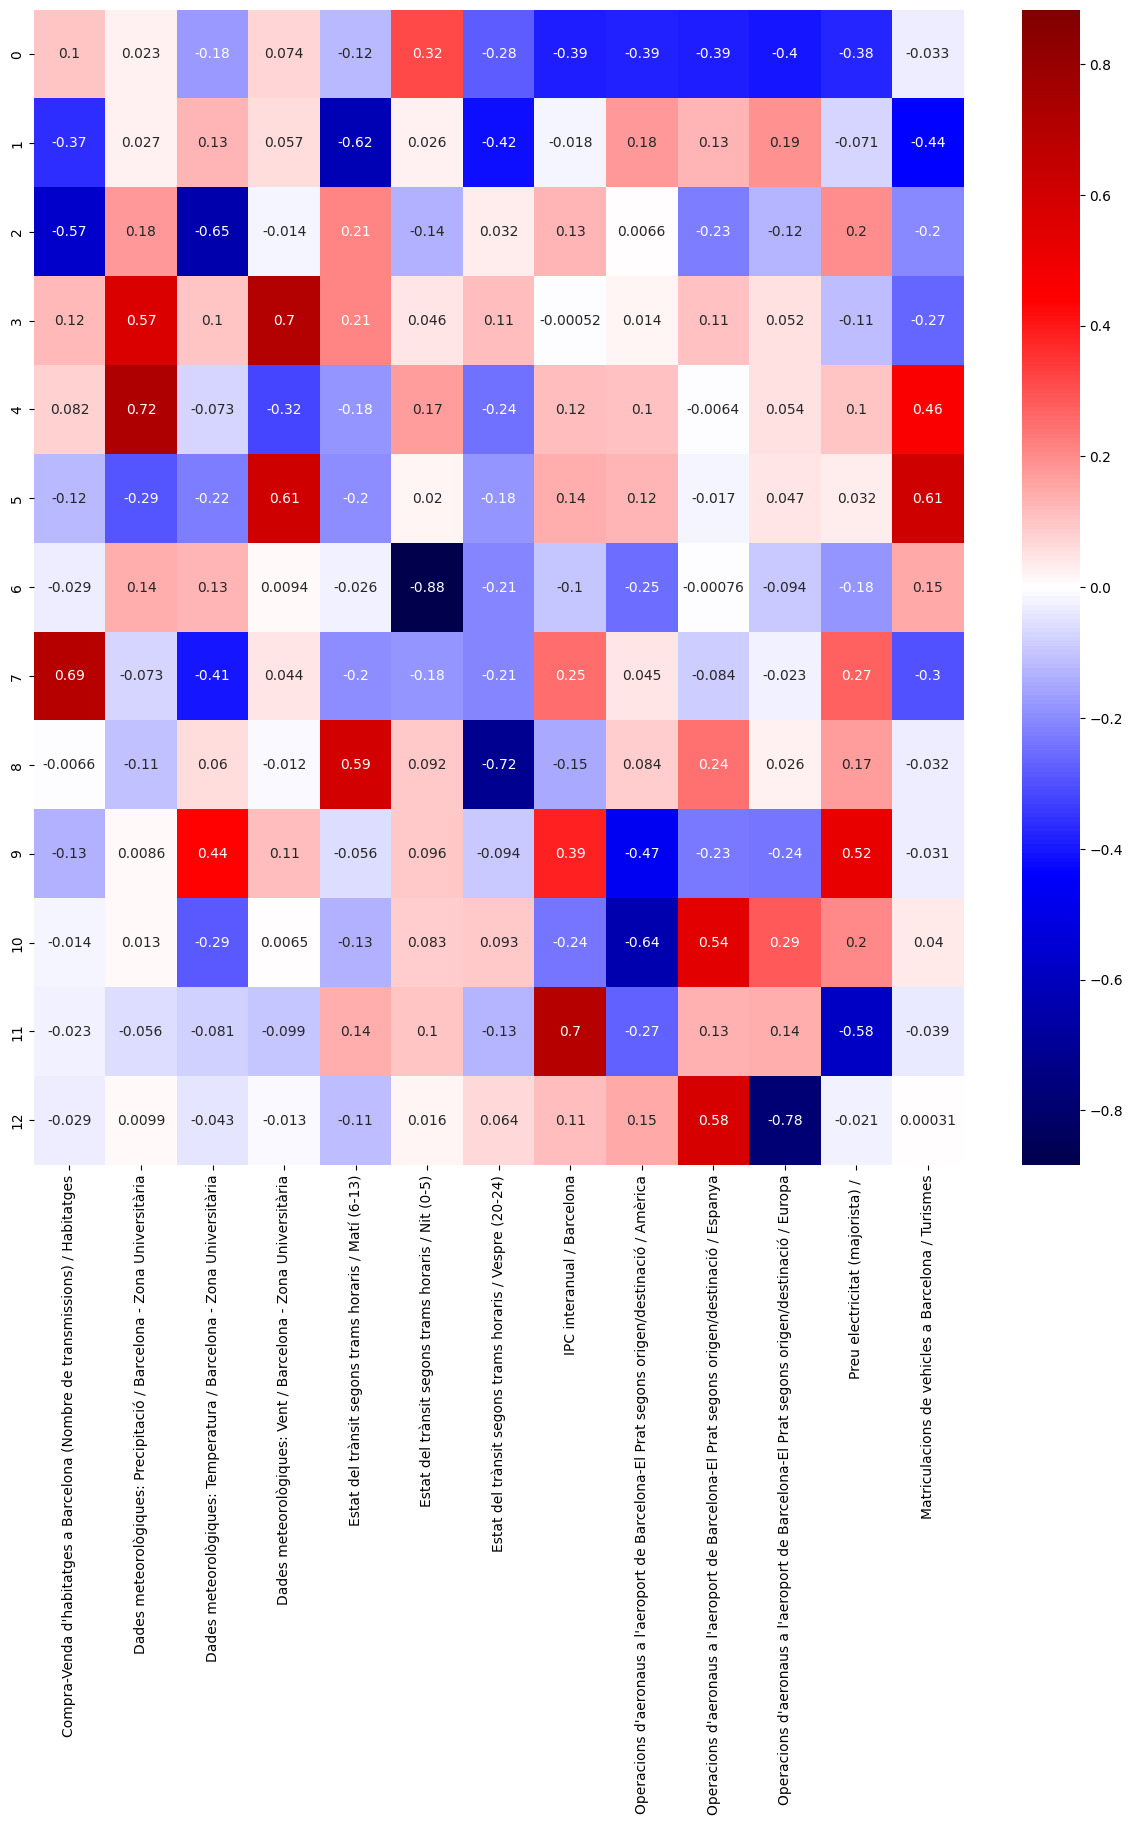

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(myPCA.components_, cmap='seismic', 
            xticklabels=list(ibex_training_processed.columns[1:]),
            vmin=-np.max(np.abs(myPCA.components_)),
            vmax=np.max(np.abs(myPCA.components_)),
            annot=True, ax=ax);

Podemos ver que la gran mayoria de las componentes han dado pesos que están entre [-0,2 - 0,2]. Lo cual ya nos hace ver que aquí tenemos variables inecesarias.

A continuación veremos la visualización de nuestros datos respecto a la variable objetivo

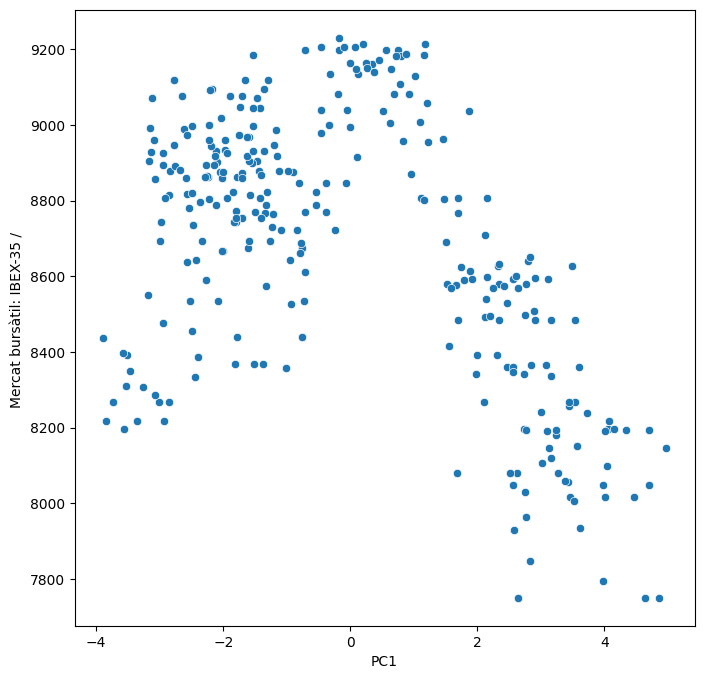

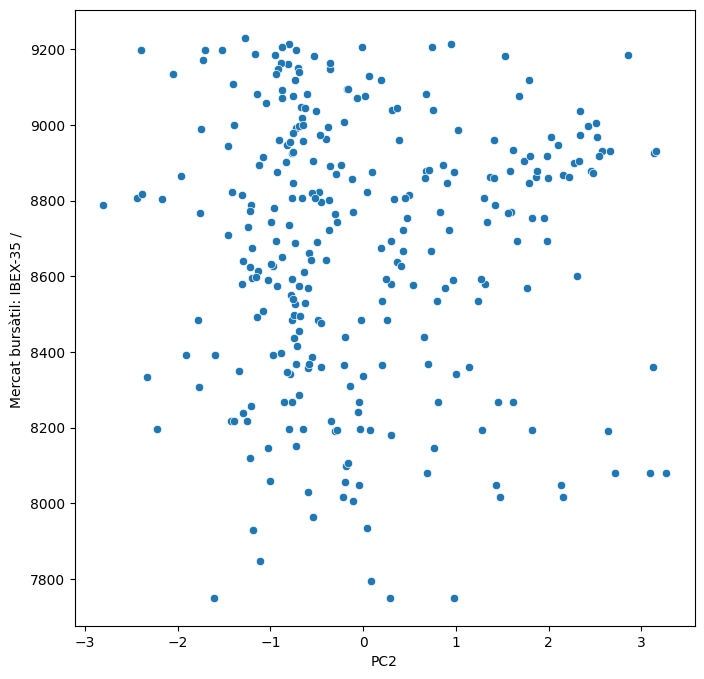

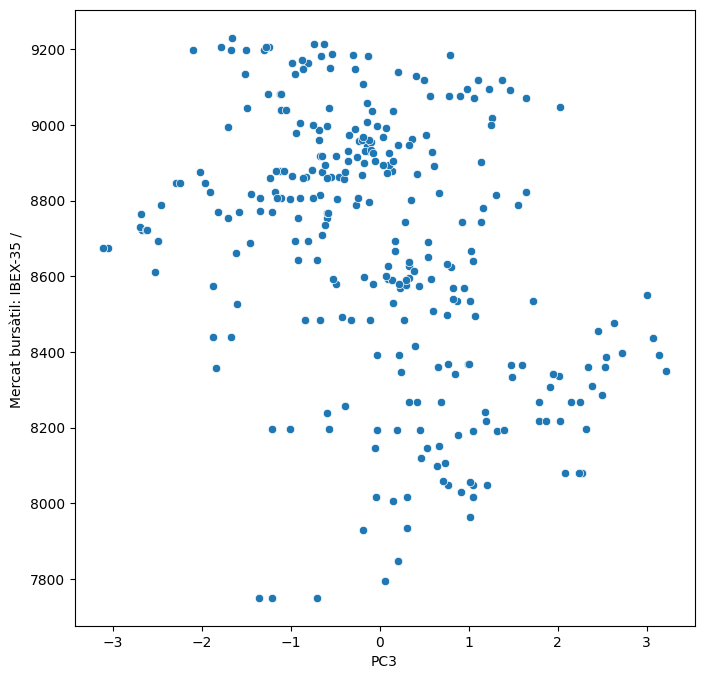

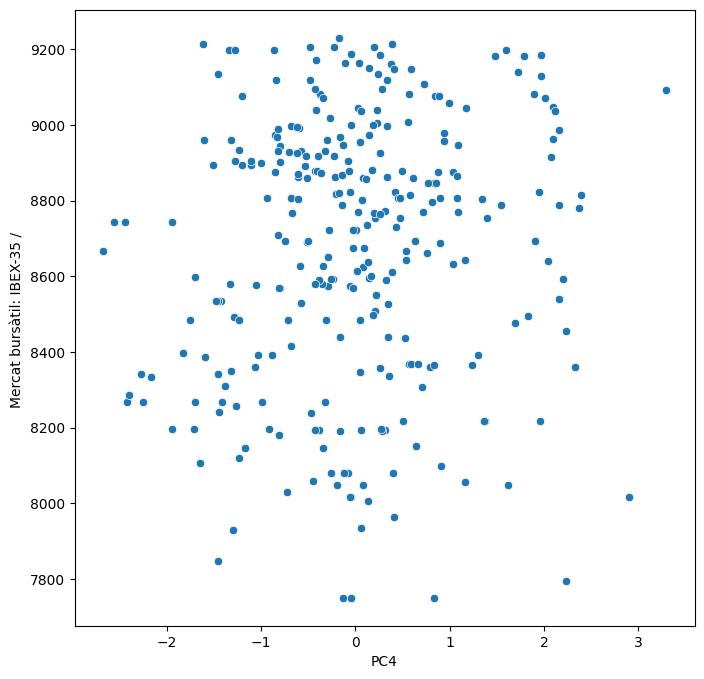

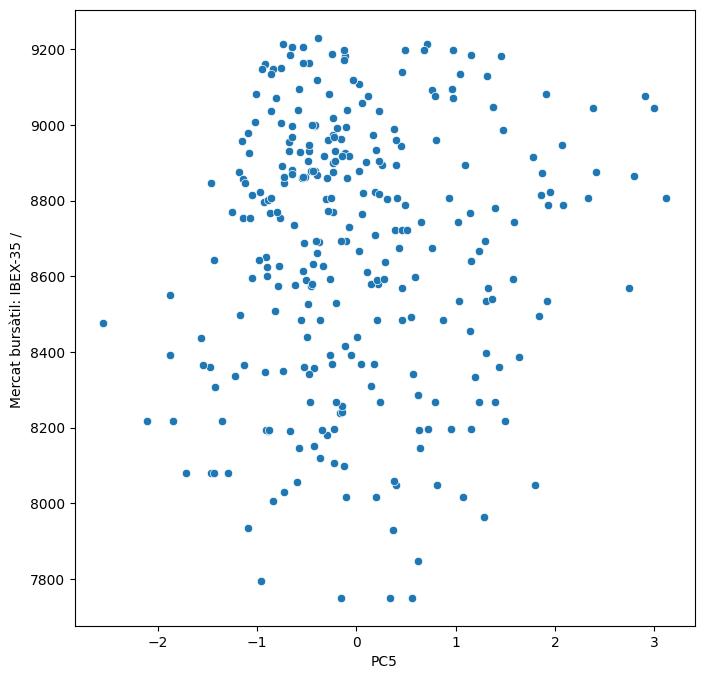

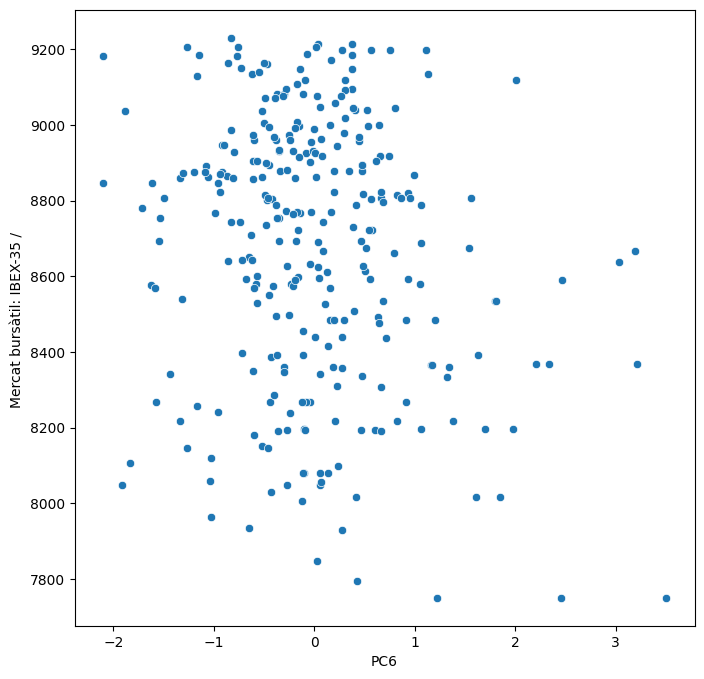

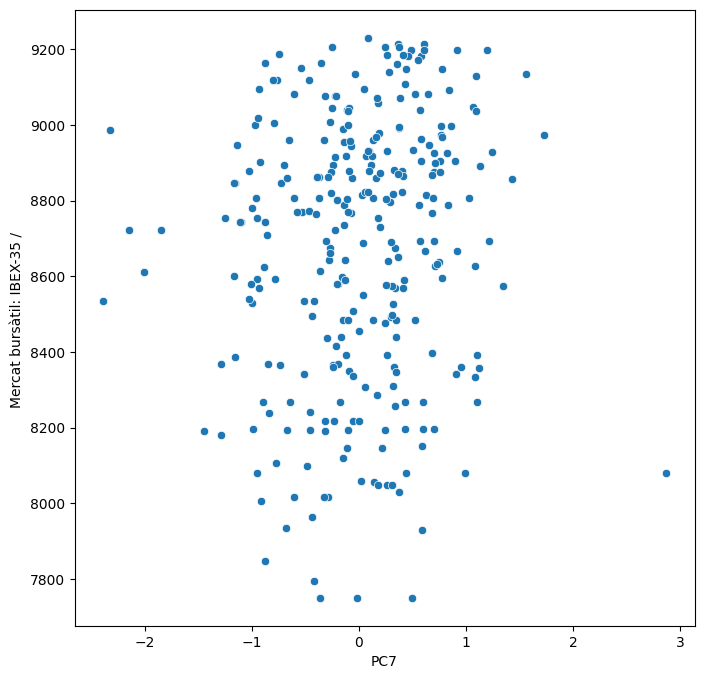

In [39]:
lname = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13"]

transformed_ibex_training = myPCA.transform(ibex_training_standarized[data_columns])
ibex_training_standarized[lname] = transformed_ibex_training
lname2 = lname[0:7]
for componente in lname2:
    fig = plt.figure(figsize=(8,8))
    _ = sns.scatterplot(x=componente, y='Mercat bursàtil: IBEX-35 / ',  data=ibex_training_standarized)

En el apartado b del problema se nos hace esta pregunta:
*Crees que puede haber una relación entre
las variables del conjunto de datos y la variable objetivo? ¿Por qué?*

Viendo las mapas de distribución de las primeras 7 componentes (estas comprenden el 90% de la varianza de los datos) respecto a la variable objetivo. Podemos ver que no todas las componentes se llega a observar algún tipo de relación, como puede ser las componentes *PC2*,*PC4* y *PC5*.
Pero si que llegamos a ver otras que si que pueden dar indicios de tener alguna relación.
El ejemplo más apreciable es el de la componente 1 (*PC1*) donde se ve que tiene  una relación en forma de parabola. Por lo tanto ya nos da a entender que no tienen una relación lineal.

A su vez, *PC7* llega a presentar una acumulación de datos en el centro de la gráfica en forma de una columna ligeramente inclinada. Esto podría ser indicio de una tendencia lineal pero es cuestionable debido a la dispersidad de los datos.

In [40]:


ibex_training_ready = ibex_training_processed.copy()
ibex_test_ready = ibex_test_processed.copy()

ibex_training_ready.rename(inplace=True, columns={"Mercat bursàtil: IBEX-35 / ": "Objetivo"})
ibex_test_ready.rename(inplace=True, columns={"Mercat bursàtil: IBEX-35 / ": "Objetivo"})

ibex_training_ready.head(5)
ibex_test_ready.head(5)

Objetivo  \
155    9082.3   
213    8754.6   
283    8877.5   
176    9038.0   
102    8529.3   

     Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges  \
155                                              0.851                              
213                                             -0.681                              
283                                             -0.156                              
176                                             -0.228                              
102                                              0.799                              

     Dades meteorològiques: Precipitació / Barcelona - Zona Universitària  \
155                                             -0.477                      
213                                             -0.477                      
283                                             -0.477                      
176                                             -0.477                      
102                                             -0.477                      

     Dades meteorològiques: Temperatura / Barcelona - Zona Universitària  \
155                                              0.733                     
213                                              1.089                     
283                                              0.303                     
176                                              1.086                     
102                                             -0.748                     

     Dades meteorològiques: Vent / Barcelona - Zona Universitària  \
155                                             -0.285              
213                                              0.103              
283                                             -0.533              
176                                              0.071              
102                                             -0.509              

     Estat del trànsit segons trams horaris / Matí (6-13)  \
155                                             -0.607      
213                                             -0.368      
283                                             -0.098      
176                                             -1.192      
102                                              0.221      

     Estat del trànsit segons trams horaris / Nit (0-5)  \
155                                              0.935    
213                                             -0.589    
283                                             -1.498    
176                                              0.281    
102                                              1.517    

     Estat del trànsit segons trams horaris / Vespre (20-24)  \
155                                              0.941         
213                                             -0.574         
283                                              0.347         
176                                              0.241         
102                                             -0.536         

     IPC interanual / Barcelona  \
155                      -0.166   
213                       0.171   
283                       1.185   
176                      -0.166   
102                      -0.464   

     Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica  \
155                                             -1.062                                            
213                                              0.914                                            
283                                              1.223                                            
176                                              0.145                                            
102                                             -1.062                                            

     Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya  \
155                                         

Objetivo  \
93     8601.0   
164    9289.9   
20     8126.9   
187    8823.0   
66     8447.5   

     Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges  \
93                                               0.184                              
164                                              0.967                              
20                                              -0.532                              
187                                              0.375                              
66                                               0.270                              

     Dades meteorològiques: Precipitació / Barcelona - Zona Universitària  \
93                                              -0.530                      
164                                             -0.530                      
20                                              -0.530                      
187                                             -0.530                      
66                                               1.703                      

     Dades meteorològiques: Temperatura / Barcelona - Zona Universitària  \
93                                              -0.404                     
164                                              1.679                     
20                                              -0.769                     
187                                              1.096                     
66                                              -0.905                     

     Dades meteorològiques: Vent / Barcelona - Zona Universitària  \
93                                              -0.946              
164                                              0.152              
20                                               0.503              
187                                              0.061              
66                                              -0.982              

     Estat del trànsit segons trams horaris / Matí (6-13)  \
93                                              -1.600      
164                                              0.668      
20                                              -0.024      
187                                              0.390      
66                                               0.478      

     Estat del trànsit segons trams horaris / Nit (0-5)  \
93                                               1.857    
164                                             -0.482    
20                                               1.243    
187                                              1.133    
66                                               0.142    

     Estat del trànsit segons trams horaris / Vespre (20-24)  \
93                                              -1.138         
164                                              0.069         
20                                              -0.558         
187                                              0.358         
66                                              -0.291         

     IPC interanual / Barcelona  \
93                       -0.444   
164                      -0.127   
20                       -1.411   
187                      -0.007   
66                       -0.858   

     Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica  \
93                                              -0.559                                            
164                                              0.032                                            
20                                              -1.502                                            
187                                              0.265                                            
66                                              -1.502                                            

     Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya  \
93                                          

## Regresión

A continuación haremos la configuración del entorno para hacer al experimentación

In [41]:
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from yellowbrick.regressor import AlphaSelection

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from scipy import stats
from yellowbrick.regressor import residuals_plot

A continuación haremos la separación de datos

In [42]:
y_training = ibex_training_ready["Objetivo"]
y_test = ibex_test_ready["Objetivo"]
x_training = ibex_training_ready.iloc[:,1:]
x_test = ibex_test_ready.iloc[:,1:]
x_training.head(5)
y_training


Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges  \
155                                              0.851                              
213                                             -0.681                              
283                                             -0.156                              
176                                             -0.228                              
102                                              0.799                              

     Dades meteorològiques: Precipitació / Barcelona - Zona Universitària  \
155                                             -0.477                      
213                                             -0.477                      
283                                             -0.477                      
176                                             -0.477                      
102                                             -0.477                      

     Dades meteorològiques: Temperatura / Barcelona - Zona Universitària  \
155                                              0.733                     
213                                              1.089                     
283                                              0.303                     
176                                              1.086                     
102                                             -0.748                     

     Dades meteorològiques: Vent / Barcelona - Zona Universitària  \
155                                             -0.285              
213                                              0.103              
283                                             -0.533              
176                                              0.071              
102                                             -0.509              

     Estat del trànsit segons trams horaris / Matí (6-13)  \
155                                             -0.607      
213                                             -0.368      
283                                             -0.098      
176                                             -1.192      
102                                              0.221      

     Estat del trànsit segons trams horaris / Nit (0-5)  \
155                                              0.935    
213                                             -0.589    
283                                             -1.498    
176                                              0.281    
102                                              1.517    

     Estat del trànsit segons trams horaris / Vespre (20-24)  \
155                                              0.941         
213                                             -0.574         
283                                              0.347         
176                                              0.241         
102                                             -0.536         

     IPC interanual / Barcelona  \
155                      -0.166   
213                       0.171   
283                       1.185   
176                      -0.166   
102                      -0.464   

     Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica  \
155                                             -1.062                                            
213                                              0.914                                            
283                                              1.223                                            
176                                              0.145                                            
102                                             -1.062                                            

     Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya  \
155                                             -0.516                                            
213                                             

155    9082.3
213    8754.6
283    8877.5
176    9038.0
102    8529.3
152    9161.8
231    8929.8
191    8770.3
340    8551.4
295    8895.0
197    8438.9
327    8788.4
19     8181.4
243    8985.7
359    8535.4
23     8016.9
305    9095.5
156    9082.3
26     7846.6
29     7750.2
57     8196.4
119    8807.5
293    8926.2
344    8350.5
203    8722.1
53     8239.5
294    8895.0
76     8639.8
192    8821.3
130    8963.2
97     8625.3
86     8484.8
46     8150.2
173    8916.0
258    8735.8
30     7750.2
195    8527.8
249    8875.2
239    8917.5
70     8628.0
44     8048.1
159    9162.4
47     8119.8
149    9197.2
174    9005.4
264    8796.1
60     8360.8
136    9147.0
37     8193.8
113    8580.1
180    8788.3
299    8944.6
40     8057.0
142    9213.9
106    8591.7
330    8367.2
308    9118.1
201    8575.2
214    8767.6
324    8743.2
326    8813.4
342    8392.4
165    9230.3
143    9181.2
175    9038.0
182    8846.5
225    8995.7
129    9130.0
200    8357.4
56     8196.4
157    9164.1
251   

A continuación haremos las 3 tipos de regresión. En este caso paso, utilizaremos la validación cruzada.

A continuación veremos como funciona la regresión lineal.

In [43]:
lr = LinearRegression().fit(x_training,y_training)
lista_r2_lr = cross_val_score(lr,x_training,y_training,cv=5, scoring="r2")
lr_r2 = np.mean(lista_r2_lr)
lr_r2

0.6160097727084466

Con regresión lineal obtenemos un R2 de 0.616 que es un valor aceptable pero podría ser mejor. Esto se puede deber a que nuestras variables no todas tiene una tendencia lineal. Haciendo que pierda precisión en la predicción.

A continuación, haremos las pruebas con regresión de RidgeCV.

Para las lamdas he cogido una escala logaritimica que también tiene valores con incremento lineal debido a que durante la experimentación queriamos como la calidad de la regresión Ridge iba cambiando en cierta zona.


In [44]:
lambdas = [1e-5,1e-4,1e-3,1e-2,0.1,1,10,20,30,40,50,100]

ridge_cv =RidgeCV(alphas=lambdas,cv=5).fit(x_training,y_training)
print(f'Best lambda: {ridge_cv.alpha_} R2 score: {ridge_cv.best_score_:3.3f}')

Best lambda: 1.0 R2 score: 0.619


Vemos que el resultado no ha cambiado mucho (tan solo un 0.003), abajo podemos ver una evolución de la calida del modelo en función de lambda.

<Figure size 800x600 with 0 Axes>

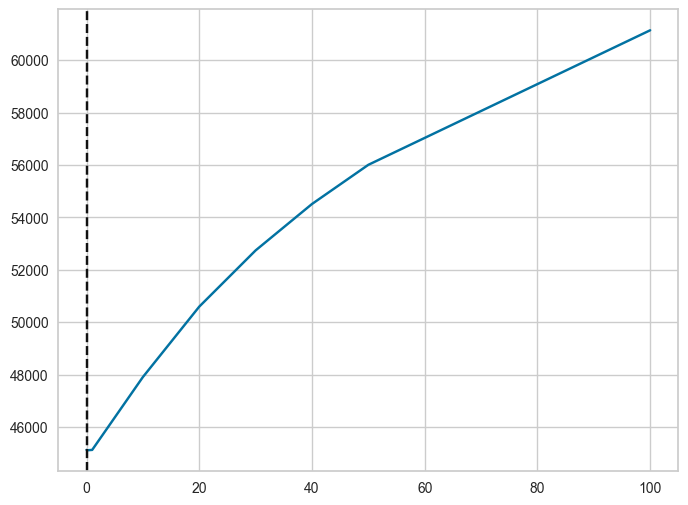

In [45]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(RidgeCV(alphas=lambdas));
_= vis.fit(x_training,y_training)

Como podemos ver, la regressión hace una forma logarítmica.

Por último, veremos la regresión LASSO.

In [46]:
lasso_cv = LassoCV(alphas=lambdas,cv=5).fit(x_training,y_training)
lasso_r2 =  np.mean(cross_val_score(lasso_cv, x_training,y_training))
print(f'Best lambda: {lasso_cv.alpha_} R2 score: {lasso_r2}')

Best lambda: 1.0 R2 score: 0.6181423704312997


De misma manera que con las regresiones anteriores, vemos que Lasso no se ajusta de buena manera a nuestros datos. 
A continuación para ver que puede estar fallando, veremos la gráfica de residuos de cada regresión

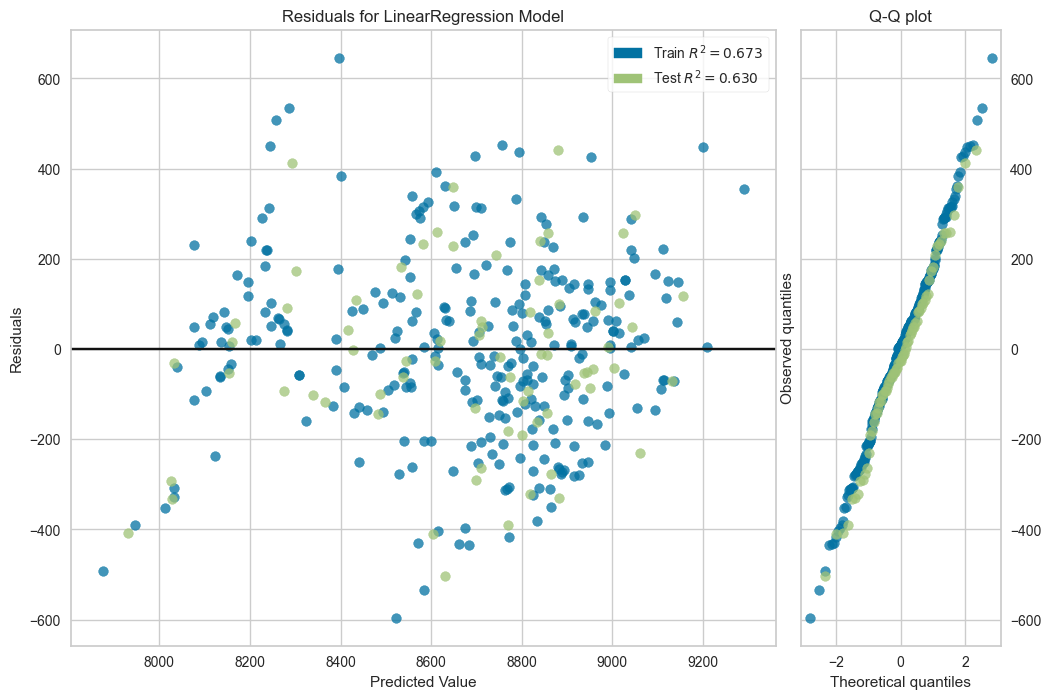

In [47]:
plt.figure(figsize=(12,8));
viz = residuals_plot(lr, x_training, y_training, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

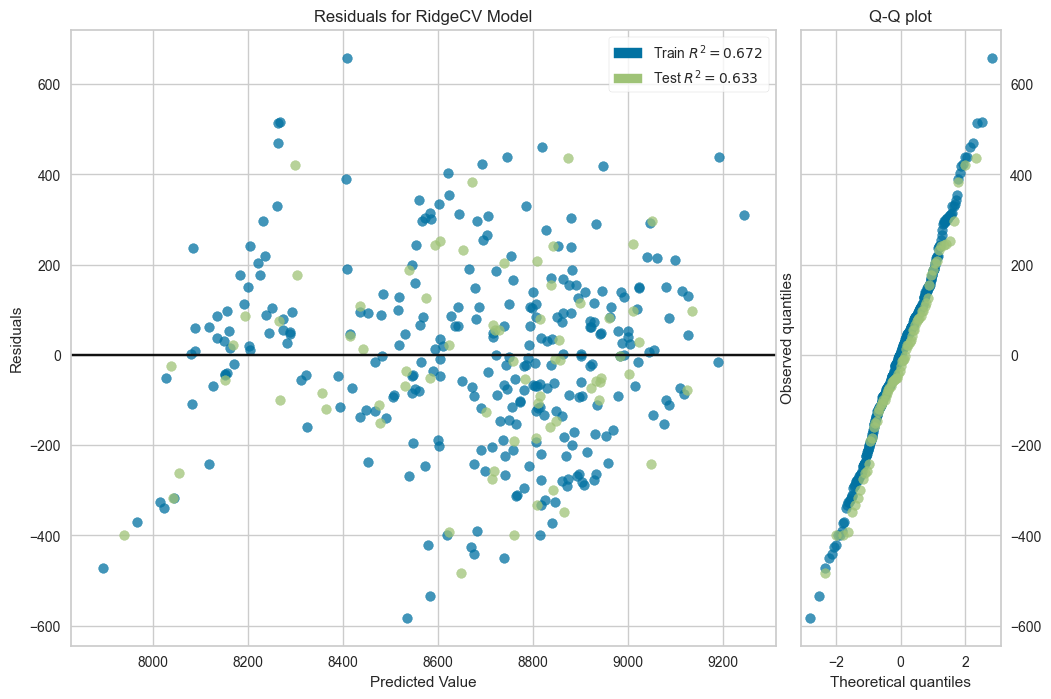

In [48]:
plt.figure(figsize=(12,8));
viz = residuals_plot(ridge_cv, x_training, y_training, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

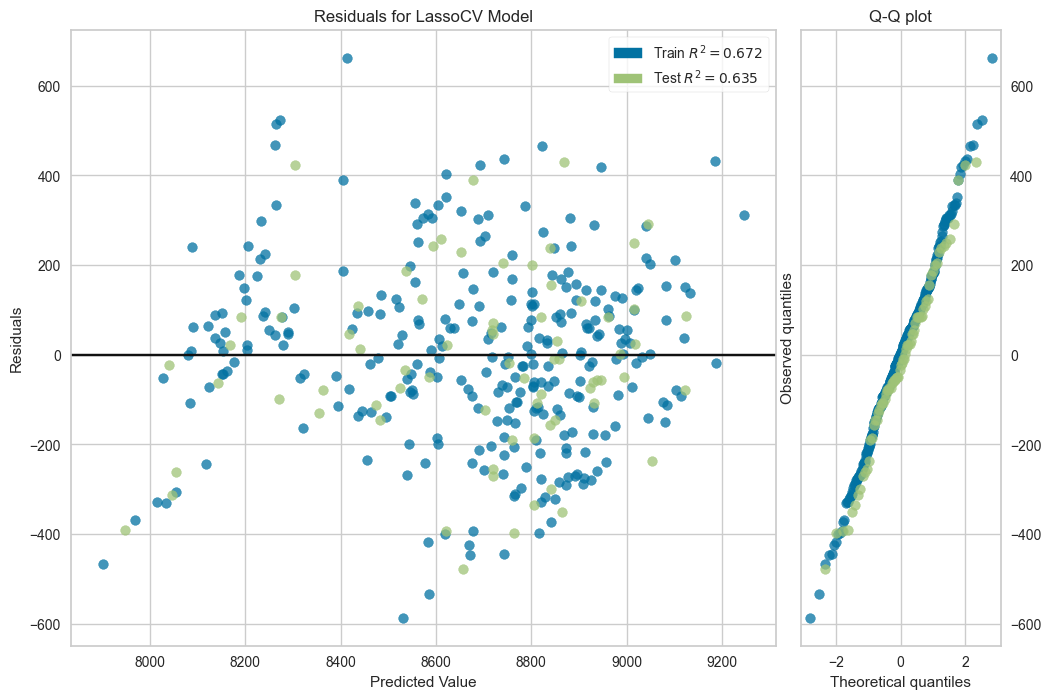

In [49]:
plt.figure(figsize=(12,8));
viz = residuals_plot(lasso_cv, x_training, y_training, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

Viendo los gráficos de los residuos podemos percatarnos de que los residuos siguen una distribución normal. Por lo que el uso de la regresión lineal es aceptable, debido a que para utilizar Regresión lineal se supone esta característica sobre los residuos.

A su vez, viendo los residuos en las 3 graficas vemos que son parecidas y que la nube se distribuye en 2 zonas del mapa:
* Una nube de puntos en forma de diagonal entre el 7900 y el 8400 aproximadamente (en el eje de abcisas)
* Una nube de puntos que va desde el punto 8400 hasta 9200 (en el eje de abcisas)

Esto son indicios de que nuestros datos no siguen un modelo lineal.

A continuación veremos los pesos que le da cada tipo de regresión a nuestras componentes:

In [50]:
weights = pd.DataFrame({'lr':lr.coef_, 'ridge_cv':ridge_cv.coef_, 'lasso_cv':lasso_cv.coef_},index=x_training.columns)

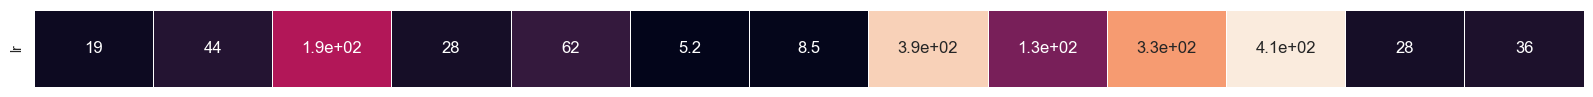

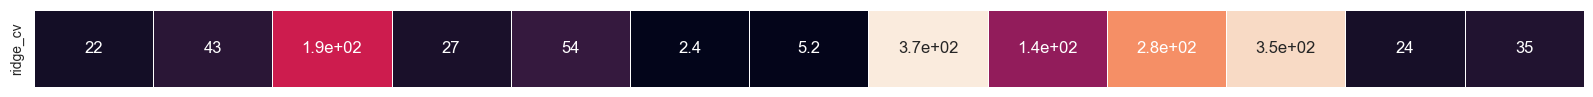

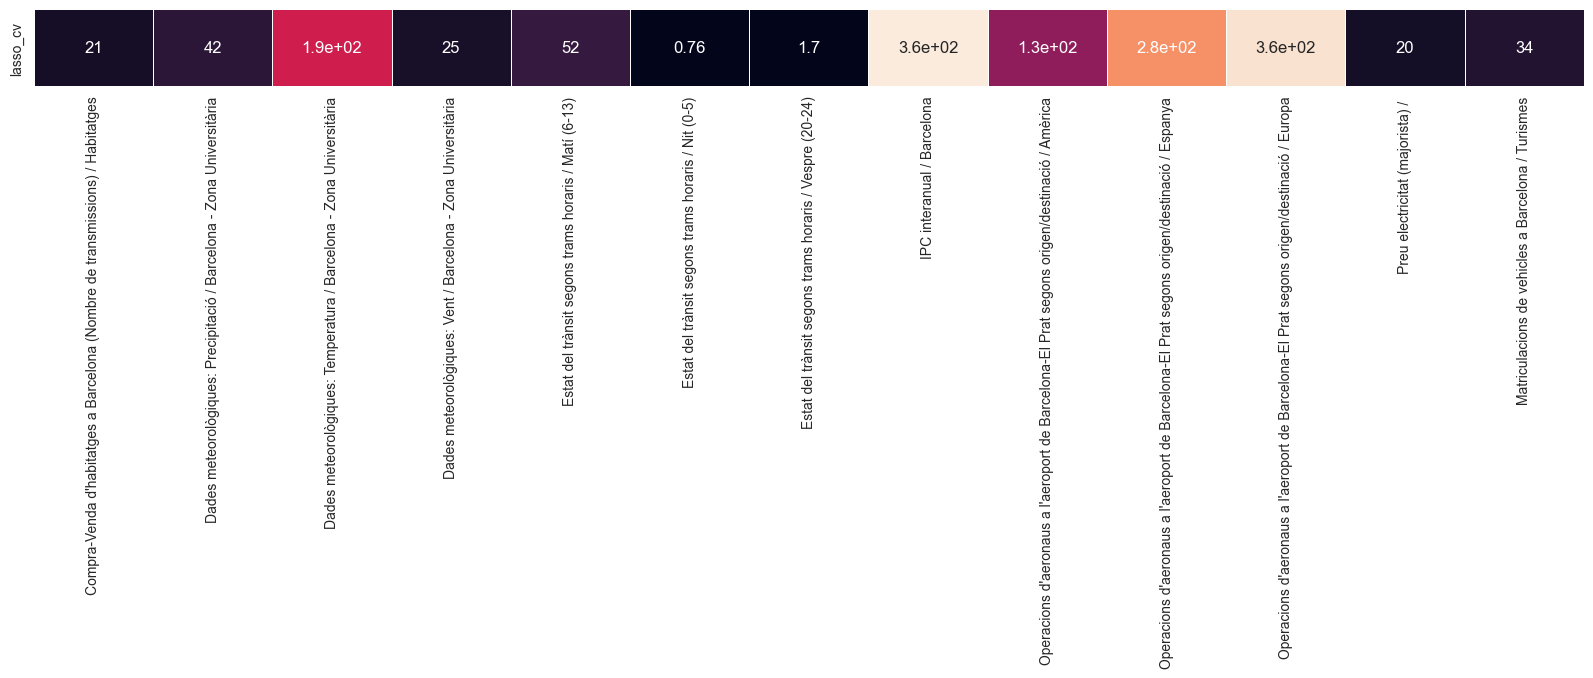

In [51]:
fig,  ax = plt.subplots( figsize = (20,1));
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['ridge_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['lasso_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

Como podemos ver, todas las regresiones han puesto un peso elevado a las operaciones en el aeropuerto. Por lo tanto, hemos hecho bien en no eliminar esas variables que mencionamos en el apartado de relaciones bivariables aunque estuvieran muy correlacionadas.

In [52]:
x_training.describe()

Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges  \
count                                          2.920e+02                              
mean                                          -9.125e-17                              
std                                            1.002e+00                              
min                                           -2.366e+00                              
25%                                           -4.853e-01                              
50%                                            7.988e-02                              
75%                                            5.423e-01                              
max                                            2.402e+00                              

       Dades meteorològiques: Precipitació / Barcelona - Zona Universitària  \
count                                          2.920e+02                      
mean                                           2.433e-17                      
std                                            1.002e+00                      
min                                           -4.773e-01                      
25%                                           -4.773e-01                      
50%                                           -4.773e-01                      
75%                                           -4.773e-01                      
max                                            2.630e+00                      

       Dades meteorològiques: Temperatura / Barcelona - Zona Universitària  \
count                                          2.920e+02                     
mean                                          -8.517e-17                     
std                                            1.002e+00                     
min                                           -2.456e+00                     
25%                                           -7.729e-01                     
50%                                           -8.023e-02                     
75%                                            1.009e+00                     
max                                            1.784e+00                     

       Dades meteorològiques: Vent / Barcelona - Zona Universitària  \
count                                          2.920e+02              
mean                                           1.582e-16              
std                                            1.002e+00              
min                                           -2.711e+00              
25%                                           -6.386e-01              
50%                                            3.665e-02              
75%                                            6.317e-01              
max                                            2.853e+00              

       Estat del trànsit segons trams horaris / Matí (6-13)  \
count                                          2.920e+02      
mean                                          -1.597e-16      
std                                            1.002e+00      
min                                           -1.846e+00      
25%                                           -1.037e+00      
50%                                            3.105e-01      
75%                                            7.254e-01      
max                                            2.639e+00      

       Estat del trànsit segons trams horaris / Nit (0-5)  \
count                                          2.920e+02    
mean                                           3.529e-10    
std                                            1.002e+00    
min                                           -2.621e+00    
25%                                           -5.833e-01    
50%                                           -2.428e-02    
75%                                            5.778e-01    
max                                            2.331e+00    

       Estat del trànsit segons trams horaris / Ve

A simple vista vemos que la componente que el rango de valores tiene una zona de varianza entre 0-40 y otra 100-400. Y a su vez las componentes tienen una media de practicamente 0 y std alrededor de 1. Por lo tanto, nuestra regresión no está intentando equilibrar los pesos.


Podemos ver que hay 7 variables con pesos inferiores a 50 

Por lo tanto repetiremos el las regresiones excluyendo estas columnas


In [53]:
bad_components =[0,3,5,6,11,12]
x_training_2 = x_training.copy()
x_training_2.drop(x_training_2.columns[bad_components],axis = 1, inplace= True)
x_test_2 = x_test.copy()
x_test_2.drop(x_test_2.columns[bad_components],axis = 1, inplace= True)

In [54]:

lr2 = LinearRegression().fit(x_training_2,y_training)
lista_r2_lr2 = cross_val_score(lr2,x_training_2,y_training,cv=5, scoring="r2")
lr_r2_2 = np.mean(lista_r2_lr2)
lr_r2_2

0.616909826567392

In [55]:
ridge_cv2 =RidgeCV(alphas=lambdas,cv=5).fit(x_training_2,y_training)
print(f'Best lambda: {ridge_cv2.alpha_} R2 score: {ridge_cv2.best_score_:3.3f}')

Best lambda: 1.0 R2 score: 0.619


In [56]:
lasso_cv2 = LassoCV(alphas=lambdas,cv=5).fit(x_training_2,y_training)
lasso_r2_2 =  np.mean(cross_val_score(lasso_cv2, x_training_2,y_training))
print(f'Best lambda: {lasso_cv2.alpha_} R2 score: {lasso_r2_2}')

Best lambda: 1.0 R2 score: 0.619029758565451


In [57]:
weights2 = pd.DataFrame({'lr':lr2.coef_, 'ridge_cv':ridge_cv2.coef_, 'lasso_cv':lasso_cv2.coef_},index=x_training_2.columns)

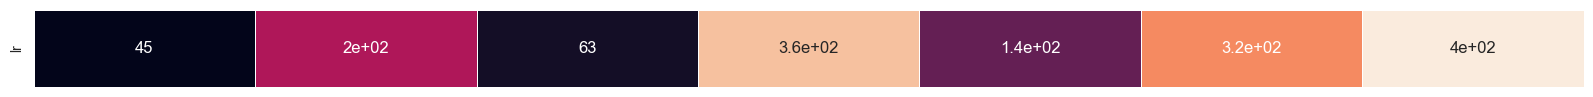

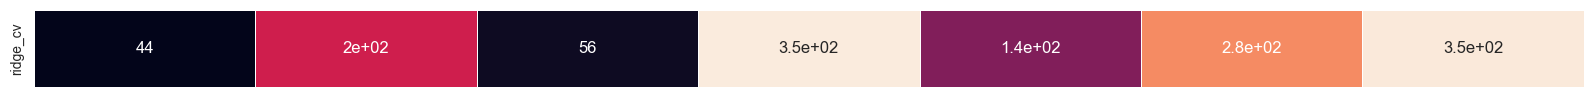

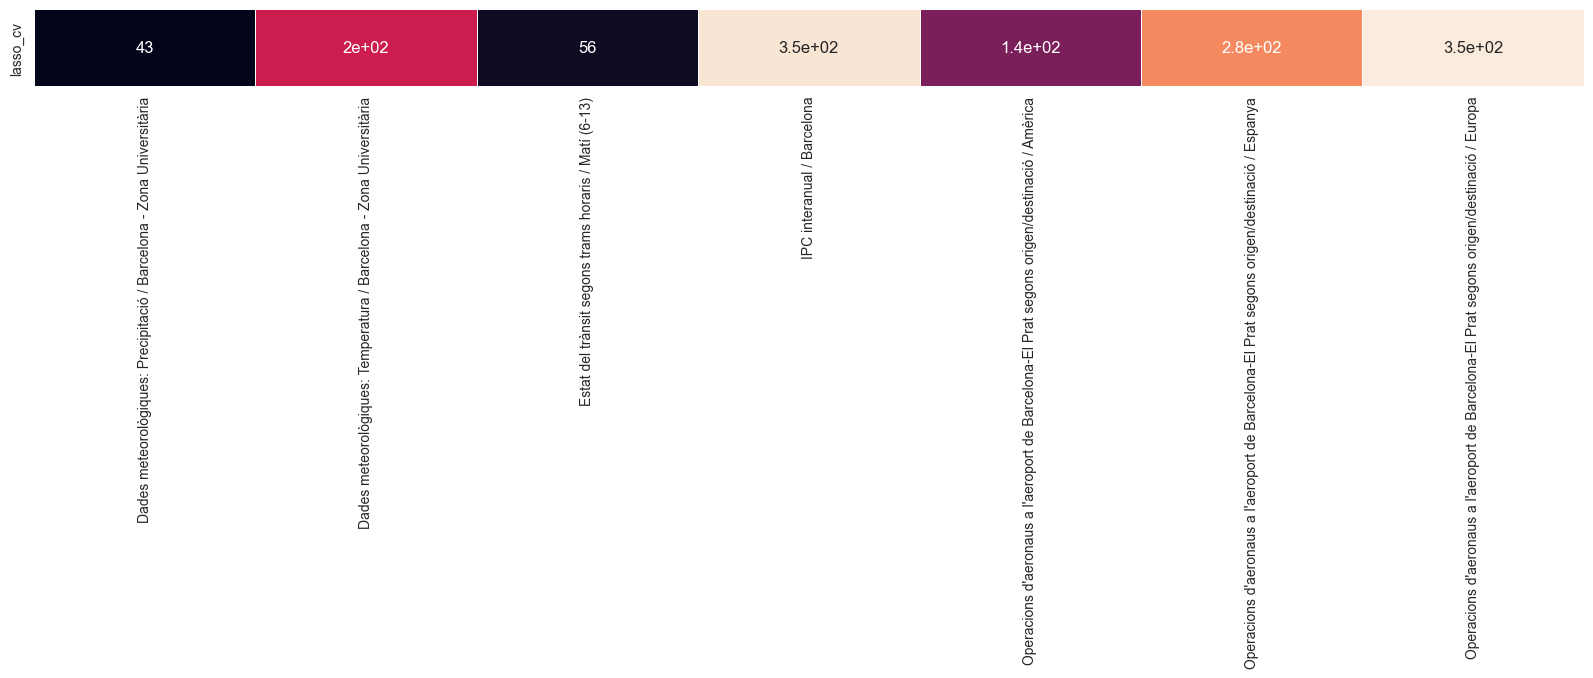

In [58]:
fig,  ax = plt.subplots( figsize = (20,1));
sns.heatmap(weights2.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights2.T.loc[['ridge_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights2.T.loc[['lasso_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

Quitando estás variables, no hemos conseguido mejorar la regresión lineal. Todo esto debido a que las variables no se relacionan de manera no lineal.

A continuación responderemos las preguntas de la sección.

- *Ajusta una regresión lineal, una regresión Ridge y una regresión LASSO a los datos ¿Te
parece suficientemente bueno el resultado?* 

    No, debido a que nuestro estadístico de calidad (r2) tiene un valor de 0.6, cuando se considera aceptable cuando el coeficiente de determinación tiene un valor igual o superior al 0.8

- *Representa los valores de la variable objetivo
para el conjunto de test contra las predicciones y el qqplot. ¿Qué modelo te parece mejor?*

    Aunque todos han dado valores parecidos. EL mejor ha sido la regresión de ridge.

- *¿Tienen sentido las variables con más peso que aparecen en los modelos para la variable
que queremos predecir?*

    Viendo  los gráficos de correlaciones y los pesos obtenidos en las regresiones. Vemos que está intentando poner más peso a aquellas variables que están más correlacionadas con la variable objetivo. Pero esto no siempre significa que si exista una relación coherente entre las variables y la variable objetivo. Por lo tanto, no todos los pesos llegan a tener sentido.

- *Elimina las variables que tienen menos peso en los modelos del
conjunto de datos y reajusta el modelo de regresión lineal ¿Cómo ha cambiado el peso de
las variables que quedan?* 

    Como podemos observar en las últimas gráficas, quitando las componentes menos relevantes no ha modificado los valores de las otras y no ha afectado a la regresión de manera significativa.

## Polynomial features

Por último haremos uso de *Ploynomial features* de la libreria scikit-learn para poder representar es comportamiento no lineal


In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_training_2 = poly.fit_transform(x_training_2)

x_test_2 = poly.fit_transform(x_test_2)

In [60]:
lr3 = LinearRegression().fit(x_training_2,y_training)
lista_r2_lr_3 = cross_val_score(lr3,x_training_2,y_training,cv=5, scoring="r2")
lr_r2_3 = np.mean(lista_r2_lr_3)
lr_r2_3

0.5105665878671394

A su vez, hemos decidido aumentar el número de lambdas para poder ver la tendencia de la regresión en función de este hiperparametro.

In [61]:
lambdas2 = lambdas.copy()
lambdas2.extend([120,150,200,300,400,500])
ridge_cv3 =RidgeCV(alphas=lambdas2,cv=5).fit(x_training_2,y_training)
print(f'Best lambda: {ridge_cv3.alpha_} R2 score: {ridge_cv3.best_score_:3.3f}')

Best lambda: 1.0 R2 score: 0.720


<Figure size 800x600 with 0 Axes>

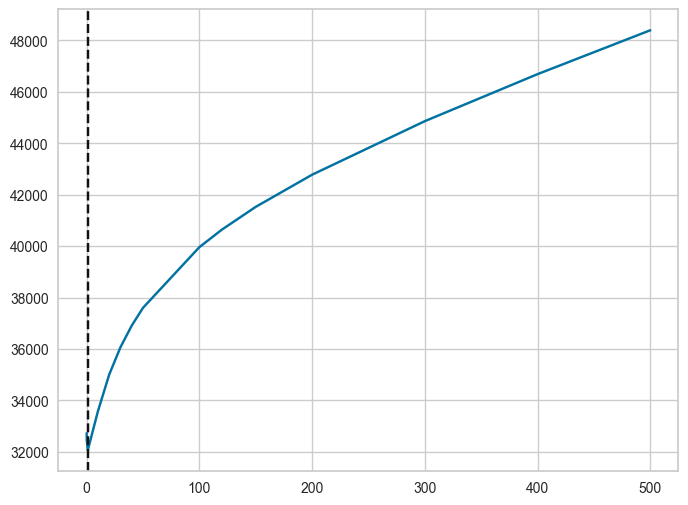

In [62]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(RidgeCV(alphas=lambdas2));
_= vis.fit(x_training_2,y_training)

In [63]:
lasso_cv3 = LassoCV(alphas=lambdas2,cv=5).fit(x_training_2,y_training)
lasso_r2_3 =  np.mean(cross_val_score(lasso_cv2, x_training_2,y_training))
print(f'Best lambda: {lasso_cv3.alpha_} R2 score: {lasso_r2_3}')

Best lambda: 1.0 R2 score: 0.712198130035968


<Figure size 800x600 with 0 Axes>

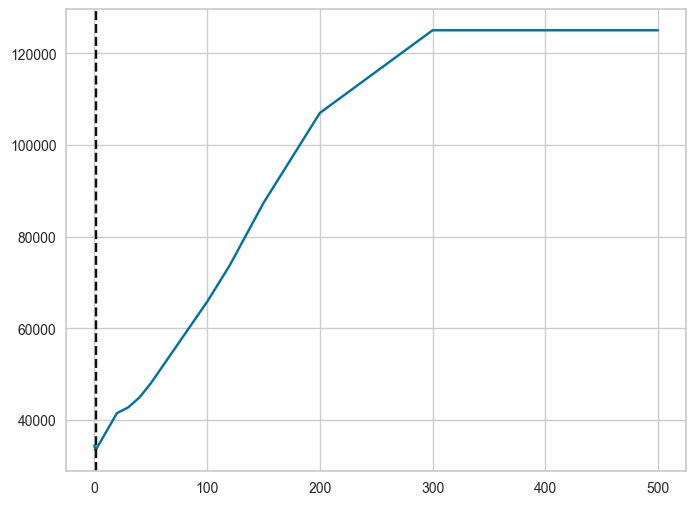

In [64]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(LassoCV(alphas=lambdas2));
_= vis.fit(x_training_2,y_training)


Como podemos ver, las regresiones RIDGE y LASSO han mejorado un 15% aproximadamente y ahora mismo mejor valor del estadístico r2 es de un 0.72. 


In [65]:
weights3 = pd.DataFrame({'lr':lr3.coef_, 'ridge_cv':ridge_cv3.coef_, 'lasso_cv':lasso_cv3.coef_})


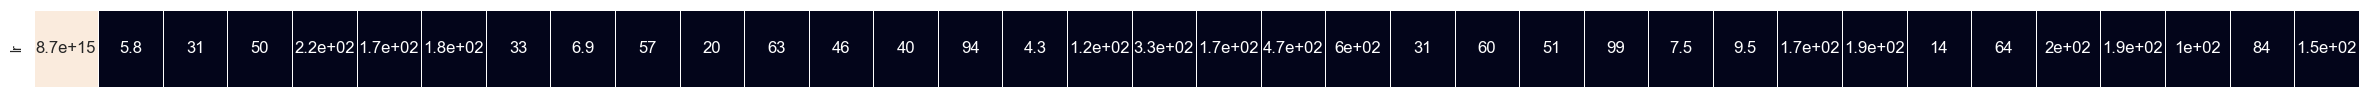

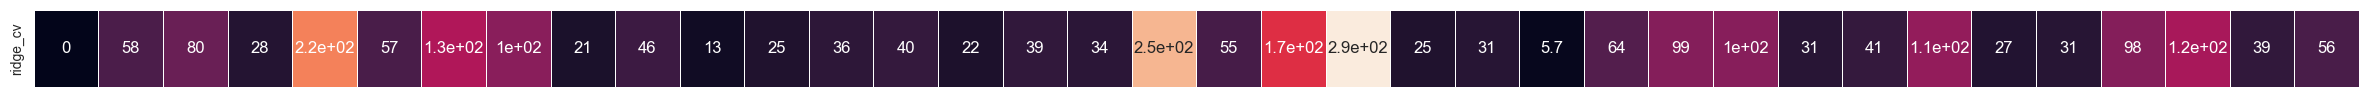

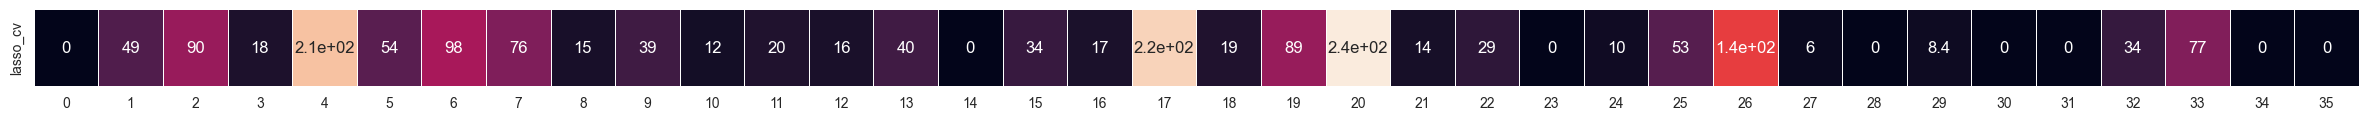

In [66]:

fig,  ax = plt.subplots( figsize = (30,1));
sns.heatmap(weights3.T.loc[['lr'],:].abs(),annot=True ,linewidths=.5,ax=ax,cbar=False,xticklabels=False);

plt.figure(figsize = (30,1));
sns.heatmap(weights3.T.loc[['ridge_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (30,1));
sns.heatmap(weights3.T.loc[['lasso_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

<Axes: >

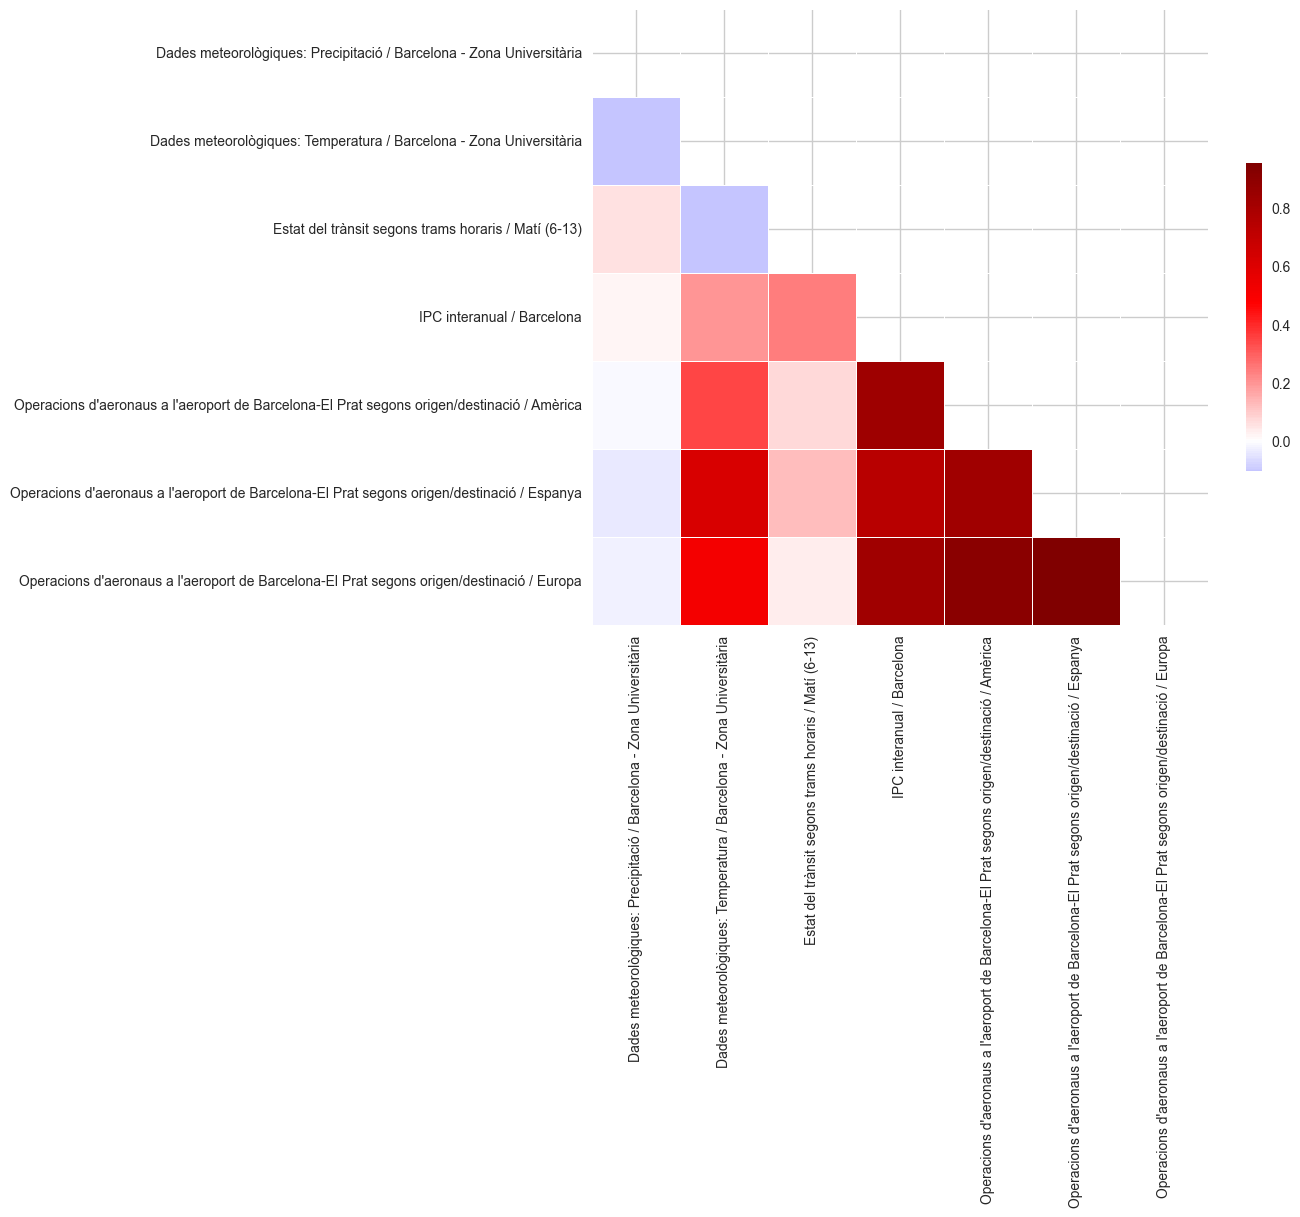

In [67]:

correlaciones = x_training.drop(x_training.columns[bad_components],axis = 1).corr()
mask = np.triu(np.ones_like(correlaciones,dtype = bool))
plt.subplots(figsize=(10,8))
sns.heatmap(correlaciones, mask = mask, cmap="seismic",center = 0, square=True,linewidths=.5, cbar_kws={"shrink": .5})

Una observación que podemos ver, es el numero de variables. Hemos pasado de tener 7 variables a 36 debido a la transformación de Polynomial features.

A continuación haremos la contestación de las preguntas asociadas al apartado:

*Al ser un problema complejo, igual hay interacciones entre variables que explican mejor la variable objetivo. Usa la función PolynomialFeatures de scikit-learn para añadir al conjunto de datos original características que correspondan a polinomios de grado 2. Vuelve a ajustar la regresión Ridge y la regresión LASSO. ¿Han mejorado los modelos?* 

Han mejorado, llegando a tener un 0.70 de r2 (un 15%).

*Fíjate en las variables a las que LASSO no les ha dado un peso 0. ¿Se corresponden con interacciones entre variables?* 
No todas, ya que polynomial features también cuenta las relaciones individuales con sigo mismo, entre otras. Por lo tanto, no todas las columnas con pesos son relaciones entre 2 variables. También tendrá en cuenta las originales.